## Centrality, degree-degree correlation and community structure in networks

### Guilherme Michel Lima de Carvalho 11175052


### Asrat Mekonnen Belachew 11415730

##  Question 1 

For the following networks:

a) E-road network (http://konect.cc/networks/subelj_euroroad),

b) Hamsterster friendships (http://konect.uni-koblenz.de/networks/petster-friendships-hamster).

c) C. elegans neural network (http://www-personal.umich.edu/~mejn/netdata/celegansneural.zip)

d) US airport network(http://toreopsahl.com/datasets/#usairports)

Construct a correlation matrix between the centrality measures: (i) degree, (ii) k-core, (iii) closeness centrality, (iv) betweenness centrality, (v) eigenvector centrality, (vi) pagerank, (vii) random walk accessibility, (viii) communicability centrality.

Discuss the highest correlations and interpret the results.

In [1315]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from numpy  import *
import numpy as np
from matplotlib import cm
from scipy.stats import entropy
from scipy.stats import moment
from scipy.linalg import expm
from networkx.algorithms import community
np.random.seed(50)

## E-road Network

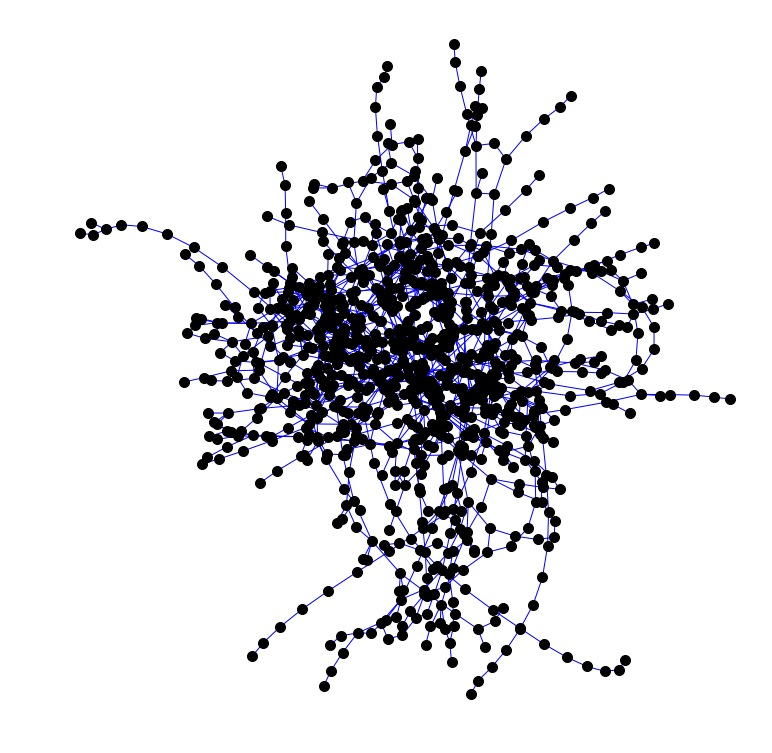

In [1307]:
Euroroad = nx.read_edgelist("euroroad.txt", nodetype=int)
Sub=sorted(nx.connected_component_subgraphs(Euroroad), key = len, reverse=True)
Euroroad=Sub[0]
Euroroad = nx.convert_node_labels_to_integers(Euroroad, first_label=0)
Euroroad = Euroroad.to_undirected()

pos = nx.spring_layout(Euroroad) 
plt.figure(figsize=(10,10))
nx.draw(Euroroad,with_labels = False, pos = pos,node_size=100,node_color = 'black', edge_color='blue')
plt.show(True)

Lets calculate the measures of this Network

**Degree Centrality**

In [983]:
grau_eroad = dict(Euroroad.degree())
grau_eroad = list(grau_eroad.values())

Lets see the empirical distribuition of degree centrality in this case

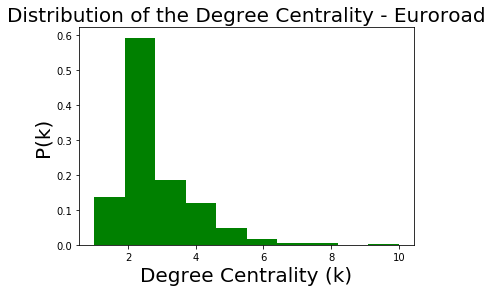

In [984]:
plt.figure(figsize=(6,4))
plt.hist(grau_eroad,color='green',density=True)
plt.title("Distribution of the Degree Centrality - Euroroad", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlabel("Degree Centrality (k)", fontsize=20)
plt.show(True)

**K-Core**

In [985]:
KC= dict(nx.core_number(Euroroad))
KC = list(KC.values())

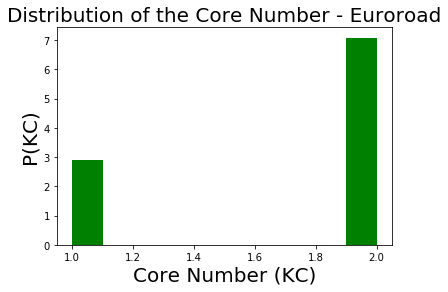

In [986]:
plt.figure(figsize=(6,4))
plt.hist(KC,color='green',density=True)
plt.title("Distribution of the Core Number - Euroroad", fontsize = 20)
plt.ylabel("P(KC)", fontsize = 20)
plt.xlabel("Core Number (KC)", fontsize = 20)
plt.savefig('kcoreeuro.eps')
plt.show(True)

In this case we see the nodes have only kore number 1 or 2. Make sense, because Euroroad is a network about roads and the nodes have connections with the nearest nodes.

**Closeness Centrality**

In [987]:
CLC = dict(nx.closeness_centrality(Euroroad))
CLC = list(CLC.values())

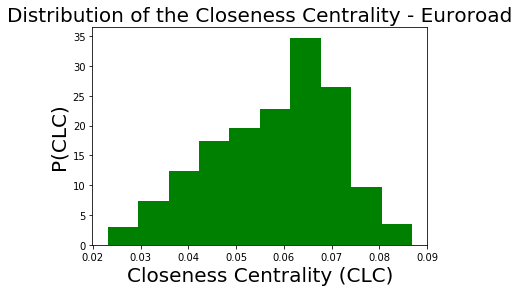

In [988]:
plt.figure(figsize=(6,4))
plt.hist(CLC,color='green',density=True)
plt.title("Distribution of the Closeness Centrality - Euroroad", fontsize=20)
plt.ylabel("P(CLC)", fontsize=20)
plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
plt.savefig('closenesseuro.eps')
plt.show(True)

**Betweeness Centrality**

In [989]:
B = dict(nx.betweenness_centrality(Euroroad))

In [990]:
B = list(B.values())
av_B = np.mean(B)
print('Average betweenness centrality', av_B)

Average betweenness centrality 0.01677449001021592


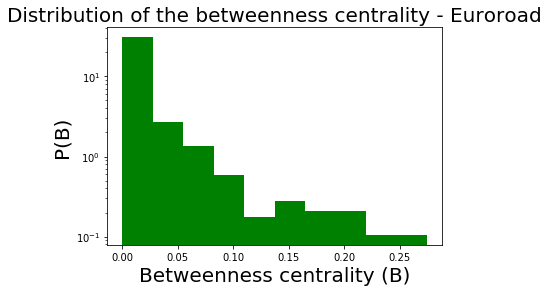

In [991]:
plt.figure(figsize=(6,4))
plt.hist(B,color='green',density=True)
plt.yscale('log')
plt.title("Distribution of the betweenness centrality - Euroroad", fontsize=20)
plt.ylabel("P(B)", fontsize=20)
plt.xlabel("Betweenness centrality (B)", fontsize=20)
plt.savefig('betweenness.eps')
plt.show(True)

**Eigenvector Centrality**

In [1308]:
EC = dict(nx.eigenvector_centrality(Euroroad, max_iter = 1000))

In [1309]:
EC = list(EC.values())
av_EC = np.mean(EC)
print('Average eigenvector centrality', av_EC)

Average eigenvector centrality 0.00819553714815111


In [1314]:
print(max(EC))

0.36513188202658337


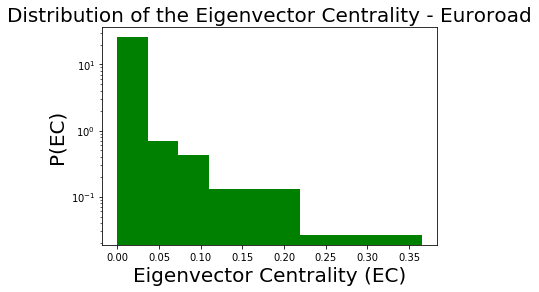

In [972]:
plt.figure(figsize=(6,4))
plt.hist(EC,color='green',density=True)
plt.yscale('log')
plt.title("Distribution of the Eigenvector Centrality - Euroroad",fontsize=20)
plt.ylabel("P(EC)", fontsize=20)
plt.xlabel("Eigenvector Centrality (EC)", fontsize=20)
plt.show(True)

**Page Rank**

In [994]:
PR = dict(nx.pagerank(Euroroad, alpha=0.85))
PR = list(PR.values())

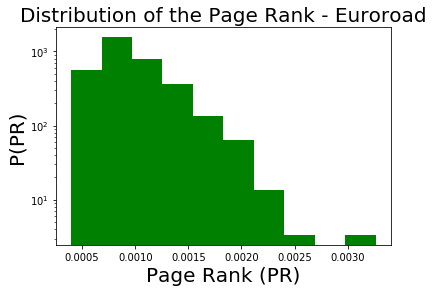

In [995]:
plt.figure(figsize=(6,4))
plt.hist(PR,color='green',density=True)
plt.yscale('log')
plt.title("Distribution of the Page Rank - Euroroad",fontsize=20)
plt.ylabel("P(PR)", fontsize=20)
plt.xlabel("Page Rank (PR)", fontsize=20)
plt.show(True)

**Random Walk Acessibility**

We can define a function for calculate random walk acessibility:

In [1]:
from scipy.linalg import expm
def acc(G):
    N = len(G.nodes())
    vk = dict(G.degree())
    vk = list(vk.values())
    A = nx.adjacency_matrix(G)
    P = np.zeros((N,N), dtype = 'float')
    for i in np.arange(0, N):
        for j in np.arange(0, N):
            if(vk[i] > 0):
                P[i,j] = A[i,j]/vk[i]
    P2 = expm(P)/np.exp(1)
    vacc = np.zeros(N, dtype = float)
    for i in np.arange(0, N):
        acc = 0
        for j in np.arange(0,N):
            if(P2[i,j] > 0):
                acc = acc + P2[i,j]*log(P2[i,j])
        acc = np.exp(-acc)
        vacc[i] = acc
    return vacc

In [975]:
RWA = acc(Euroroad)

Let's see the distribuition of random walk acessibility in this case:

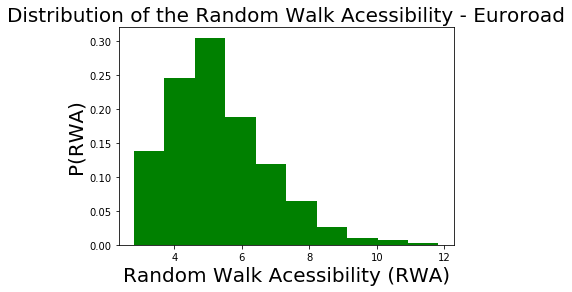

In [976]:
plt.figure(figsize=(6,4))
plt.hist(RWA,color='green',density=True)
plt.title("Distribution of the Random Walk Acessibility - Euroroad",fontsize=20)
plt.ylabel("P(RWA)", fontsize=20)
plt.xlabel("Random Walk Acessibility (RWA)", fontsize=20)
plt.show(True)

**Communicability Centrality**

Creating a function to calculate the communicability centrality of a node $i$ in a graph $G$:

We can calculate the Communicability Centrality using the exponencial matrix:
$$EE(i) = \left(\sum_{\ell = 0}^{\infty}\frac{A^{\ell}}{\ell!}\right)_{ii} = (e^{A})_{ii}$$

Where $EE(i)$ is the communicability centrality of the node $i$.

In [484]:
def communicability_centrality(G):
    G = tornar_naodirecionada(G)
    adj = nx.adjacency_matrix(G).todense().A
    EE = expm(adj)
    vector = np.zeros(len(G.nodes()))
    for i in range(0,len(G.nodes())):
        vector[i] = EE[i,i]
    return(vector)

In [977]:
CC = communicability_centrality(Euroroad)
print(CC)

[ 2.75729074 11.79132208  2.46731414 ...  2.22895123  2.28374701
  1.59226571]


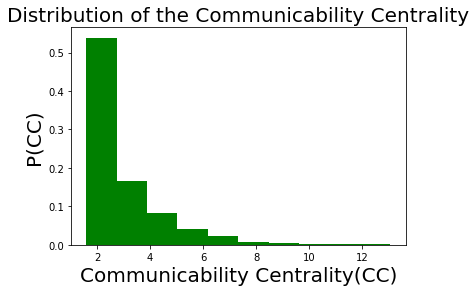

In [978]:
plt.figure(figsize=(6,4))
plt.hist(CC,color='green', density=True)
plt.title("Distribution of the Communicability Centrality",fontsize=20)
plt.ylabel("P(CC)", fontsize=20)
plt.xlabel("Communicability Centrality(CC)", fontsize=20)
plt.show(True)

**Dataframe for all measures**

In [1300]:
df = pd.DataFrame({'Degree':grau_eroad,'KC':KC,'CLC':CLC,'BC':B,'EC':EC,'PR':PR,'RWA':RWA,'CC':CC})

In [1302]:
df.head()

Degree  KC       CLC        BC        EC        PR        RWA         CC
0       2   2  0.072919  0.001635  0.109500  0.000667   5.903247   2.757291
1       8   2  0.078506  0.184288  0.365132  0.002215  11.824721  11.791322
2       2   2  0.068569  0.000056  0.074014  0.000675   5.334405   2.467314
3       5   2  0.075033  0.122849  0.201649  0.001444   9.252887   7.386311
4       3   2  0.073129  0.010025  0.151575  0.000920   7.816460   4.143081

Lets see the correlation matrix using pandas

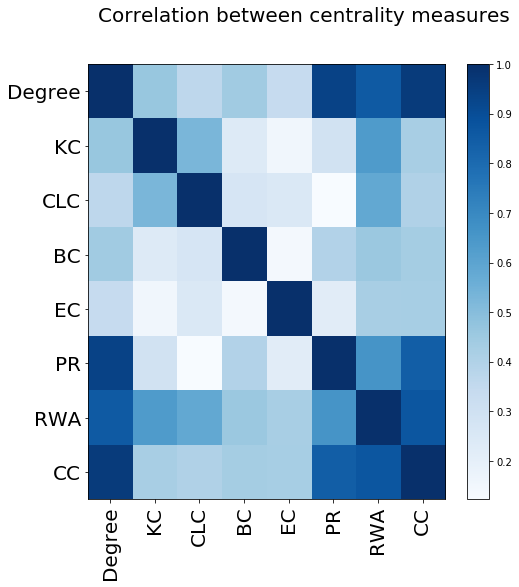

In [998]:
corr = df.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(8,8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical', fontsize=20)
plt.yticks(range(len(corr)), corr.columns, fontsize=20);
plt.suptitle('Correlation between centrality measures', fontsize=20)
plt.grid(False)
plt.show()

Let's see in the matrix what are the correlations grater than 0.7 to see easily what are the highest correlations between this measures.

In [999]:
def highlight_greater(s):
    var = s >=0.7
    return ['background-color: yellow' if v else '' for v in var]

In [1000]:
df2 = df.corr()

In [1001]:
df2.style.apply(highlight_greater)

The highest correlations in this case are:
- Degree and Page Rank,RWA, Communicability Centrality
- Page Rank and Communicability Centrality
- RWA and Communicability Centrality

- The degree centrality is high correlated to pagerank because of the same reason pointed before. This is a network about streets, so the periferical nodes have low degree and low page rank. Otherside, the nodes most central in city have a high degree and a high page rank, beacause they are linked by other central nodes.

- Degree centrality and RWA are high correlated too. The most central nodes thinking in the spatial distribution of nodes are the nodes who have the highest degree centrality and have the high RWA.


## Hamsterster friendships

The same analysis for the hamsterster friendships network

**Lets see a plot of the principal component of this network**

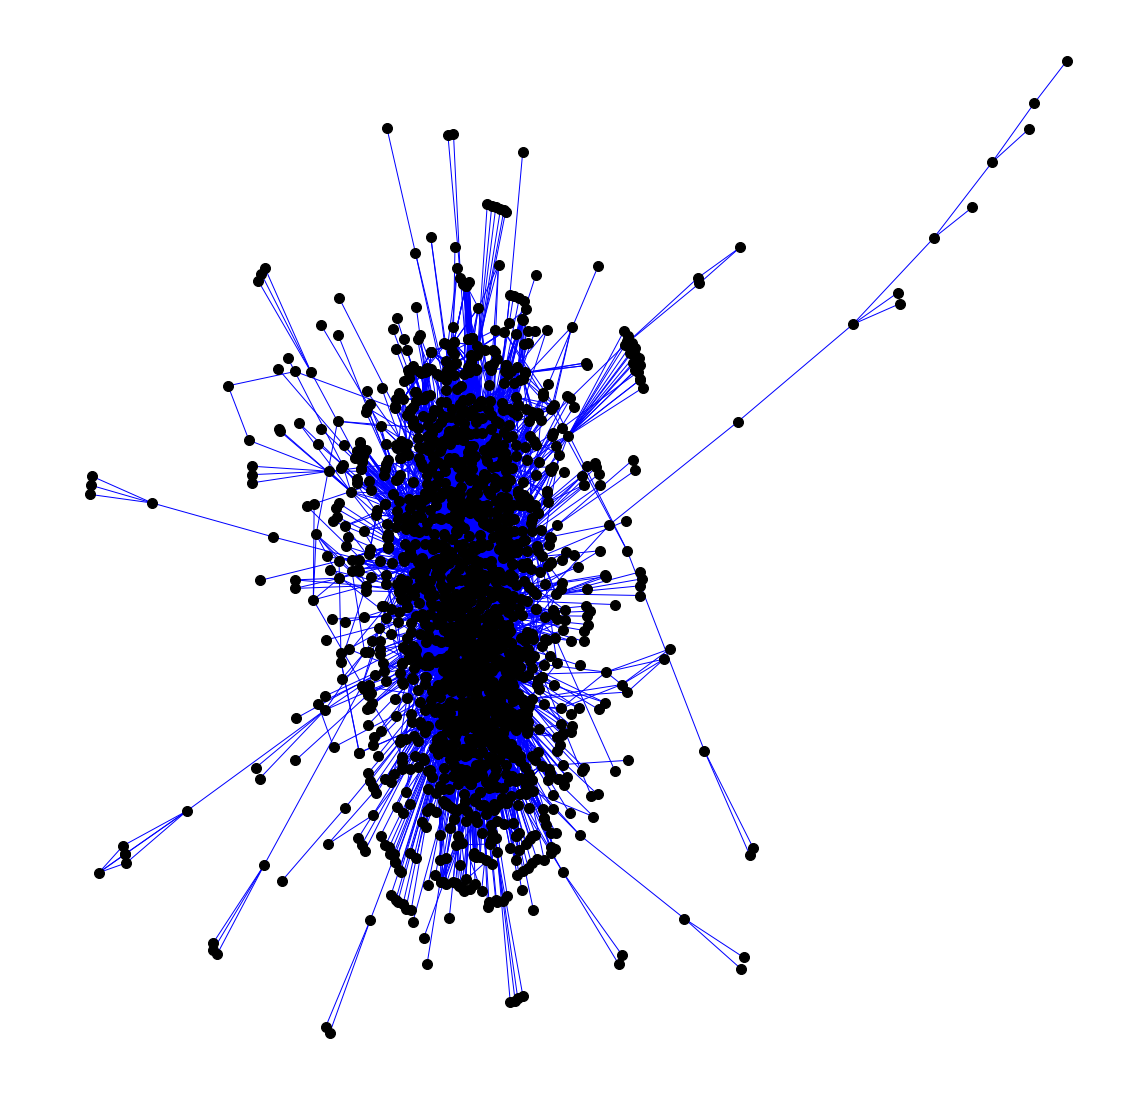

In [1002]:
hamster = nx.read_edgelist("out.petster-friendships-hamster-uniq.txt", nodetype=int)
Sub=sorted(nx.connected_component_subgraphs(hamster), key = len, reverse=True)
hamster=Sub[0]
hamster = nx.convert_node_labels_to_integers(hamster, first_label=0)
hamster = hamster.to_undirected()

pos = nx.spring_layout(hamster) 
plt.figure(figsize=(15,15))
nx.draw(hamster,with_labels = False, pos = pos,node_size=100,node_color = 'black', edge_color='blue')
plt.show(True)

**Degree Centrality**

In [1003]:
degree_hamster = dict(hamster.degree())
degree_hamster = list(degree_hamster.values())

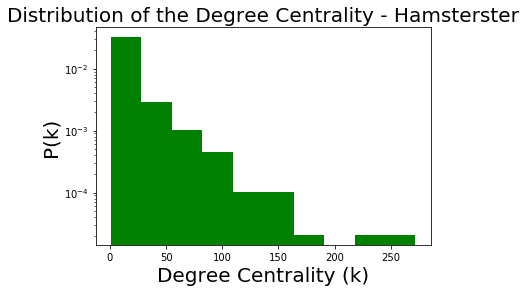

In [1004]:
plt.figure(figsize=(6,4))
plt.hist(degree_hamster,color='green',density=True)
plt.yscale('log')
plt.title("Distribution of the Degree Centrality - Hamsterster", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlabel("Degree Centrality (k)", fontsize=20)
plt.savefig('degree-centrality.eps')
plt.show(True)

**K-Core**


In [1005]:
KC_ham= dict(nx.core_number(hamster))
KC_ham = list(KC_ham.values())

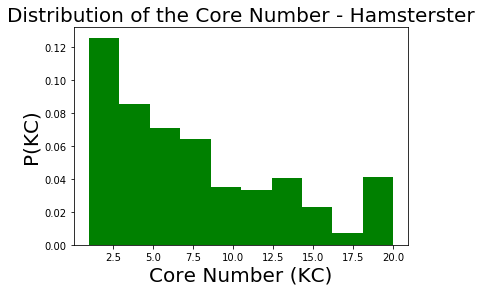

In [1006]:
plt.figure(figsize=(6,4))
plt.hist(KC_ham,color='green',density=True)
plt.title("Distribution of the Core Number - Hamsterster", fontsize = 20)
plt.ylabel("P(KC)", fontsize = 20)
plt.xlabel("Core Number (KC)", fontsize = 20)
plt.show(True)

**Closeness Centrality**

In [1007]:
CLC_ham = dict(nx.closeness_centrality(hamster))
CLC_ham = list(CLC_ham.values())

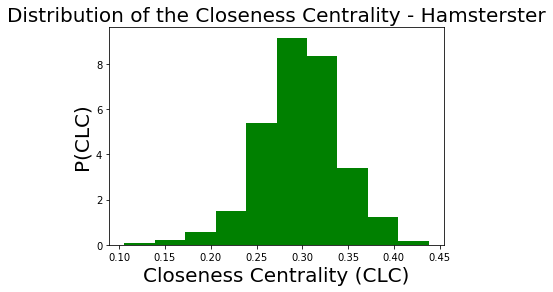

In [1008]:
plt.figure(figsize=(6,4))
plt.hist(CLC_ham,color='green',density=True)
plt.title("Distribution of the Closeness Centrality - Hamsterster", fontsize=20)
plt.ylabel("P(CLC)", fontsize=20)
plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
plt.show(True)

**Betweeness Centrality**

In [231]:
B_ham = dict(nx.betweenness_centrality(hamster))
B_ham = list(B_ham.values())

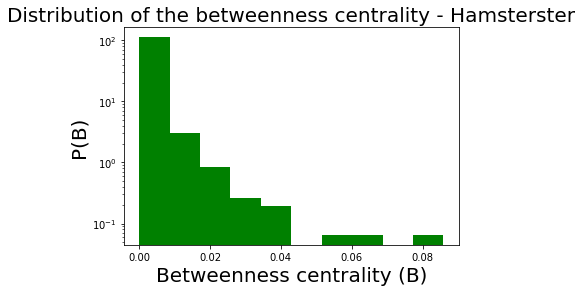

In [232]:
plt.figure(figsize=(6,4))
plt.hist(B_ham,color='green',density=True)
plt.yscale('log')
plt.title("Distribution of the betweenness centrality - Hamsterster", fontsize=20)
plt.ylabel("P(B)", fontsize=20)
plt.xlabel("Betweenness centrality (B)", fontsize=20)
plt.show(True)

**Eigenvector Centrality**

In [233]:
EC_ham = dict(nx.eigenvector_centrality(hamster, max_iter = 1000))

EC_ham = list(EC_ham.values())

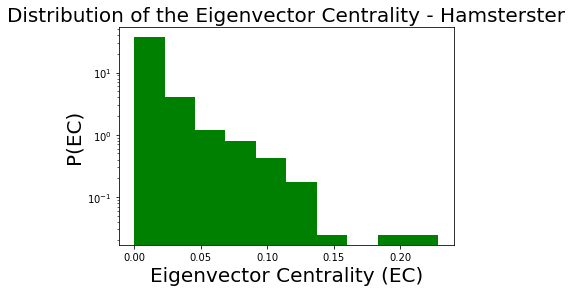

In [235]:
plt.figure(figsize=(6,4))
plt.hist(EC_ham,color='green',density=True)
plt.yscale('log')
plt.title("Distribution of the Eigenvector Centrality - Hamsterster",fontsize=20)
plt.ylabel("P(EC)", fontsize=20)
plt.xlabel("Eigenvector Centrality (EC)", fontsize=20)
plt.show(True)

**Page Rank**

In [1010]:
PR_ham = dict(nx.pagerank(hamster, alpha=0.85))
PR_ham = list(PR_ham.values())

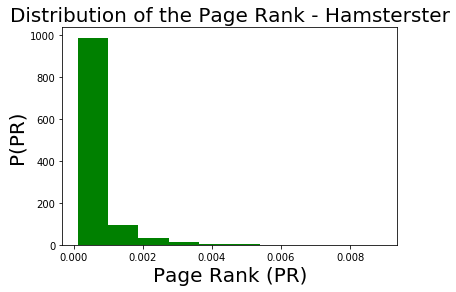

In [1011]:
plt.figure(figsize=(6,4))
plt.hist(PR_ham,color='green',density=True)
plt.title("Distribution of the Page Rank - Hamsterster",fontsize=20)
plt.ylabel("P(PR)", fontsize=20)
plt.xlabel("Page Rank (PR)", fontsize=20)
plt.show(True)

**Random Walk Acessibility**

In [1012]:
RWA_ham = acc(hamster)

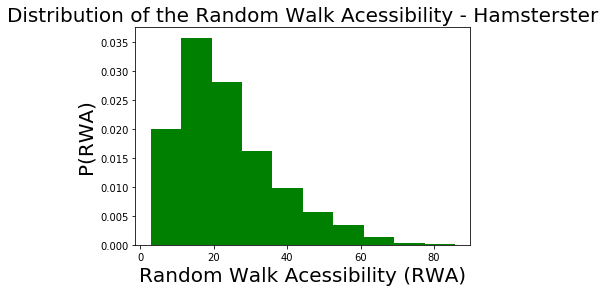

In [1013]:
plt.figure(figsize=(6,4))
plt.hist(RWA_ham,color='green',density=True)
plt.title("Distribution of the Random Walk Acessibility - Hamsterster",fontsize=20)
plt.ylabel("P(RWA)", fontsize=20)
plt.xlabel("Random Walk Acessibility (RWA)", fontsize=20)
plt.show(True)

**Communicability Centrality**

In [244]:
CC_ham = communicability_centrality(hamster)

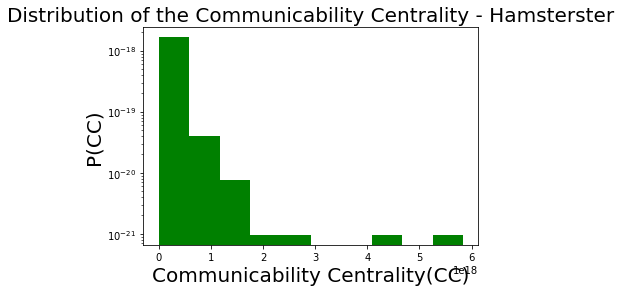

In [245]:
plt.figure(figsize=(6,4))
plt.hist(CC_ham,color='green',density=True)
plt.yscale('log')
plt.title("Distribution of the Communicability Centrality - Hamsterster",fontsize=20)
plt.ylabel("P(CC)", fontsize=20)
plt.xlabel("Communicability Centrality(CC)", fontsize=20)
plt.show(True)

**Dataframe of Measures**

In [1014]:
df_ham = pd.DataFrame({'Degree':degree_hamster,'KC':KC_ham,'CLC':CLC_ham,'BC':B_ham,'EC':EC_ham,'PR':PR_ham,'RWA':RWA_ham,'CC':CC_ham})

In [1303]:
df_ham.head()

Degree  KC       CLC        BC        EC        PR        RWA            CC
0      27  17  0.355834  0.003230  0.036847  0.000968  41.955899  1.516382e+17
1      45  20  0.354845  0.004359  0.035748  0.001473  48.143664  1.427252e+17
2       3   3  0.267595  0.000005  0.001166  0.000197  13.450223  1.517358e+14
3      17   9  0.307150  0.001925  0.014714  0.000702  27.545846  2.418251e+16
4      12   7  0.303241  0.001590  0.007331  0.000615  20.929913  6.003271e+15

**Correlation between centrality measures**

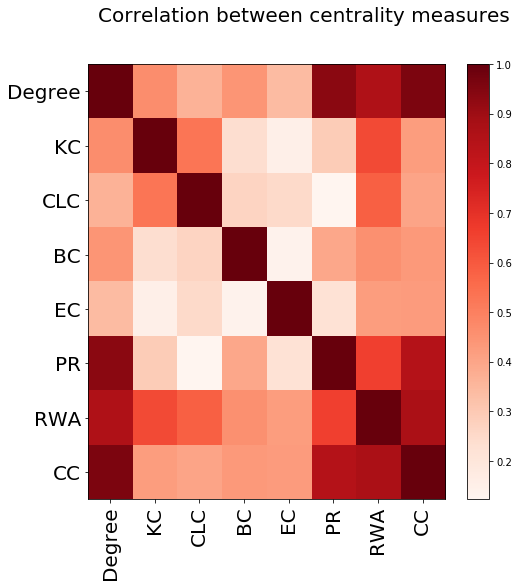

In [1019]:
corr_ham = df.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(8,8))
plt.imshow(corr_ham, cmap='Reds', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical', fontsize=20)
plt.yticks(range(len(corr)), corr.columns, fontsize=20);
plt.suptitle('Correlation between centrality measures', fontsize=20)
plt.grid(False)
plt.show()

In [1020]:
corr_ham.style.apply(highlight_greater)

The highest correlations in this case are:
- Degree and Page Rank, RWA, Communicability Centrality
- Betweenness Centrality and Page Rank


## C. Elegans Neural Network

Lets load the network and see a plot of the largest component of this network

In [137]:
neuralnet = nx.read_gml('celegansneural.gml')

A function to convert the network in a undirected and unweigthed.

In [138]:
def tornar_naodirecionada(G):
    matrix = nx.to_numpy_matrix(G)
    A = matrix + np.transpose(matrix)
    N = len(G.nodes())
    for i in range(N):
        for j in range(N):
            if (A[i,j] == 0):
                A[i,j]=0
            else: 
                A[i,j]=1
    
    Grafo = nx.from_numpy_matrix(A)
    return Grafo

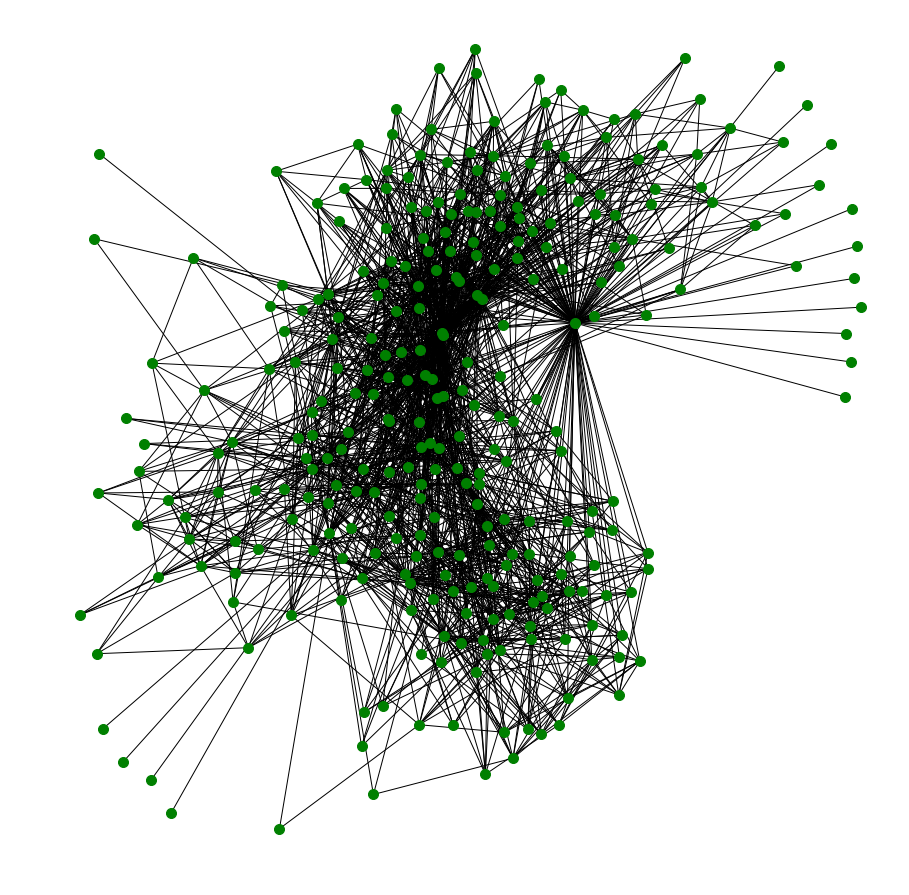

In [139]:
Sub=sorted(nx.connected_component_subgraphs(neuralnet), key = len, reverse=True)
neuralnet=Sub[0]
neuralnet = nx.convert_node_labels_to_integers(neuralnet, first_label=0)
neuralnet = tornar_naodirecionada(neuralnet)

pos = nx.spring_layout(neuralnet) 
plt.figure(figsize=(12,12))
nx.draw(neuralnet,with_labels = False, pos = pos,node_size=100,node_color = 'green', edge_color='black')
plt.show(True)

**Degree**

In [252]:
degree_neural = dict(neuralnet.degree())
degree_neural = list(degree_neural.values())

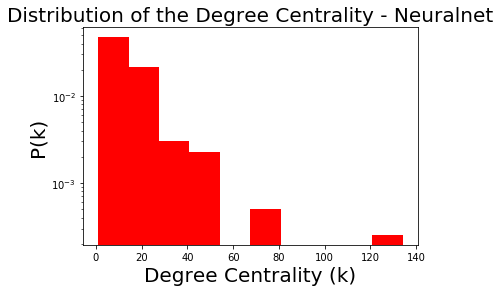

In [255]:
plt.figure(figsize=(6,4))
plt.hist(degree_neural,color='red',density=True)
plt.yscale('log')
plt.title("Distribution of the Degree Centrality - Neuralnet", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlabel("Degree Centrality (k)", fontsize=20)
## plt.savefig('degree-centrality.eps')
plt.show(True)

**K-Core**

In [256]:
KC_neural = dict(nx.core_number(neuralnet))
KC_neural = list(KC_neural.values())

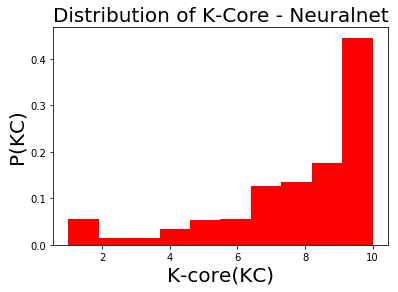

In [257]:
plt.figure(figsize=(6,4))
plt.hist(KC_neural,color='red',density = True)
plt.title("Distribution of K-Core - Neuralnet",fontsize=20)
plt.ylabel("P(KC)",fontsize=20)
plt.xlabel("K-core(KC)",fontsize=20)
plt.show(True)

**Closeness Centrality**

In [259]:
CLC_neural = dict(nx.closeness_centrality(neuralnet))
CLC_neural = list(CLC_neural.values())

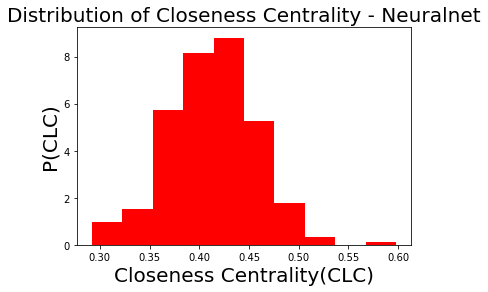

In [260]:
plt.figure(figsize=(6,4))
plt.hist(CLC_neural,color='red', density = True)
plt.title("Distribution of Closeness Centrality - Neuralnet",fontsize=20)
plt.ylabel("P(CLC)",fontsize=20)
plt.xlabel("Closeness Centrality(CLC)",fontsize=20)
plt.show(True)

**Betweenness Centrality**

In [261]:
BC_neural = dict(nx.betweenness_centrality(neuralnet))
BC_neural = list(BC_neural.values())

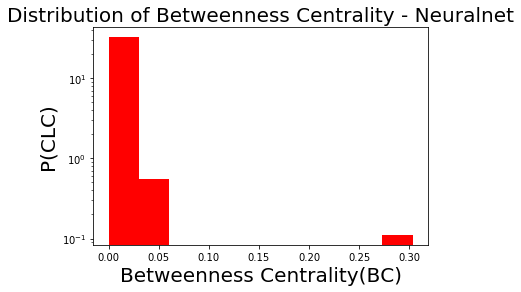

In [269]:
plt.figure(figsize=(6,4))
plt.hist(BC_neural,color='red',density = True)
plt.yscale('log')
plt.title("Distribution of Betweenness Centrality - Neuralnet",fontsize=20)
plt.ylabel("P(CLC)",fontsize=20)
plt.xlabel("Betweenness Centrality(BC)",fontsize=20)
plt.show(True)

**Eigenvector Centrality**

In [267]:
EC_neural = dict(nx.eigenvector_centrality(neuralnet))
EC_neural = list(EC_neural.values())

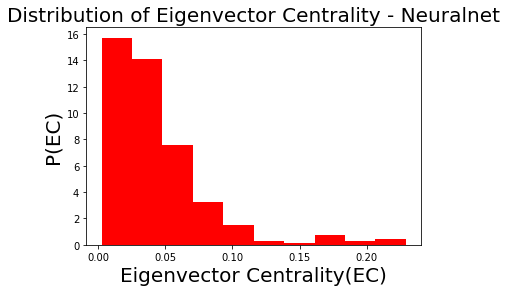

In [268]:
plt.figure(figsize=(6,4))
plt.hist(EC_neural,color='red',density=True)
plt.title("Distribution of Eigenvector Centrality - Neuralnet", fontsize=20)
plt.ylabel("P(EC)", fontsize=20)
plt.xlabel("Eigenvector Centrality(EC)", fontsize=20)
plt.show(True)

**Page Rank**

In [270]:
PR_neural = dict(nx.pagerank(neuralnet))
PR_neural = list(PR_neural.values())

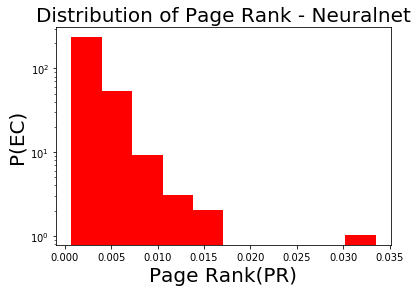

In [272]:
plt.figure(figsize=(6,4))
plt.hist(PR_neural,color='red',density=True)
plt.yscale('log')
plt.title("Distribution of Page Rank - Neuralnet", fontsize=20)
plt.ylabel("P(EC)", fontsize=20)
plt.xlabel("Page Rank(PR)", fontsize=20)
plt.show(True)

**Random Walk Acessibility**

In [273]:
RWA_neural=acc(neuralnet)

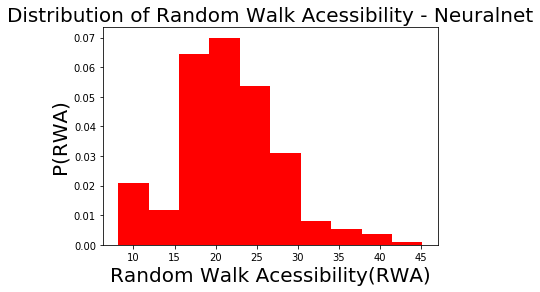

In [274]:
plt.figure(figsize=(6,4))
plt.hist(RWA_neural,color='red',density=True)
plt.title("Distribution of Random Walk Acessibility - Neuralnet", fontsize=20)
plt.ylabel("P(RWA)", fontsize=20)
plt.xlabel("Random Walk Acessibility(RWA)", fontsize=20)
plt.show(True)

In [276]:
CC_neural = communicability_centrality(neuralnet)

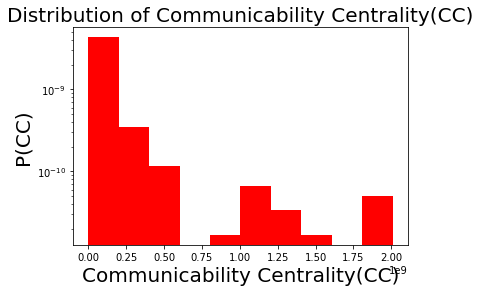

In [278]:
plt.figure(figsize=(6,4))
plt.hist(CC_neural,color='red',density=True)
plt.yscale('log')
plt.title("Distribution of Communicability Centrality(CC)", fontsize=20)
plt.ylabel("P(CC)", fontsize=20)
plt.xlabel("Communicability Centrality(CC)", fontsize=20)
plt.show(True)

In [1021]:
df_neural = pd.DataFrame({'Degree':degree_neural,'KC':KC_neural,'CLC':CLC_neural,'BC':BC_neural,'EC':EC_neural,'PR':PR_neural,'RWA':RWA_neural,'CC':CC_neural})

In [1304]:
df_neural.head()

Degree  KC       CLC        BC        EC        PR        RWA            CC
0      11  10  0.402721  0.001213  0.039202  0.002526  22.534010  5.867140e+07
1      29  10  0.442451  0.015743  0.065059  0.006208  28.846552  1.615984e+08
2      74  10  0.516579  0.048015  0.228403  0.014699  40.427715  1.991731e+09
3      52  10  0.500846  0.028536  0.152752  0.010312  37.932326  8.907994e+08
4      54  10  0.500846  0.031163  0.165358  0.010646  38.366413  1.043901e+09

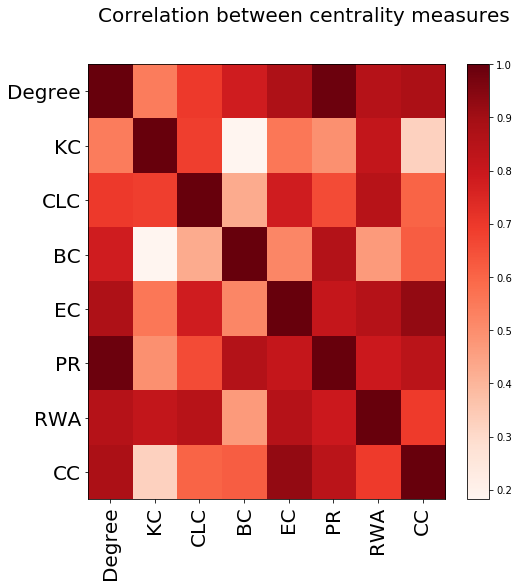

In [1023]:
neural_corr = df_neural.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(8,8))
plt.imshow(neural_corr, cmap='Reds', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(neural_corr)), neural_corr.columns, rotation='vertical', fontsize=20)
plt.yticks(range(len(neural_corr)), neural_corr.columns, fontsize=20);
plt.suptitle('Correlation between centrality measures', fontsize=20)
plt.grid(False)
plt.show()

In [1024]:
neural_corr.style.apply(highlight_greater)

The highest correlations in this case are:
- Degree and Betweenness Centrality, Eigenvector Centrality, Page Rank, Random Walk Acessibility, Communicability Centrality

- Closeness Centrality and Eigenvector centrality, Random Walk acessibility

- Eigenvector Centrality and Pagerank, Random Walk acessibility,Communicability Centrality

- Page Rank and Random Walk acessibility, Communicability Centrality

## US airport

Let's see a plot of this network.

First, creating a function to transform the graph to undirected and unweigthed

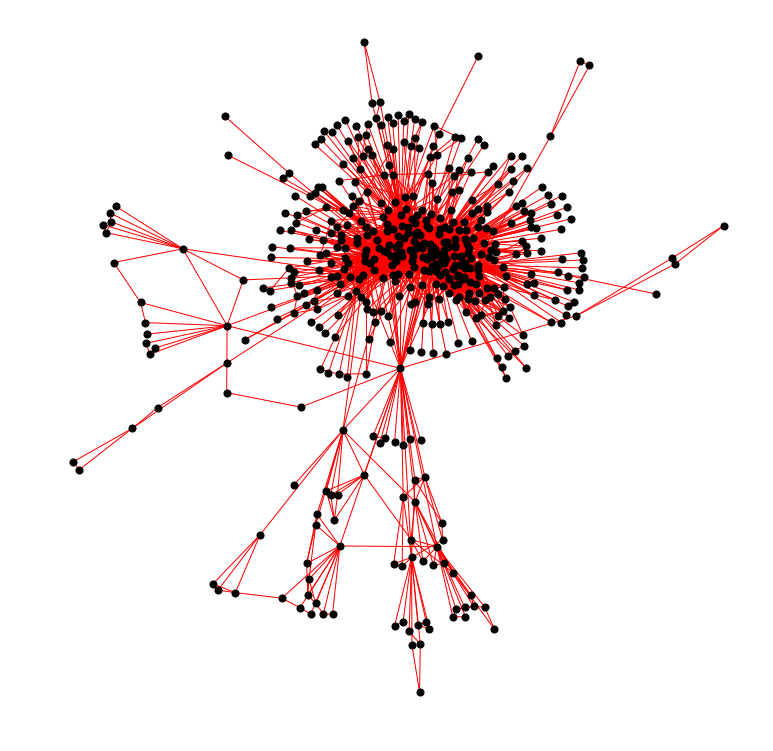

In [375]:
usair = nx.read_weighted_edgelist('us_air.txt')
Sub=sorted(nx.connected_component_subgraphs(usair), key = len, reverse=True)
usair=Sub[0]
usair = nx.convert_node_labels_to_integers(usair, first_label=0)
usair = tornar_naodirecionada(usair)

pos = nx.spring_layout(usair)
plt.figure(figsize=(10,10))
nx.draw(usair,with_labels = False, pos = pos,node_size=50,node_color = 'black', edge_color='red')
plt.show(True)

The number of nodes in this network:

In [376]:
degree_usair = dict(usair.degree())
degree_usair = list(degree_usair.values())

A histogram of de degree centrality for US airport network

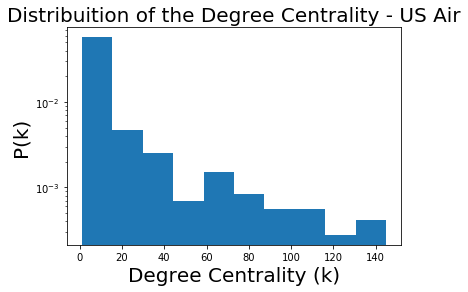

In [378]:
plt.figure(figsize=(6,4))
plt.hist(degree_usair,density=True)
plt.yscale('log')
plt.title("Distribuition of the Degree Centrality - US Air", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlabel("Degree Centrality (k)", fontsize=20)
plt.show(True)

**K-Core for US Airport**

In [380]:
KC_usair = dict(nx.core_number(usair))
KC_usair = list(KC_usair.values())

Now a histogram  

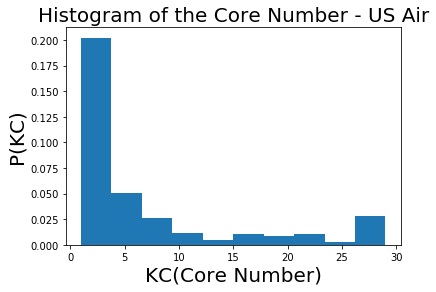

In [381]:
plt.figure(figsize=(6,4))
plt.hist(KC_usair, density=True)
plt.title("Histogram of the Core Number - US Air",fontsize=20)
plt.ylabel("P(KC)", fontsize=20)
plt.xlabel("KC(Core Number)", fontsize=20)
plt.show(True)

**Closeness Centrality for US Airport Network** 

In [383]:
CCL_usair = dict(nx.closeness_centrality(usair))
CCL_usair = list(CCL_usair.values())

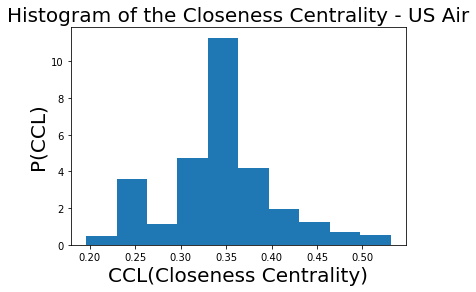

In [384]:
plt.figure(figsize=(6,4))
plt.hist(CCL_usair,density=True)
plt.title("Histogram of the Closeness Centrality - US Air",fontsize=20)
plt.ylabel("P(CCL)",fontsize=20)
plt.xlabel("CCL(Closeness Centrality)",fontsize=20)
plt.show(True)

**Betweenness Centrality for US Airport Network**

In [386]:
BC_usair = dict(nx.betweenness_centrality(usair))
BC_usair = list(BC_usair.values())

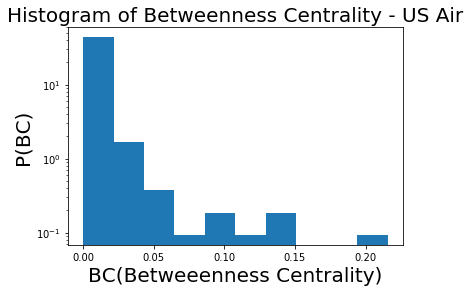

In [387]:
plt.figure(figsize=(6,4))
plt.hist(BC_usair,density=True)
plt.yscale('log')
plt.title("Histogram of Betweenness Centrality - US Air",fontsize=20)
plt.ylabel("P(BC)",fontsize=20)
plt.xlabel("BC(Betweeenness Centrality)", fontsize=20)
plt.show(True)

**Eigenvector Centrality for US Airport Network**

In [389]:
EC_usair = dict(nx.eigenvector_centrality(usair))
EC_usair = list(EC_usair.values())

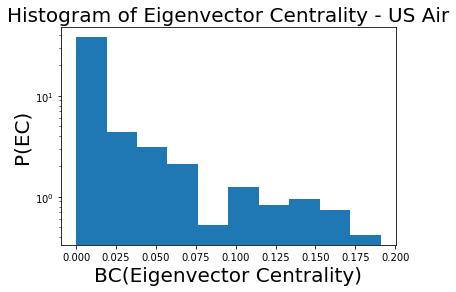

In [390]:
plt.figure(figsize=(6,4))
plt.hist(EC_usair,density=True)
plt.yscale('log')
plt.title("Histogram of Eigenvector Centrality - US Air",fontsize=20)
plt.ylabel("P(EC)",fontsize=20)
plt.xlabel("BC(Eigenvector Centrality)", fontsize=20)
plt.show(True)

**Page rank for US Airport**

In [393]:
PR_usair = dict(nx.pagerank(usair, alpha=0.85))
PR_usair = list(PR_usair.values())

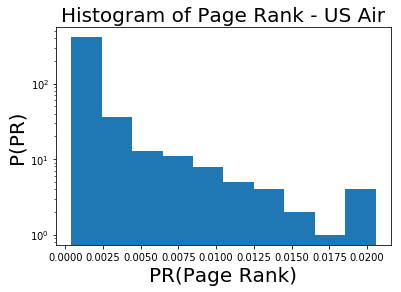

In [395]:
plt.figure(figsize=(6,4))
plt.hist(PR_usair,density=True)
plt.yscale('log')
plt.title("Histogram of Page Rank - US Air", fontsize=20)
plt.ylabel("P(PR)", fontsize=20)
plt.xlabel("PR(Page Rank)", fontsize=20)
plt.show(True)

**Random Walk Acessibility**

In [396]:
RWA_usair = acc(usair)

Now lets see a histogram of the Random walk acessibility

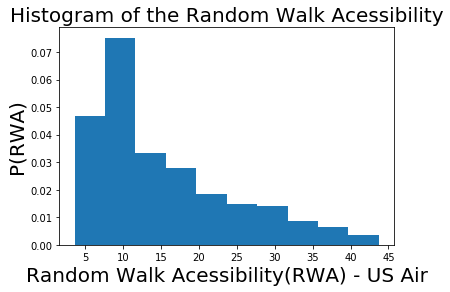

In [491]:
plt.figure(figsize=(6,4))
plt.hist(RWA_usair,density=True)
plt.title("Histogram of the Random Walk Acessibility", fontsize=20)
plt.ylabel("P(RWA)", fontsize=20)
plt.xlabel("Random Walk Acessibility(RWA) - US Air", fontsize=20)
plt.show(True)

**Communicability Centrality**

In [399]:
CC_usair = communicability_centrality(usair)

Now lets see a histogram of this measure:

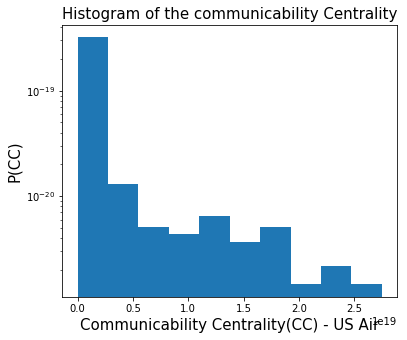

In [492]:
plt.figure(figsize=(6,5))
plt.hist(CC_usair,density=True)
plt.yscale('log')
plt.title("Histogram of the communicability Centrality", fontsize=15)
plt.ylabel("P(CC)", fontsize=15)
plt.xlabel("Communicability Centrality(CC) - US Air", fontsize=15)
plt.show(True)

**Now lets see a correlation matrix for this measures**

First we have to create a dataframe

In [1025]:
df_usair = pd.DataFrame({'Degree':degree_usair,'KC':KC_usair,'CLC':CCL_usair,'BC':BC_usair,'EC':EC_usair,'PR':PR_usair,'RWA':RWA_usair,'CC':CC_usair})

In [1305]:
df_usair.head()

Degree  KC       CLC            BC        EC        PR        RWA  \
0     145  29  0.526927  9.036545e-02  0.190768  0.019218  42.912104   
1      15  12  0.374063  4.654081e-04  0.036366  0.001996  23.687326   
2      40  21  0.429802  2.690916e-02  0.069163  0.006659  28.024325   
3       1   1  0.345329  0.000000e+00  0.003968  0.000413  10.768053   
4       4   4  0.347251  7.316568e-07  0.008793  0.000752  14.607056   

             CC  
0  2.749844e+19  
1  9.993167e+17  
2  3.614391e+18  
3  1.189834e+16  
4  5.842652e+16

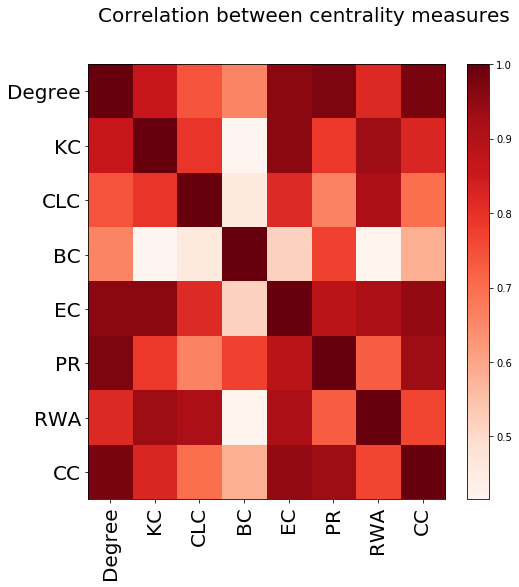

In [1027]:
usair_corr = df_usair.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(8,8))
plt.imshow(usair_corr, cmap='Reds', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(usair_corr)), usair_corr.columns, rotation='vertical', fontsize=20)
plt.yticks(range(len(usair_corr)), usair_corr.columns, fontsize=20);
plt.suptitle('Correlation between centrality measures', fontsize=20)
plt.grid(False)
plt.show()

In [1028]:
usair_corr.style.apply(highlight_greater)

The highest correlations in this case are:
- Degree and  K-core, Closeness Centrality, Eigenvector centrality, Page Rank, Communicability Centrality
- K-Core and Closeness Centrality, Eigenvector centrality, Page rank, Random Walk acessibility, Communicability centrality
- Closeness Centrality and Eigenvector centrality, Random Walk Acessibility, Communicability centrality
- Eigenvector Centrality and  Pagen rank, RWA, Communicability Centrality
- Page rank and  RWA, Communicability Centrality


- Here we see all the measures are high correlated. Only the Betweenes centrality is not high correlated to the other measures. A good question here is: Why betweenness centrality is not high correlated to the other measures?

- This network have a structure of onion, we can see very high values of K-Core. So, the betweeness of a central node who have a high degree, high communicability centrality, high other centrality measures dont are correlated to this measures, because of this structure.

- The network has almost equivalent measures of centrality. In other words, in this case almost of centrality measures point a node as central in a similar way.


## Question 2
Choose four dataset of cities (from OSMX or any other dataset) and compare the cities in terms of the centrality measures. That is, construct the histogram of:

- (i) Degree
- (ii) Closeness centrality 
- (iii) Betweenness centrality. 

Discuss which city is easier to navigate in terms of these distributions


In [67]:
import osmnx as ox

## São Carlos,São Paulo, Brasil

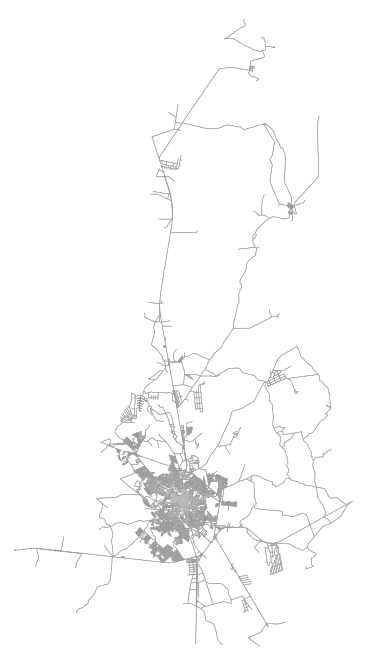

In [68]:
place1 = {'city' : 'São Carlos',
         'state' : 'São Paulo',
         'country' : 'Brazil'}
G1 = ox.graph_from_place(place1, network_type='drive')
fig, ax = ox.plot_graph(G1, fig_height=12, node_size=0, edge_linewidth=0.5)

In [121]:
type(G1)

networkx.classes.multidigraph.MultiDiGraph

Now converting this multidigraph in a graph undirected

In [69]:
saocarlos = tornar_naodirecionada(G1)
saocarlos = nx.convert_node_labels_to_integers(saocarlos, first_label=0)

In [70]:
type(saocarlos)

networkx.classes.graph.Graph

In [71]:
degree_saocarlos = dict(saocarlos.degree())
degree_saocarlos = list(degree_saocarlos.values())

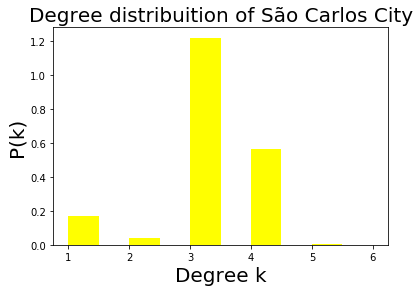

In [72]:
plt.figure(figsize=(6,4))
plt.hist(degree_saocarlos,density=True,color="yellow")
plt.title("Degree distribuition of São Carlos City",fontsize=20)
plt.ylabel("P(k)",fontsize=20)
plt.xlabel("Degree k", fontsize=20)
plt.show(True)


### Closeness Centrality for São Carlos

In [93]:
CC1 = dict(nx.closeness_centrality(saocarlos))
CC1 = list(CC1.values())

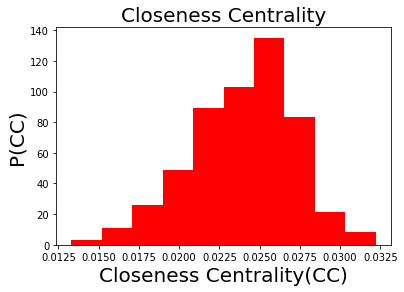

In [94]:
plt.figure(figsize=(6,4))
plt.hist(CC1,density=True,color="red")
plt.title("Closeness Centrality",fontsize=20)
plt.ylabel("P(CC)", fontsize=20)
plt.xlabel("Closeness Centrality(CC)", fontsize=20)
plt.show(True)

### Betweeness Centrality for São Carlos

In [108]:
BC1 = dict(nx.betweenness_centrality(saocarlos))
BC1 = list(BC1.values())

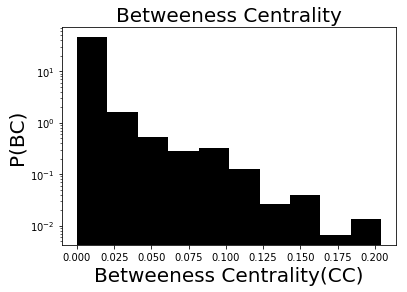

In [109]:
plt.figure(figsize=(6,4))
plt.hist(BC1,density=True,color="black")
plt.yscale('log')
plt.title("Betweeness Centrality",fontsize=20)
plt.ylabel("P(BC)", fontsize=20)
plt.xlabel("Betweeness Centrality(CC)", fontsize=20)
plt.show(True)

### Now a vizualition of edge centrality in this network(São Carlos) based on closeness centrality

In [1241]:
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors

In [177]:
edge_centrality = nx.closeness_centrality(nx.line_graph(G1))

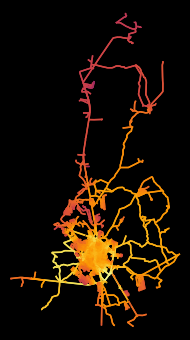

In [181]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G1.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G1, bgcolor='k', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

## Araraquara, São Paulo, Brasil

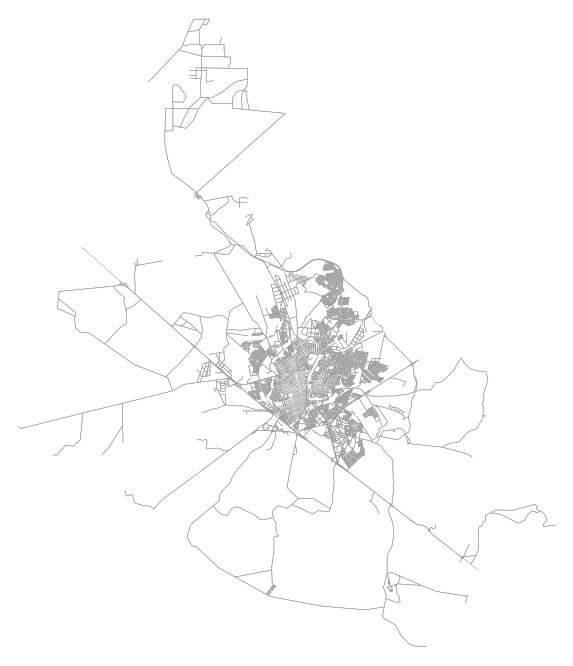

In [75]:
place2 = {'city' : 'Araraquara',
         'state' : 'São Paulo',
         'country' : 'Brazil'}
G2 = ox.graph_from_place(place2, network_type='drive')
fig, ax = ox.plot_graph(G2, fig_height=12, node_size=0, edge_linewidth=0.5)

In [76]:
araraquara = tornar_naodirecionada(G2)

### Degree Centrality for Araraquara

In [77]:
degree_araraquara = dict(araraquara.degree())
degree_araraquara = list(degree_araraquara.values())

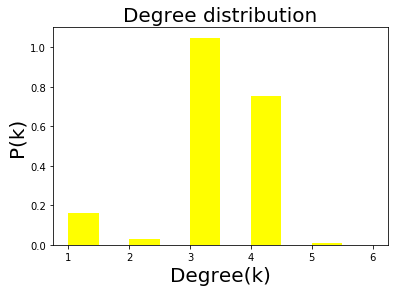

In [78]:
plt.figure(figsize=(6,4))
plt.hist(degree_araraquara,color="yellow",density=True)
plt.title("Degree distribution",fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlabel("Degree(k)", fontsize=20)
plt.show(True)

### Closeness Centrality for Araraquara

In [95]:
CC2 = dict(nx.closeness_centrality(araraquara))
CC2 = list(CC2.values())

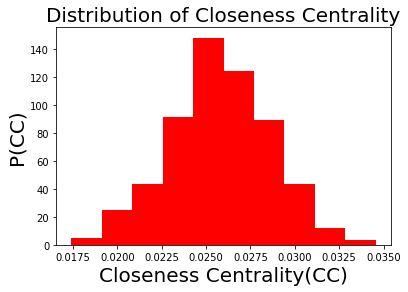

In [96]:
plt.figure(figsize=(6,4))
plt.hist(CC2,color="red",density=True)
plt.title("Distribution of Closeness Centrality",fontsize=20)
plt.ylabel("P(CC)", fontsize=20)
plt.xlabel("Closeness Centrality(CC)", fontsize=20)
plt.show(True)

### Betweenness Centrality for Araraquara

In [111]:
BC2 = dict(nx.betweenness_centrality(araraquara))
BC2 = list(BC2.values())

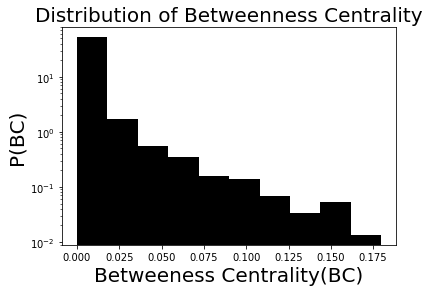

In [26]:
plt.figure(figsize=(6,4))
plt.hist(BC2,color="black",density=True)
plt.yscale('log')
plt.title("Distribution of Betweenness Centrality",fontsize=20)
plt.ylabel("P(BC)", fontsize=20)
plt.xlabel("Betweeness Centrality(BC)", fontsize=20)
plt.show(True)

### Now a vizualition of edge centrality in this network(Araraquara) based on closeness centrality

In [195]:
edge_centrality = nx.closeness_centrality(nx.line_graph(G2))

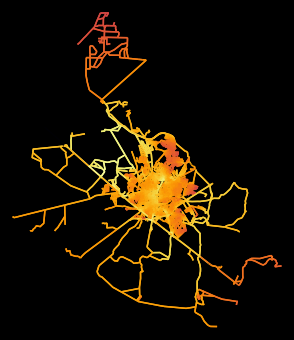

In [196]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G2.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G2, bgcolor='k', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

## Campinas, São Paulo, Brasil

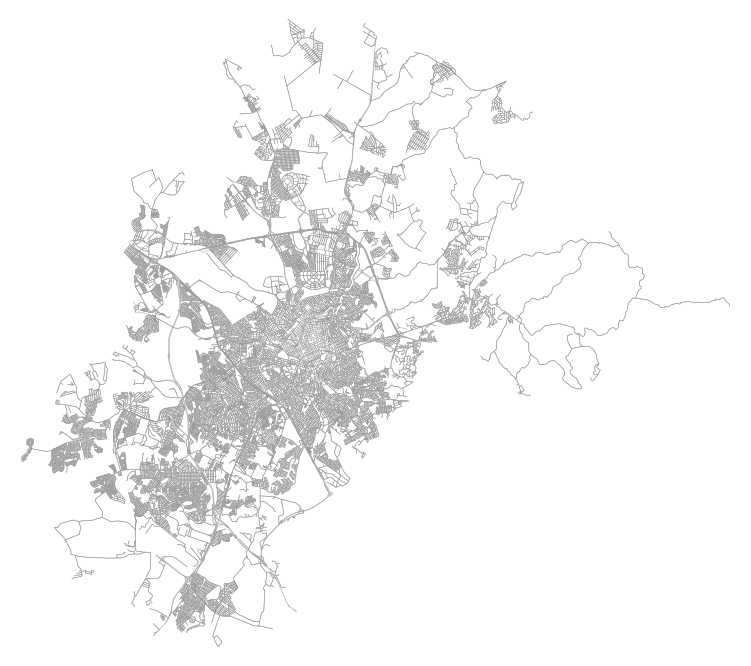

In [4]:
place3 = {'city' : 'Campinas',
         'state' : 'São Paulo',
         'country' : 'Brazil'}
G3 = ox.graph_from_place(place3, network_type='drive')
fig, ax = ox.plot_graph(G3, fig_height=12, node_size=0, edge_linewidth=0.5)

In [5]:
campinas = tornar_naodirecionada(G3)

### Degree distribution of Campinas

In [80]:
degree_campinas = dict(campinas.degree())
degree_campinas = list(degree_campinas.values())

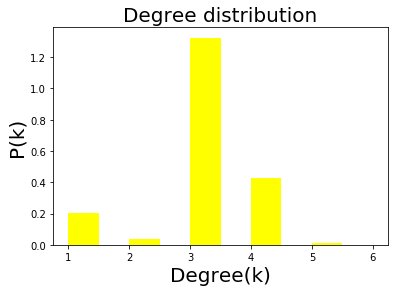

In [81]:
plt.figure(figsize=(6,4))
plt.hist(degree_campinas,color="yellow",density=True)
plt.title("Degree distribution", fontsize=20)
plt.ylabel("P(k)",fontsize=20)
plt.xlabel("Degree(k)", fontsize=20)
plt.show(True)

### Closeness Centrality 

In [97]:
CC3 = dict(nx.closeness_centrality(campinas))
CC3 = list(CC3.values())

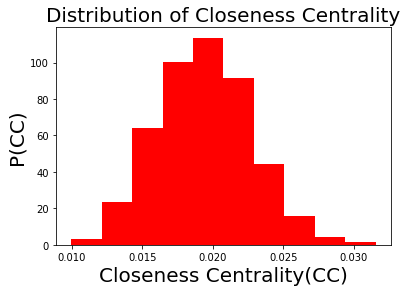

In [98]:
plt.figure(figsize=(6,4))
plt.hist(CC3,color="red",density=True)
plt.title("Distribution of Closeness Centrality", fontsize=20)
plt.ylabel("P(CC)",fontsize=20)
plt.xlabel("Closeness Centrality(CC)", fontsize=20)
plt.show(True)

### Betweenness Centrality

In [52]:
BC3 = dict(nx.betweenness_centrality(campinas))
BC3 = list(BC3.values())

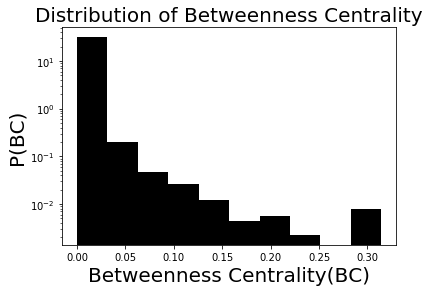

In [63]:
plt.figure(figsize=(6,4))
plt.hist(BC3,color="black",density=True)
plt.yscale('log')
plt.title("Distribution of Betweenness Centrality", fontsize=20)
plt.ylabel("P(BC)",fontsize=20)
plt.xlabel("Betweenness Centrality(BC)", fontsize=20)
plt.show(True)

In [213]:
edge_centrality = nx.closeness_centrality(nx.line_graph(G3))

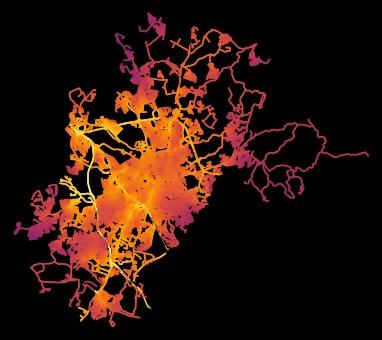

In [214]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G3.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G3, bgcolor='k', axis_off=True, node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

### Discussion about what city is easiest to navigate

Let's see all the histograms of the degree distribution together:

Text(0.5, 1.0, 'Degree Distribution Campinas')

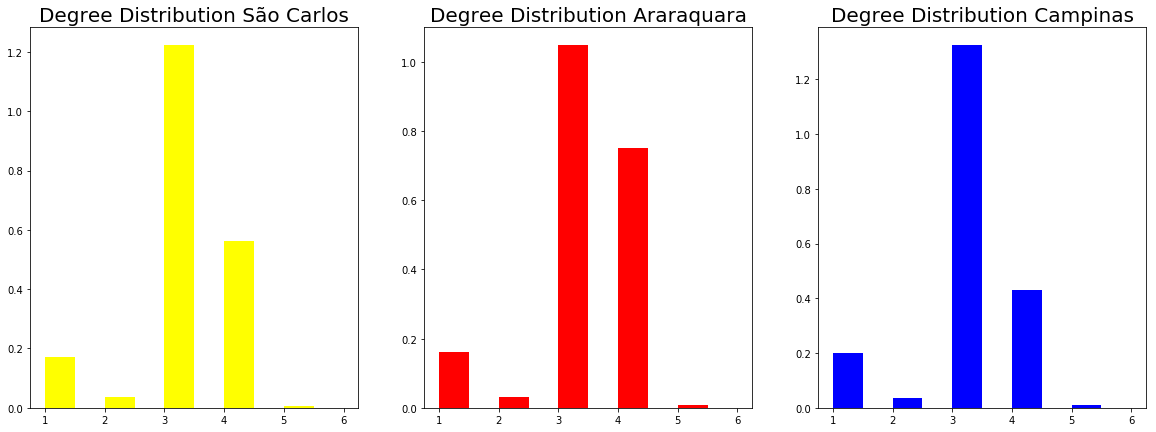

In [114]:
fig, axs = plt.subplots(1, 3,figsize=(20, 7))
axs[0].hist(degree_saocarlos,color="yellow",density=True)
axs[0].set_title('Degree Distribution São Carlos', fontsize=20)
axs[1].hist(degree_araraquara,color="red",density=True)
axs[1].set_title('Degree Distribution Araraquara', fontsize=20)
axs[2].hist(degree_campinas, color="blue", density=True)
axs[2].set_title('Degree Distribution Campinas', fontsize=20)

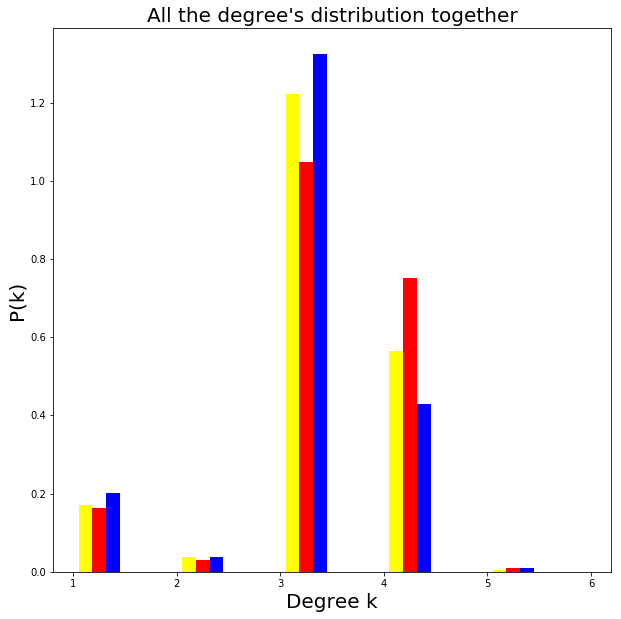

In [836]:
plt.figure(figsize=(10,10))
plt.hist([degree_saocarlos,degree_araraquara,degree_campinas],density=True,color=["yellow","red","blue"])
plt.title("All the degree's distribution together",fontsize=20)
plt.ylabel("P(k)",fontsize=20)
plt.xlabel("Degree k", fontsize=20)
plt.show(True)

For the degree we see in the three networks we have much nodes with degree 3 and 4, futhermore we see the three distributions are very similar. It's possible to note the city of Campinas dont have much nodes with degree 4.

Now let's see together the histograms of closeness centrality

Text(0.5, 1.0, 'Closeness Centrality Distribution Campinas')

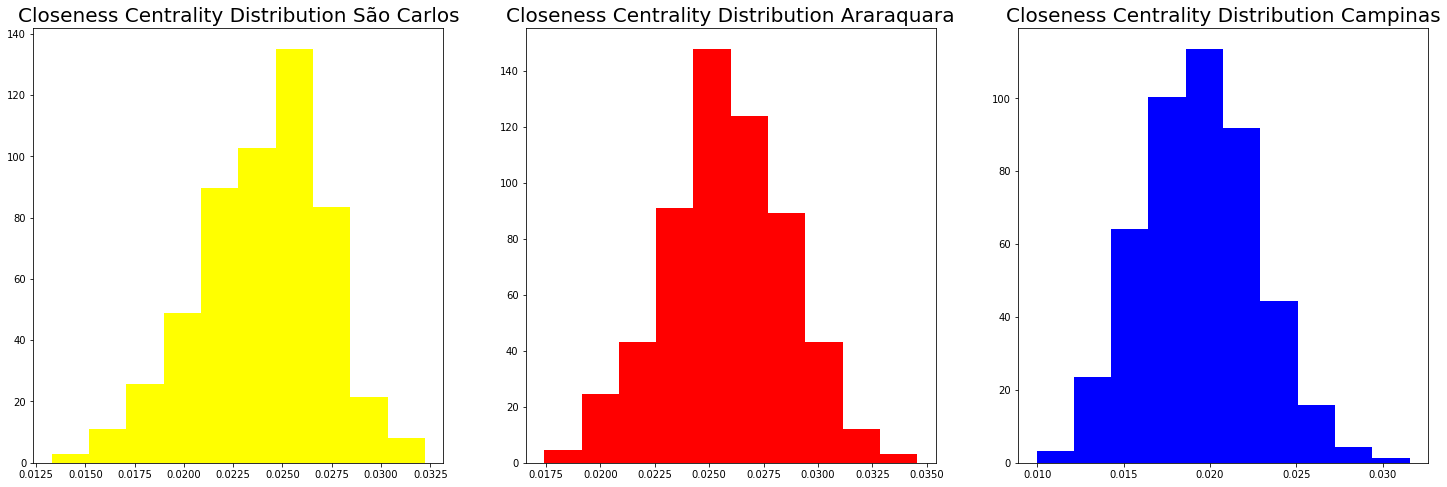

In [117]:
fig, axs = plt.subplots(1, 3,figsize=(25, 8))
axs[0].hist(CC1,color="yellow",density=True)
axs[0].set_title('Closeness Centrality Distribution São Carlos', fontsize=20)
axs[1].hist(CC2,color="red",density=True)
axs[1].set_title('Closeness Centrality Distribution Araraquara', fontsize=20)
axs[2].hist(CC3, color="blue", density=True)
axs[2].set_title('Closeness Centrality Distribution Campinas', fontsize=20)

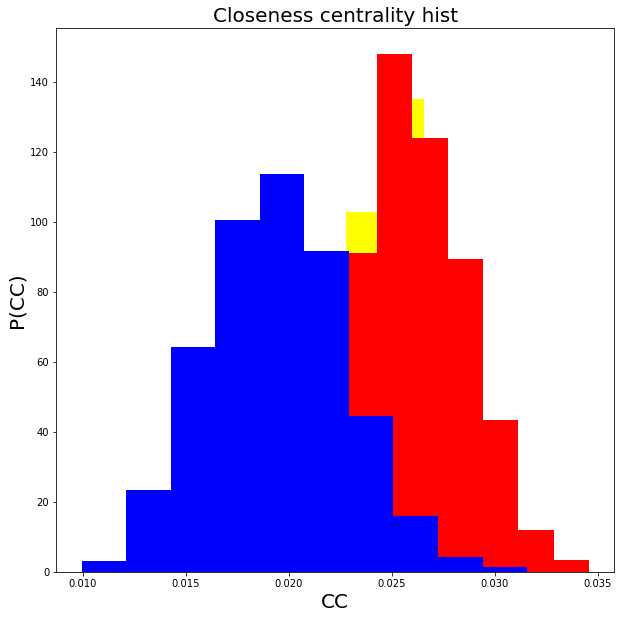

In [840]:
plt.figure(figsize=(10,10))
plt.hist(CC1,density=True,color="yellow")
plt.hist(CC2,density=True,color="red")
plt.hist(CC3,density=True,color="blue")
plt.title("Closeness centrality hist",fontsize=20)
plt.ylabel("P(CC)",fontsize=20)
plt.xlabel("CC", fontsize=20)
plt.show(True)

Let's see the means and medians for this measure in the case of each city

In [106]:
print('The mean of Closeness Centrality for São Carlos is:', st.mean(CC1))
print('The mean of Closeness Centrality for Araraquara is:', st.mean(CC2))
print('The mean of Closeness Centrality for Campinas is:', st.mean(CC3))

The mean of Closeness Centrality for São Carlos is: 0.023990078219709735
The mean of Closeness Centrality for Araraquara is: 0.025804014294389367
The mean of Closeness Centrality for Campinas is: 0.019390713910815975


In [105]:
print('The median of Closeness Centrality for São Carlos is:', st.median(CC1))
print('The median of Closeness Centrality for Araraquara is:', st.median(CC2))
print('The median of Closeness Centrality for Campinas is:', st.median(CC3))

The median of Closeness Centrality for São Carlos is: 0.024383132625109348
The median of Closeness Centrality for Araraquara is: 0.02576824160330566
The median of Closeness Centrality for Campinas is: 0.019344045314227697


The closeness centrality of a node $x$ is defined by:
    $$ C(x) = \frac{1}{\sum_{y}d(x,y)}$$
where $d(x,y)$ is the shortest path between $x$ and $y$.

So if a node has high value of closeness centrality means starting in others nodes, you can reach that node with a few walks.

In the context of navigation in a city, it's good have many nodes with closeness centrality high. 

With this considerations in mind, _Araraquara_ have a mean and median for closeness centrality higher, followed by _São Carlos_ and _Campinas_.

Now let's do the same for Betweennes Centrality

Text(0.5, 1.0, 'Betweenness Centrality Distribution Campinas')

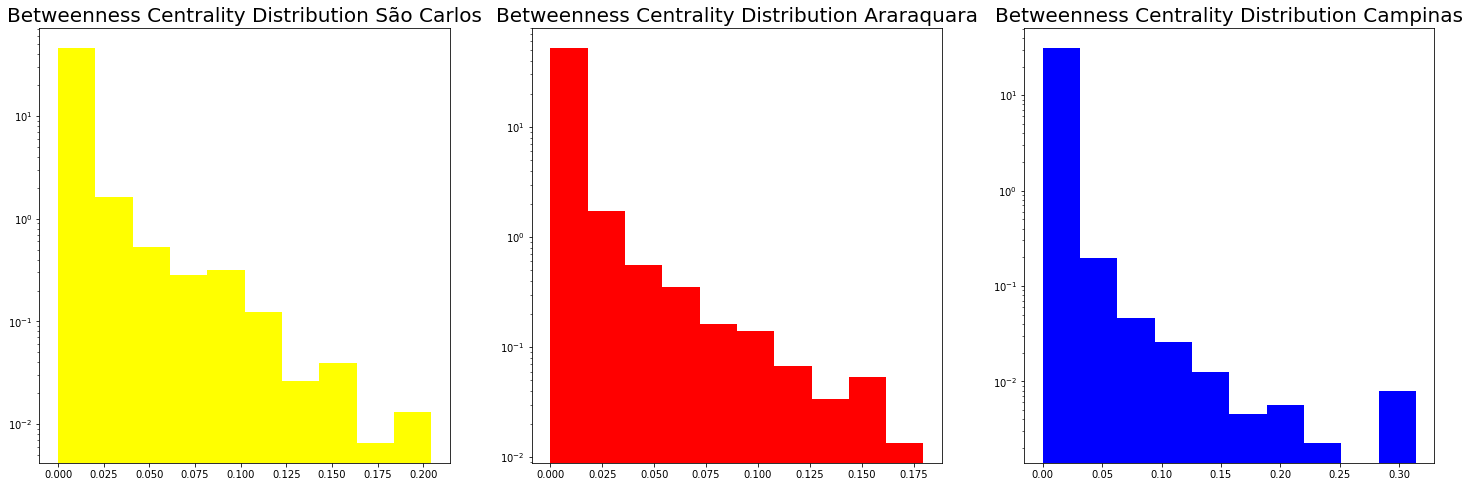

In [119]:
fig, axs = plt.subplots(1, 3,figsize=(25, 8))
axs[0].hist(BC1,color="yellow",density=True)
axs[0].set_yscale('log')
axs[0].set_title('Betweenness Centrality Distribution São Carlos', fontsize=20)
axs[1].hist(BC2,color="red",density=True)
axs[1].set_yscale('log')
axs[1].set_title('Betweenness Centrality Distribution Araraquara', fontsize=20)
axs[2].hist(BC3, color="blue", density=True)
axs[2].set_yscale('log')
axs[2].set_title('Betweenness Centrality Distribution Campinas', fontsize=20)

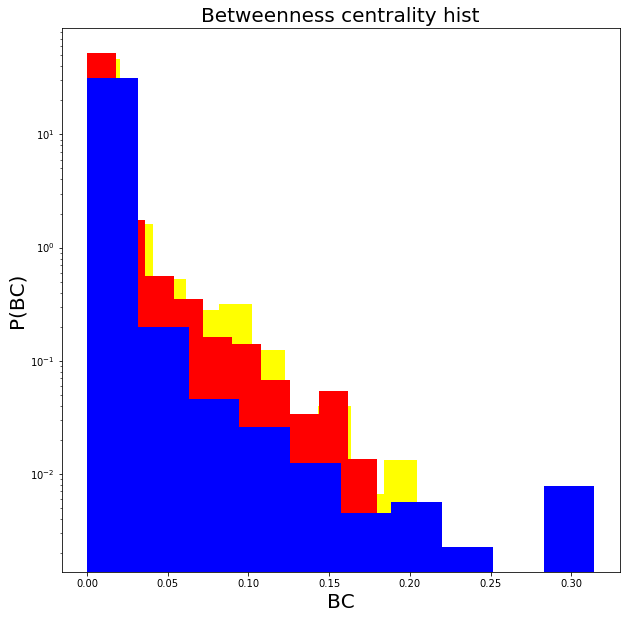

In [844]:
plt.figure(figsize=(10,10))
plt.hist(BC1,density=True,color="yellow")
plt.hist(BC2,density=True,color="red")
plt.hist(BC3,density=True,color="blue")
plt.yscale('log')
plt.title("Betweenness centrality hist",fontsize=20)
plt.ylabel("P(BC)",fontsize=20)
plt.xlabel("BC", fontsize=20)
plt.show(True)

Let's see the means and medians for this measure in the case of each city

In [120]:
print('The mean of Betweenness Centrality for São Carlos is:', st.mean(BC1))
print('The mean of Betweenness Centrality for Araraquara is:', st.mean(BC2))
print('The mean of Betweenness Centrality for Campinas is:', st.mean(BC3))

The mean of Betweenness Centrality for São Carlos is: 0.005576678115024483
The mean of Betweenness Centrality for Araraquara is: 0.004623434016989532
The mean of Betweenness Centrality for Campinas is: 0.0018477891002248567


In [121]:
print('The median of Betweenness Centrality for São Carlos is:', st.median(BC1))
print('The median of Betweenness Centrality for Araraquara is:', st.median(BC2))
print('The median of Betweenness Centrality for Campinas is:', st.median(BC3))

The median of Betweenness Centrality for São Carlos is: 0.0012555442282183617
The median of Betweenness Centrality for Araraquara is: 0.0010913825131185382
The median of Betweenness Centrality for Campinas is: 0.00021467932170589083


The Betweenness Centrality of a node $x$ is defined by:
    $$BC(x) = \sum_{x\neq t \neq u}\frac{\sigma_{ut}(x)}{\sigma_{ut}}$$
where $\sigma_{ut}$ is the number of all the shortest paths between $u$ and $t$. Futhermore, $\sigma_{ut}(x)$ is the number of those paths that pass through $x$.

So, in the context of navigation in a city, if you have nodes with betweeness centrality high, means that nodes are points of concentration, so probably you will have a traffic jam in this nodes

Looking for the histogram of betweenness centrality for the cities and the mean and median values, you can see the highest values in descending order are for _Campinas_, _São Carlos_ and _Araraquara_.  

Now let's see the plot together about closeness centrality for edges using the line graph.

In [493]:
import cv2

In [495]:
f_sao = cv2.imread('saocarlos.png')
f_ara = cv2.imread('araraquara.png')
f_cam = cv2.imread('campinas.png')

<Figure size 1080x1440 with 0 Axes>

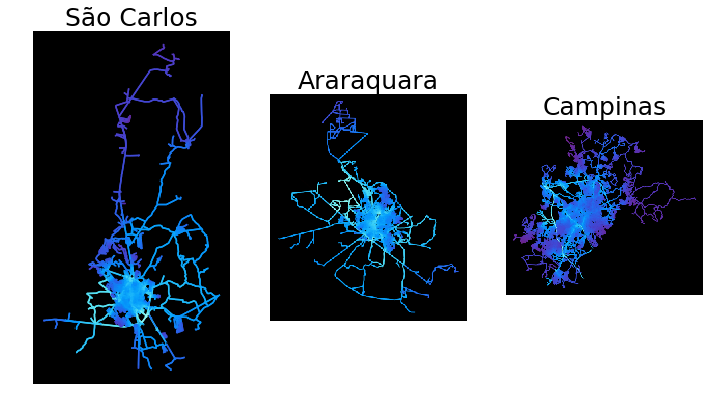

In [520]:
plt.figure(figsize=[15,20])
fig, axs = plt.subplots(1, 3,figsize=(12,15))



axs[0].imshow(f_sao)
axs[0].set_title("São Carlos", fontsize=25)
axs[0].axis('off')


axs[1].imshow(f_ara)
axs[1].set_title("Araraquara",fontsize=25)
axs[1].axis('off')

axs[2].imshow(f_cam)
axs[2].set_title("Campinas",fontsize=25)
axs[2].axis('off')

plt.show()

In this plot we can see the closeness centrality for de edges. It's possíble to note the city of _Campinas_ has many streets with more dark color, means the closeness centrality is low,i.e, it's difficult to reach that street from other streets. In the case of _São Carlos_ we can see more dark colors in some streets and _Araraquara_ dont have much dark streets.

**Conclusion**: Taking consideration the histograms and the last plot is possible to say: _Araraquara_ is easiest to navigation followed by _São Carlos_ and _Campinas_. 

## Question 3

For the following networks:

a) Human protein network (http://konect.cc/networks/maayan-vidal)

b) C. elegans protein network 2007 (http://interactome.dfci.harvard.edu/C_elegans/index.php?page=download)

c) C. elegansprotein network 2004 (http://interactome.dfci.harvard.edu/C_elegans/index.php?page=download)

d) Western US power grid (http://www-personal.umich.edu/~mejn/netdata/power.zip)

e) R dependency network (http://www.mas.ncl.ac.uk/~ncsg3/blog/dependencies.csv)

Construct the histogram of the centrality measures and comparethem. Use the measures (i) degree, (ii) eigenvector centrality, (iii) pagerank and (v) closeness 
centrality. Are there similarities between networks of the same type, such as among technologicalor biological networks?

## Human protein Network

In [1316]:
humanprotein = nx.read_edgelist("out.txt", nodetype=int)
humanprotein = nx.convert_node_labels_to_integers(humanprotein, first_label=0)

**A plot of this Network considering only the principal component**

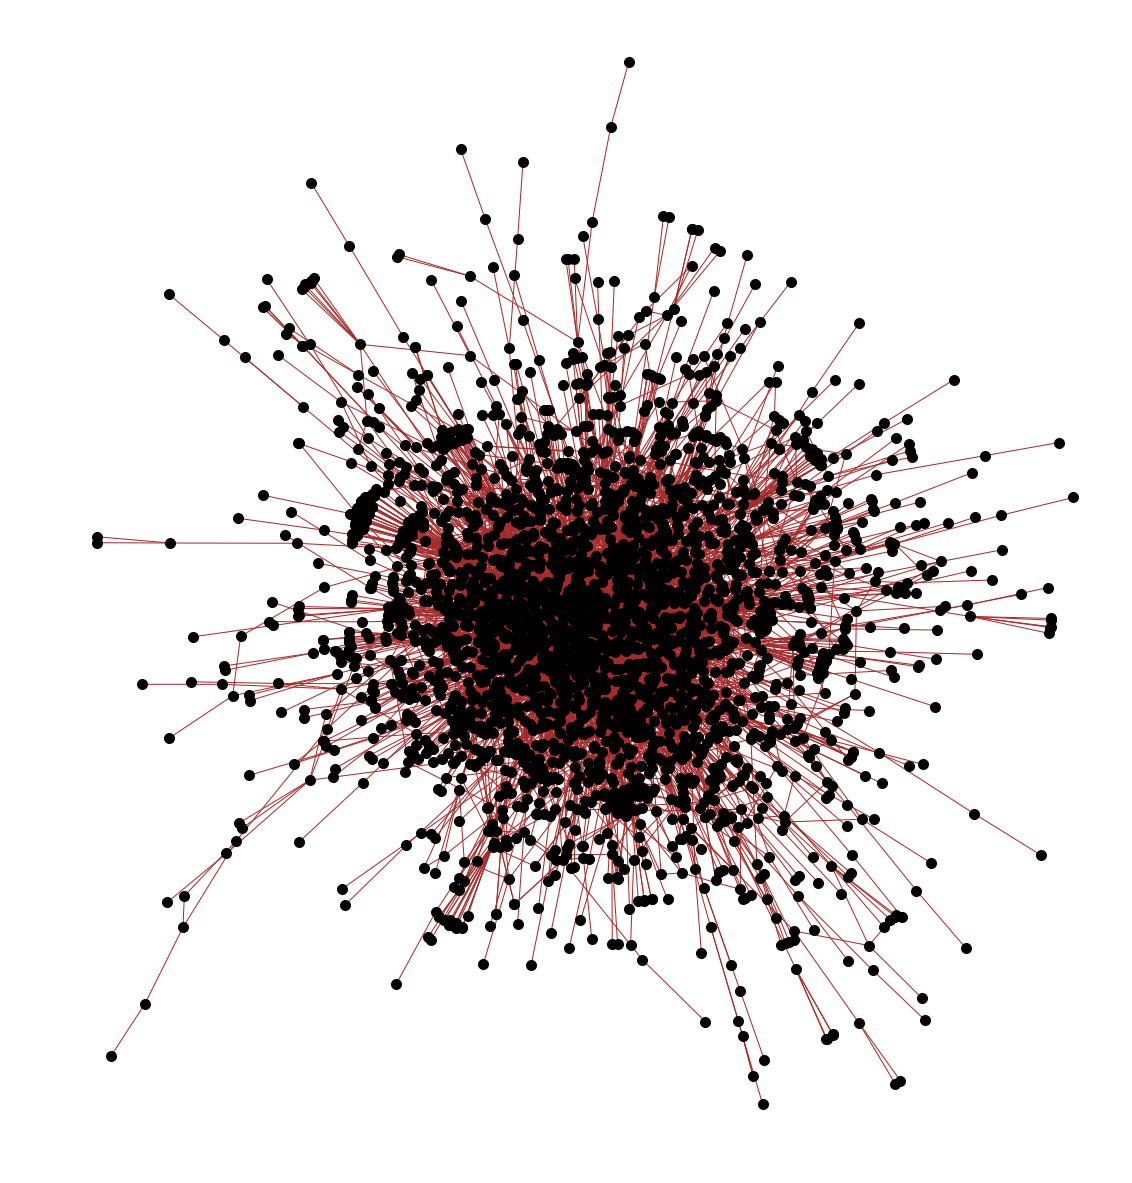

In [1320]:
Sub=sorted(nx.connected_component_subgraphs(humanprotein), key = len, reverse=True)
humanprotein =Sub[0]
humanprotein = nx.convert_node_labels_to_integers(humanprotein, first_label=0)
humanprotein = humanprotein.to_undirected()

humanprotein.remove_edges_from(nx.selfloop_edges(humanprotein)) #Removing the self loops

pos = nx.spring_layout(humanprotein) 
plt.figure(figsize=(15,16))
nx.draw(humanprotein,with_labels = False, pos = pos,node_size=100,node_color = 'black', edge_color='brown')
plt.show(True)

**Histogram of the degree measure**

In [413]:
degree_humanprotein = dict(humanprotein.degree())
degree_humanprotein = list(degree_humanprotein.values())

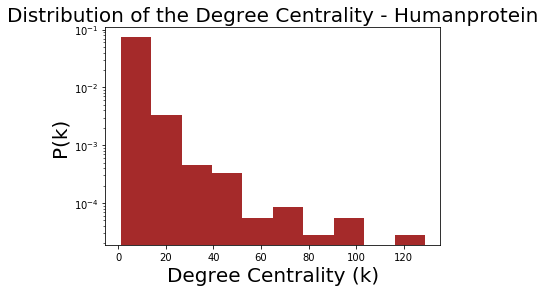

In [300]:
plt.figure(figsize=(6,4))
plt.hist(degree_humanprotein,color='brown', density=True)
plt.yscale('log')
plt.title("Distribution of the Degree Centrality - Humanprotein", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlabel("Degree Centrality (k)", fontsize=20)
plt.show(True)

**Histogram of the eigenvector centrality**

In [303]:
EC_humanprotein = dict(nx.eigenvector_centrality(humanprotein, max_iter = 1000))
EC_humanprotein = list(EC_humanprotein.values())

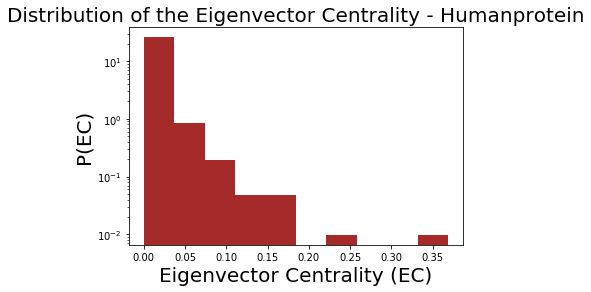

In [306]:
plt.figure(figsize=(6,4))
plt.hist(EC_humanprotein,color='brown',density=True)
plt.yscale('log')
plt.title("Distribution of the Eigenvector Centrality - Humanprotein",fontsize=20)
plt.ylabel("P(EC)", fontsize=20)
plt.xlabel("Eigenvector Centrality (EC)", fontsize=20)
plt.show(True)

**Histogram of the page rank measure**

In [307]:
PR_humanprotein = dict(nx.pagerank(humanprotein, alpha=0.85))
PR_humanprotein = list(PR_humanprotein.values())

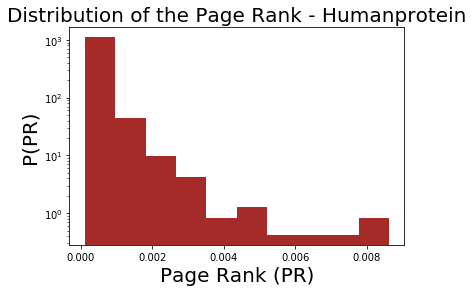

In [309]:
plt.figure(figsize=(6,4))
plt.hist(PR_humanprotein,color='brown',density=True)
plt.yscale('log')
plt.title("Distribution of the Page Rank - Humanprotein",fontsize=20)
plt.ylabel("P(PR)", fontsize=20)
plt.xlabel("Page Rank (PR)", fontsize=20)
plt.show(True)

**Histogram of the closeness centrality measure**

In [310]:
CLC_humanprotein = dict(nx.closeness_centrality(humanprotein))
CLC_humanprotein = list(CLC_humanprotein.values())

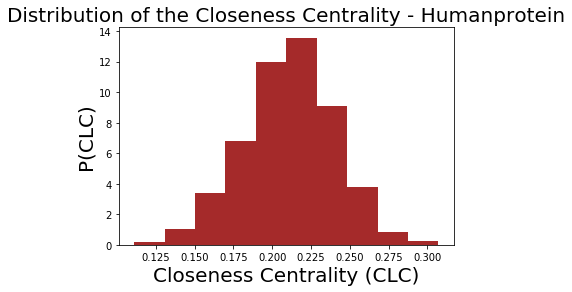

In [312]:
plt.figure(figsize=(6,4))
plt.hist(CLC_humanprotein,color='brown',density=True)
plt.title("Distribution of the Closeness Centrality - Humanprotein", fontsize=20)
plt.ylabel("P(CLC)", fontsize=20)
plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
plt.show(True)

## C. elegans protein network 2007

In [313]:
celegans2007 = nx.read_edgelist("celegans2007.txt")

**Lets see a plot of this network**

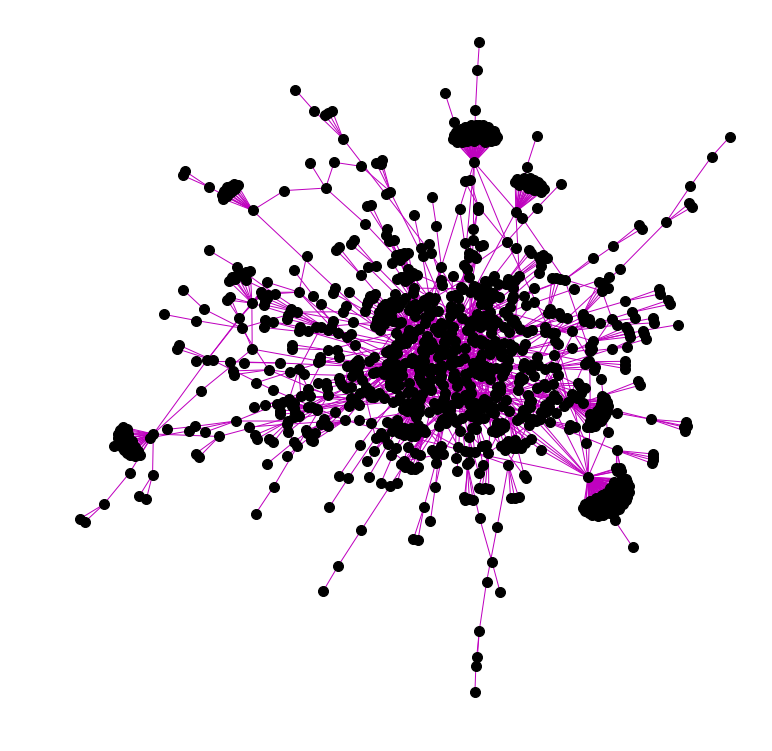

In [316]:
Sub=sorted(nx.connected_component_subgraphs(celegans2007), key = len, reverse=True)
celegans2007=Sub[0]
celegans2007.remove_edges_from(nx.selfloop_edges(celegans2007))

celegans2007 = nx.convert_node_labels_to_integers(celegans2007, first_label=0)
celegans2007 = tornar_naodirecionada(celegans2007)


pos = nx.spring_layout(celegans2007) 
plt.figure(figsize=(10,10))
nx.draw(celegans2007,with_labels = False, pos = pos,node_size=100,node_color = 'black', edge_color='m')
plt.show(True)

**Histogram of the degree measure**

In [317]:
degree_celegans2007 = dict(celegans2007.degree())
degree_celegans2007 = list(degree_celegans2007.values())

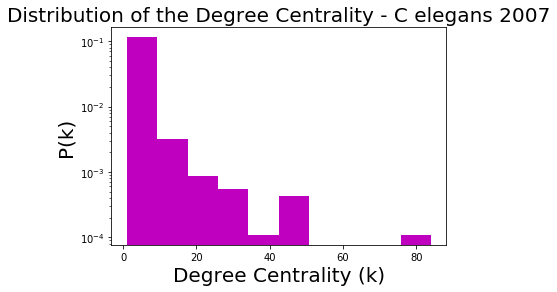

In [319]:
plt.figure(figsize=(6,4))
plt.hist(degree_celegans2007,color='m',density=True)
plt.yscale('log')
plt.title("Distribution of the Degree Centrality - C elegans 2007", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlabel("Degree Centrality (k)", fontsize=20)
plt.show(True)

**Histogram of the eigenvector centrality measure**


In [320]:
EC_celegans2007 = dict(nx.eigenvector_centrality(celegans2007, max_iter = 1000))
EC_celegans2007 = list(EC_celegans2007.values())

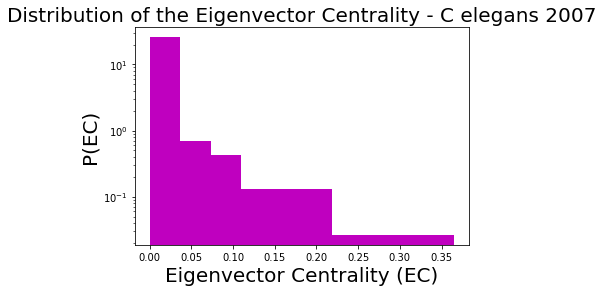

In [321]:
plt.figure(figsize=(6,4))
plt.hist(EC,color='m',density=True)
plt.yscale('log')
plt.title("Distribution of the Eigenvector Centrality - C elegans 2007",fontsize=20)
plt.ylabel("P(EC)", fontsize=20)
plt.xlabel("Eigenvector Centrality (EC)", fontsize=20)
plt.show(True)

**Histogram of the page rank measure**

In [323]:
PR_celegans2007 = dict(nx.pagerank(celegans2007, alpha=0.85))
PR_celegans2007 = list(PR_celegans2007.values())

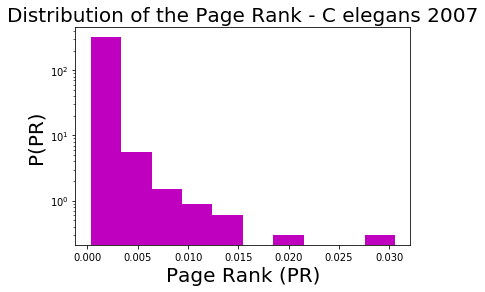

In [325]:
plt.figure(figsize=(6,4))
plt.hist(PR_celegans2007,color='m',density=True)
plt.yscale('log')
plt.title("Distribution of the Page Rank - C elegans 2007",fontsize=20)
plt.ylabel("P(PR)", fontsize=20)
plt.xlabel("Page Rank (PR)", fontsize=20)
plt.show(True)

**Histogram of the closeness centrality measure**

In [326]:
CLC_celegans2007 = dict(nx.closeness_centrality(celegans2007))
CLC_celegans2007 = list(CLC_celegans2007.values())

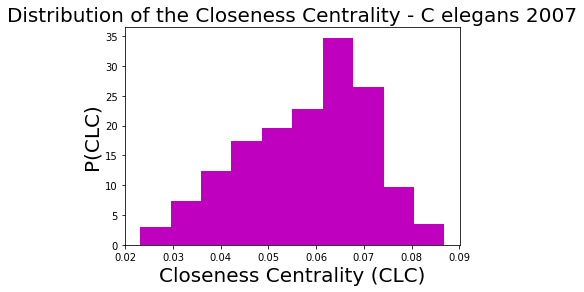

In [327]:
plt.figure(figsize=(6,4))
plt.hist(CLC,color='m',density=True)
plt.title("Distribution of the Closeness Centrality - C elegans 2007", fontsize=20)
plt.ylabel("P(CLC)", fontsize=20)
plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
plt.show(True)

## C. elegans protein network 2004

In [330]:
celegans2004 = nx.read_edgelist("celegans2004.txt")

**Let's see a plot of this network**

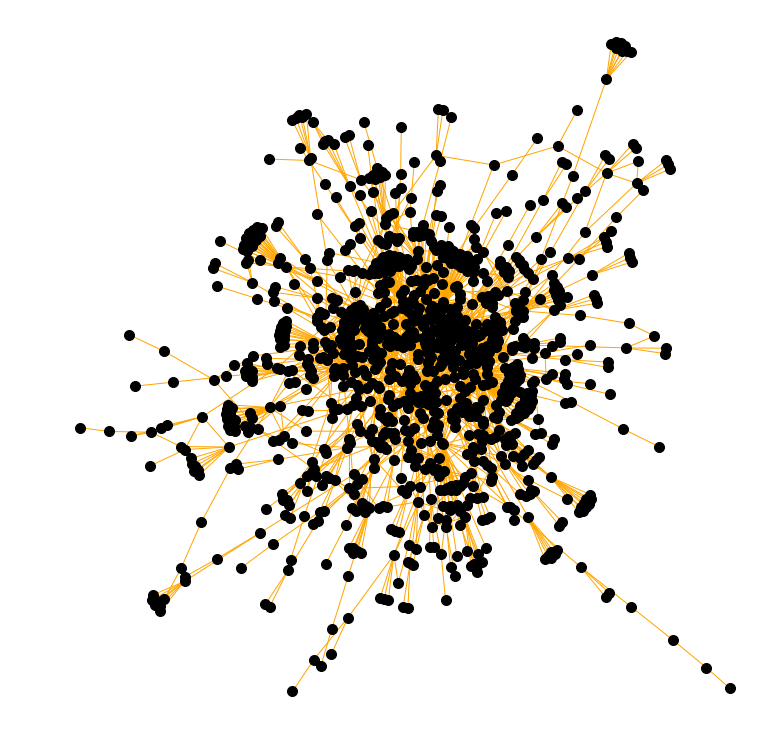

In [333]:
Sub=sorted(nx.connected_component_subgraphs(celegans2004), key = len, reverse=True)
celegans2004=Sub[0]
celegans2004.remove_edges_from(nx.selfloop_edges(celegans2004))


celegans2004 = nx.convert_node_labels_to_integers(celegans2004, first_label=0)
celegans2004 = tornar_naodirecionada(celegans2004)

pos = nx.spring_layout(celegans2004) 
plt.figure(figsize=(10,10))
nx.draw(celegans2004,with_labels = False, pos = pos,node_size=100,node_color = 'black', edge_color='orange')
plt.show(True)

**Histogram of the degree measure**

In [334]:
degree_celegans2004 = dict(celegans2004.degree())
degree_celegans2004 = list(degree_celegans2004.values())

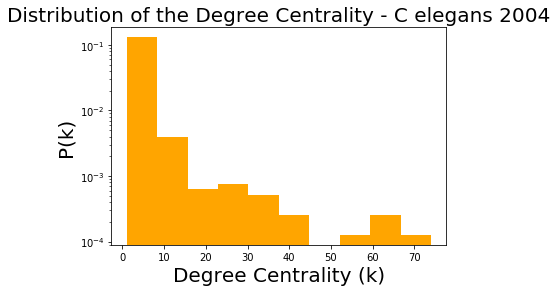

In [335]:
plt.figure(figsize=(6,4))
plt.hist(degree_celegans2004,color='orange', density=True)
plt.yscale('log')
plt.title("Distribution of the Degree Centrality - C elegans 2004", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlabel("Degree Centrality (k)", fontsize=20)
plt.show(True)

**Histogram of the eigenvector centrality measure**


In [336]:
EC_celegans2004 = dict(nx.eigenvector_centrality(celegans2004, max_iter = 1000))
EC_celegans2004 = list(EC_celegans2004.values())

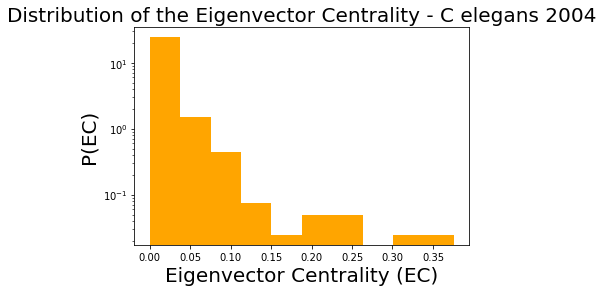

In [338]:
plt.figure(figsize=(6,4))
plt.hist(EC_celegans2004, color='orange', density=True)
plt.yscale('log')
plt.title("Distribution of the Eigenvector Centrality - C elegans 2004",fontsize=20)
plt.ylabel("P(EC)", fontsize=20)
plt.xlabel("Eigenvector Centrality (EC)", fontsize=20)
plt.show(True)

**Histogram of the page rank measure**

In [340]:
PR_celegans2004 = dict(nx.pagerank(celegans2004, alpha=0.85))
PR_celegans2004 = list(PR_celegans2004.values())

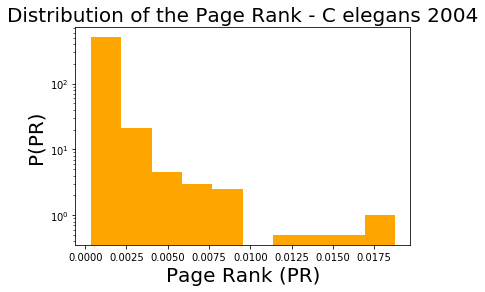

In [342]:
plt.figure(figsize=(6,4))
plt.hist(PR_celegans2004,color='orange', density=True)
plt.yscale('log')
plt.title("Distribution of the Page Rank - C elegans 2004",fontsize=20)
plt.ylabel("P(PR)", fontsize=20)
plt.xlabel("Page Rank (PR)", fontsize=20)
plt.show(True)

**Histogram of the closeness centrality measure**

In [347]:
CLC_celegans2004 = dict(nx.closeness_centrality(celegans2004))
CLC_celegans2004 = list(CLC_celegans2004.values())

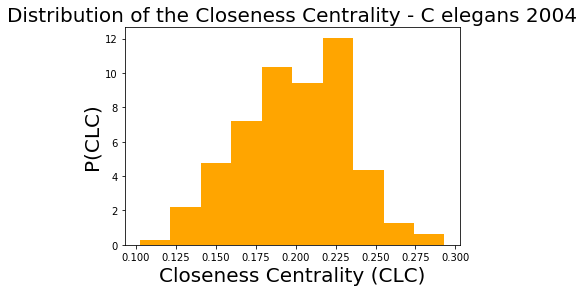

In [348]:
plt.figure(figsize=(6,4))
plt.hist(CLC_celegans2004,color='orange', density=True)
plt.title("Distribution of the Closeness Centrality - C elegans 2004", fontsize=20)
plt.ylabel("P(CLC)", fontsize=20)
plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
plt.show(True)

## Western US power grid

In [349]:
powergrid = nx.read_gml("power.gml",label='id')

**A plot of this network** 

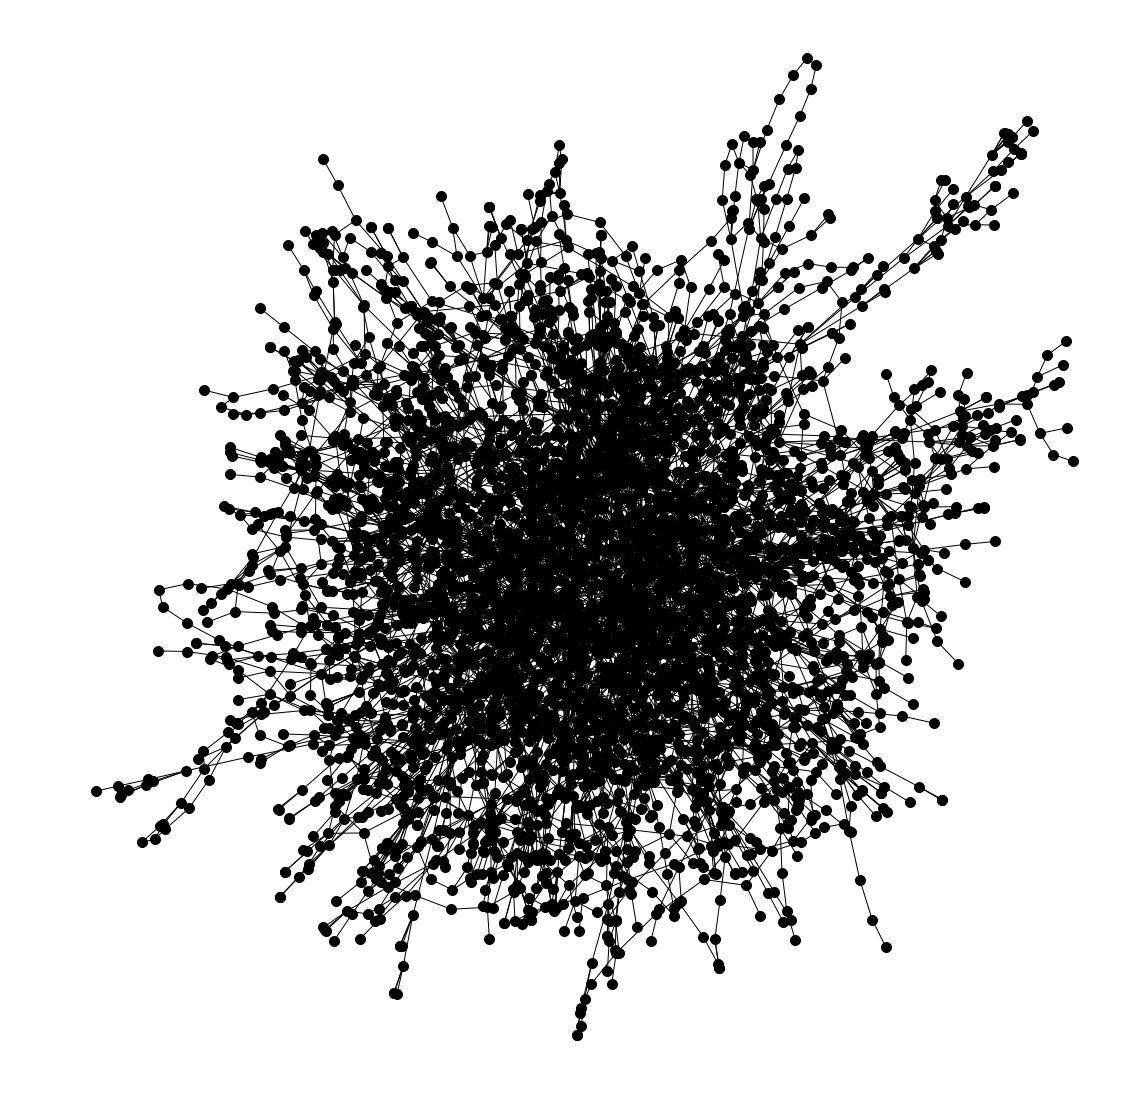

In [350]:
Sub=sorted(nx.connected_component_subgraphs(powergrid), key = len, reverse=True)
powergrid=Sub[0]
powergrid = nx.convert_node_labels_to_integers(powergrid, first_label=0)
powergrid = powergrid.to_undirected()

pos = nx.spring_layout(powergrid) 
plt.figure(figsize=(15,15))
nx.draw(powergrid,with_labels = False, pos = pos,node_size=100,node_color = 'black', edge_color='k')
plt.show(True)

**Histogram of the degree measure**

In [352]:
degree_powergrid = dict(powergrid.degree())
degree_powergrid = list(degree_powergrid.values())

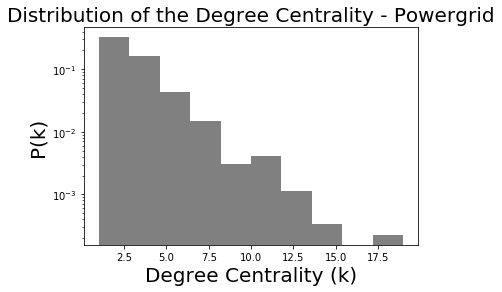

In [355]:
plt.figure(figsize=(6,4))
plt.hist(degree_powergrid,color='gray',density=True)
plt.yscale('log')
plt.title("Distribution of the Degree Centrality - Powergrid", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlabel("Degree Centrality (k)", fontsize=20)
plt.show(True)

**Histogram of the eigenvector centrality measure**


In [357]:
EC_powergrid = dict(nx.eigenvector_centrality(powergrid, max_iter = 1000))
EC_powergrid = list(EC_powergrid.values())

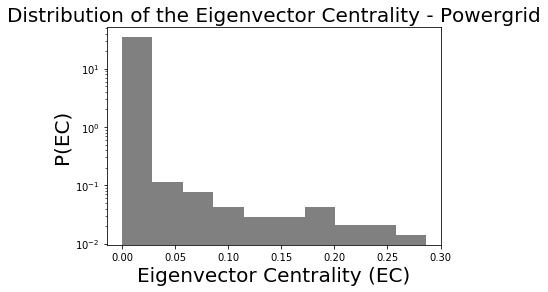

In [358]:
plt.figure(figsize=(6,4))
plt.hist(EC_powergrid,color='gray', density=True)
plt.yscale('log')
plt.title("Distribution of the Eigenvector Centrality - Powergrid",fontsize=20)
plt.ylabel("P(EC)", fontsize=20)
plt.xlabel("Eigenvector Centrality (EC)", fontsize=20)
plt.show(True)

**Histogram of the page rank measure**

In [363]:
PR_powergrid = dict(nx.pagerank(powergrid, alpha=0.85))
PR_powergrid = list(PR_powergrid.values())

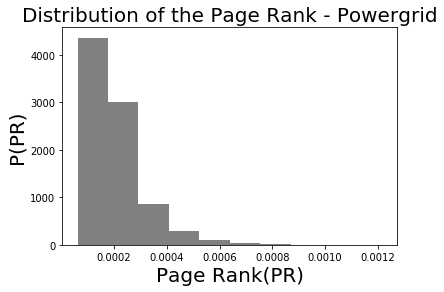

In [364]:
plt.figure(figsize=(6,4))
plt.hist(PR_powergrid, color='gray',density=True)
plt.title("Distribution of the Page Rank - Powergrid",fontsize=20)
plt.ylabel("P(PR)", fontsize=20)
plt.xlabel("Page Rank(PR)", fontsize=20)
plt.show(True)

**Histogram of closeness Centrality for this network**

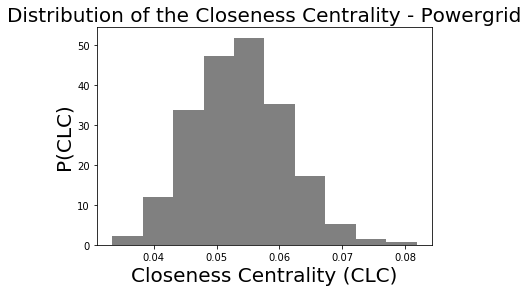

In [365]:
CLC_powergrid = dict(nx.closeness_centrality(powergrid))
CLC_powergrid = list(CLC_powergrid.values())

plt.figure(figsize=(6,4))
plt.hist(CLC_powergrid,color='gray',density=True)
plt.title("Distribution of the Closeness Centrality - Powergrid", fontsize=20)
plt.ylabel("P(CLC)", fontsize=20)
plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
plt.show(True)

## R dependency network

Here we have to work in the file text for transform it in a file that can be read using the read_edgelist function

In [249]:
with open('dependencies.txt', 'r') as f:
    lines = f.readlines()

# remove spaces
lines = [line.strip() for line in lines]

# finally, write lines in the file
out = open('dependencies2.txt', 'w')
for line in lines:
    out.write(line)
    out.write('\n')
out.close()

Ok, now the function read_edgelist will work in this case!

In [366]:
Rdependency = nx.read_edgelist("dependencies2.txt")
Rdependency = nx.convert_node_labels_to_integers(Rdependency, first_label=0)

Lets make a plot of this network

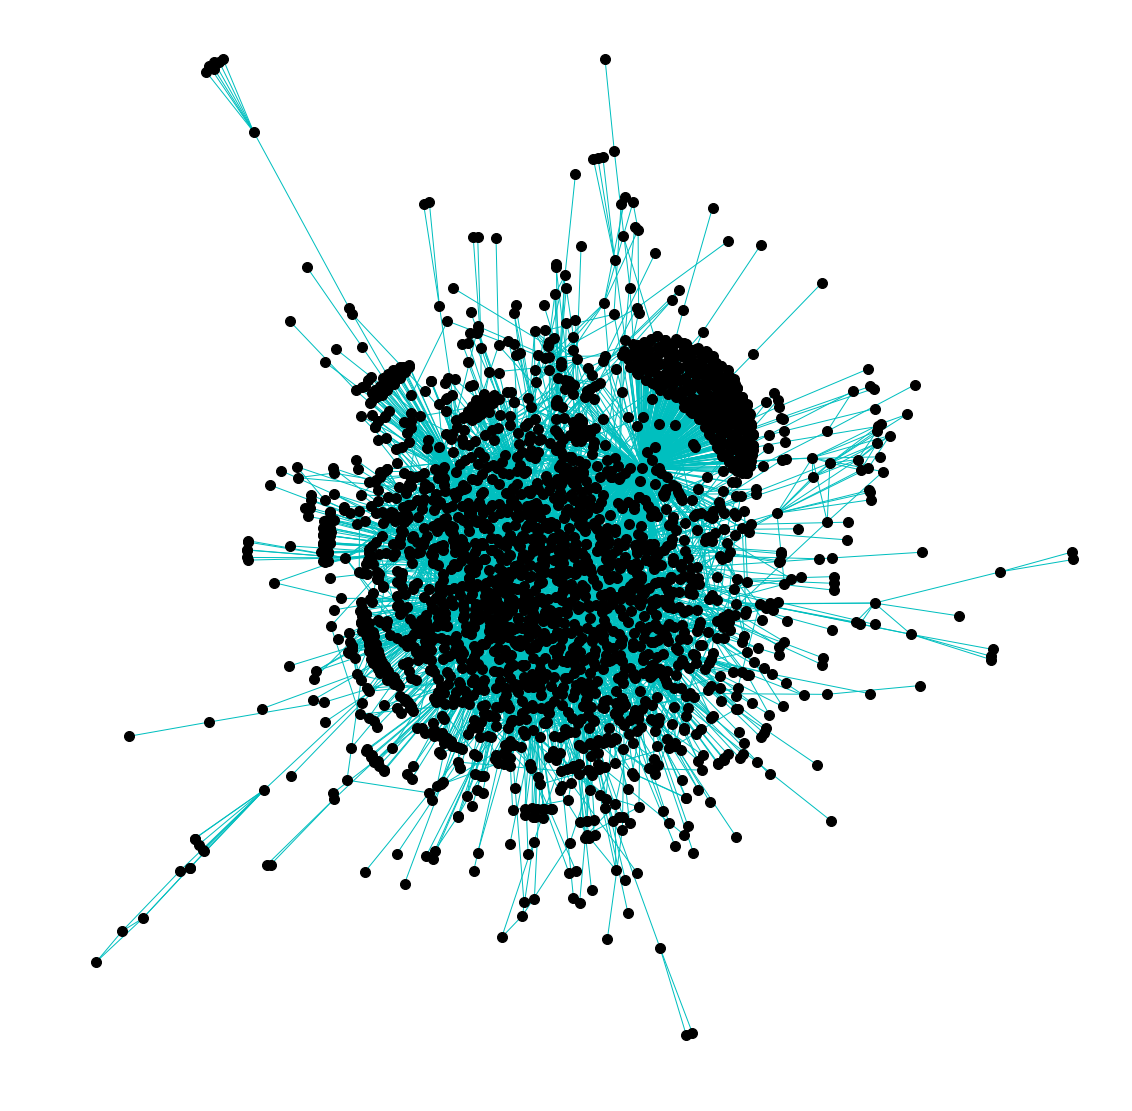

In [367]:
Sub=sorted(nx.connected_component_subgraphs(Rdependency), key = len, reverse=True)
Rdependency=Sub[0]
Rdependency.remove_edges_from(nx.selfloop_edges(Rdependency))
Rdependency = nx.convert_node_labels_to_integers(Rdependency, first_label=0)

Rdependency = Rdependency.to_undirected()

pos = nx.spring_layout(Rdependency) 
plt.figure(figsize=(15,15))
nx.draw(Rdependency,with_labels = False, pos = pos,node_size=100,node_color = 'black', edge_color='c')
plt.show(True)

**Histogram of the degree measure**

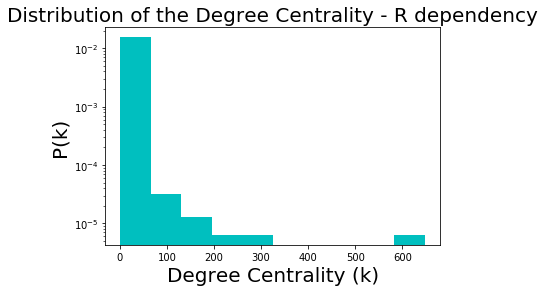

In [424]:
degree_rdependency = dict(Rdependency.degree())
degree_rdependency = list(degree_rdependency.values())

plt.figure(figsize=(6,4))
plt.hist(degree_rdepen,color='c',density=True)
plt.yscale('log')
plt.title("Distribution of the Degree Centrality - R dependency", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.xlabel("Degree Centrality (k)", fontsize=20)
plt.show(True)

**Histogram of the eigenvector centrality measure**

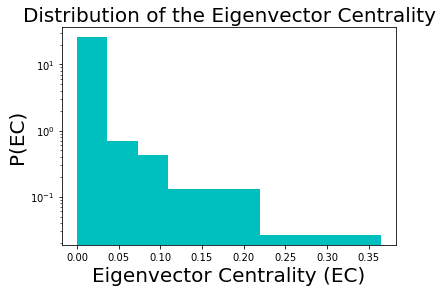

In [429]:
EC_rdependency = dict(nx.eigenvector_centrality(Rdependency, max_iter = 1000))
EC_rdependency = list(EC_rdependency.values())

plt.figure(figsize=(6,4))
plt.hist(EC,color='c',density=True)
plt.yscale('log')
plt.title("Distribution of the Eigenvector Centrality",fontsize=20)
plt.ylabel("P(EC)", fontsize=20)
plt.xlabel("Eigenvector Centrality (EC)", fontsize=20)
plt.show(True)

**Histogram of the page rank measure**

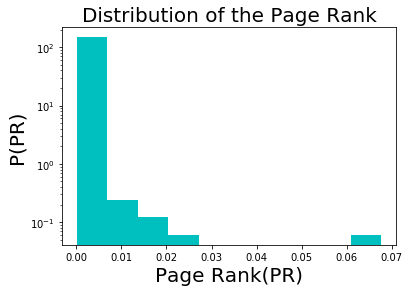

In [432]:
PR_rdependency = dict(nx.pagerank(Rdependency, alpha=0.85))
PR_rdependency = list(PR_rdependency.values())

plt.figure(figsize=(6,4))
plt.hist(PR_rdependency,color='c',density=True)
plt.yscale('log')
plt.title("Distribution of the Page Rank",fontsize=20)
plt.ylabel("P(PR)", fontsize=20)
plt.xlabel("Page Rank(PR)", fontsize=20)
plt.show(True)

**Histogram of closeness Centrality for this network**

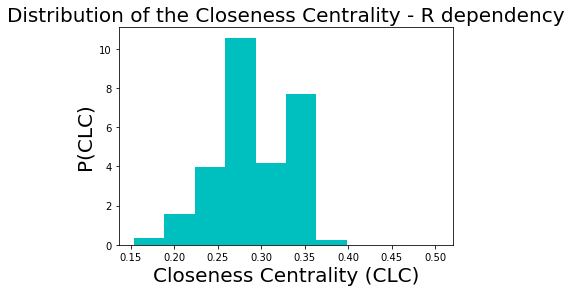

In [374]:
CLC_rdependency = dict(nx.closeness_centrality(Rdependency))
CLC_rdependency = list(CLC_rdependency.values())

plt.figure(figsize=(6,4))
plt.hist(CLC_rdependency,color='c',density=True)
plt.title("Distribution of the Closeness Centrality - R dependency", fontsize=20)
plt.ylabel("P(CLC)", fontsize=20)
plt.xlabel("Closeness Centrality (CLC)", fontsize=20)
plt.show(True)

### Analysis

**Comparing the degree distribution**

Text(0.5, 1.0, 'R dependency')

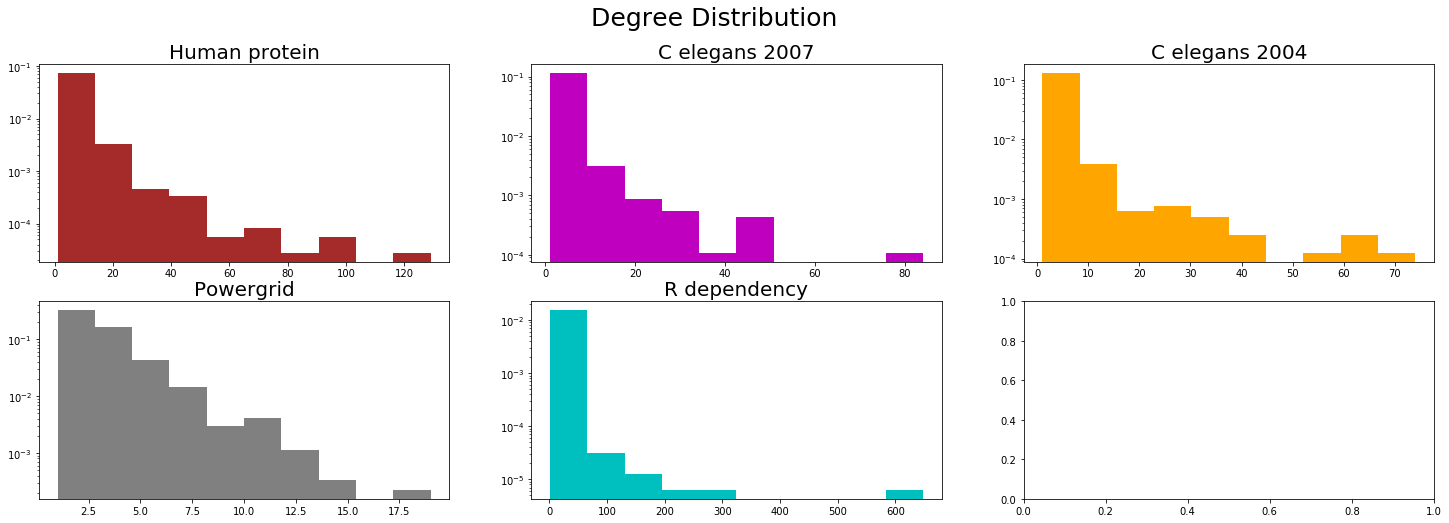

In [625]:
fig, axs = plt.subplots(2, 3,figsize=(25, 8))
fig.suptitle('Degree Distribution', fontsize=25)

axs[0,0].hist(degree_humanprotein,color="brown",density=True)
axs[0,0].set_yscale('log')
axs[0,0].set_title('Human protein', fontsize=20)


axs[0,1].hist(degree_celegans2007,color="m",density=True)
axs[0,1].set_yscale('log')
axs[0,1].set_title('C elegans 2007', fontsize=20)

axs[0,2].hist(degree_celegans2004, color="orange", density=True)
axs[0,2].set_yscale('log')
axs[0,2].set_title('C elegans 2004', fontsize=20)

axs[1,0].hist(degree_powergrid, color="gray", density=True)
axs[1,0].set_yscale('log')
axs[1,0].set_title('Powergrid', fontsize=20)

axs[1,1].hist(degree_rdependency, color="c", density=True)
axs[1,1].set_yscale('log')
axs[1,1].set_title('R dependency', fontsize=20)



In this plot we see the distribution of Human Protein, C. elegans 2007, and C. elegans 2004 are very similar. This three networks are biological ones.

**Eigenvector centrality**

Text(0.5, 1.0, 'R dependency')

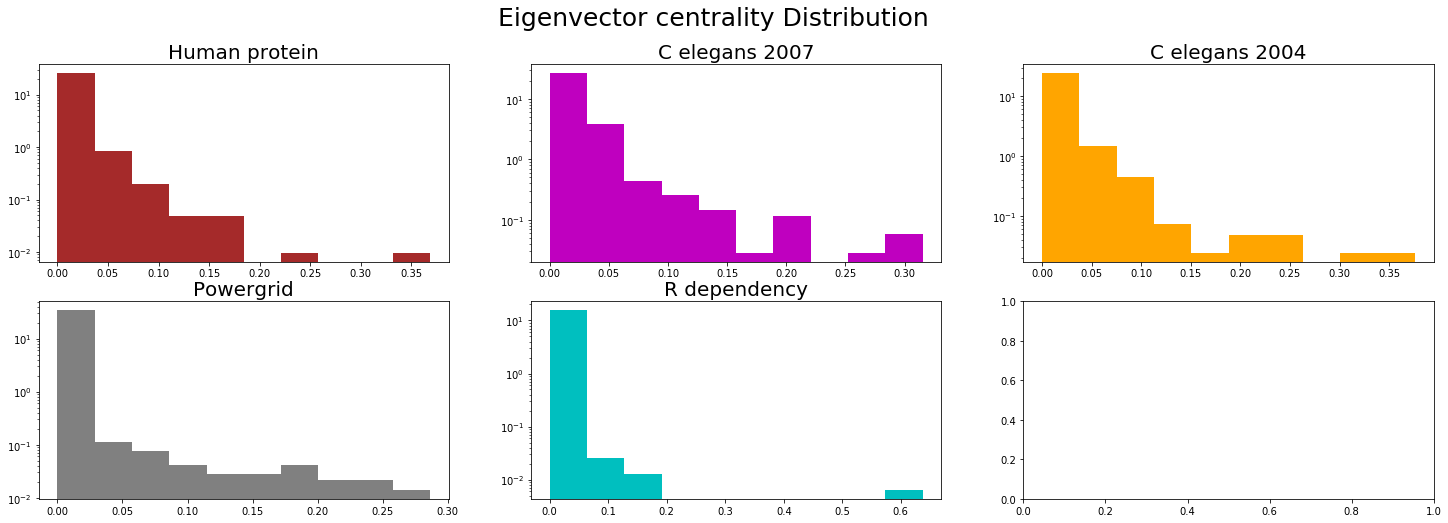

In [626]:
fig, axs = plt.subplots(2, 3,figsize=(25, 8))

fig.suptitle('Eigenvector centrality Distribution', fontsize=25)

axs[0,0].hist(EC_humanprotein,color="brown",density=True)
axs[0,0].set_yscale('log')
axs[0,0].set_title('Human protein', fontsize=20)


axs[0,1].hist(EC_celegans2007,color="m",density=True)
axs[0,1].set_yscale('log')
axs[0,1].set_title('C elegans 2007', fontsize=20)

axs[0,2].hist(EC_celegans2004, color="orange", density=True)
axs[0,2].set_yscale('log')
axs[0,2].set_title('C elegans 2004', fontsize=20)

axs[1,0].hist(EC_powergrid, color="gray", density=True)
axs[1,0].set_yscale('log')
axs[1,0].set_title('Powergrid', fontsize=20)

axs[1,1].hist(EC_rdependency, color="c", density=True)
axs[1,1].set_yscale('log')
axs[1,1].set_title('R dependency', fontsize=20)

In the case of Eigenvector centrality wee see the distributions are very similar in the case of biological networks.

**Page Rank**

Text(0.5, 1.0, 'R dependency')

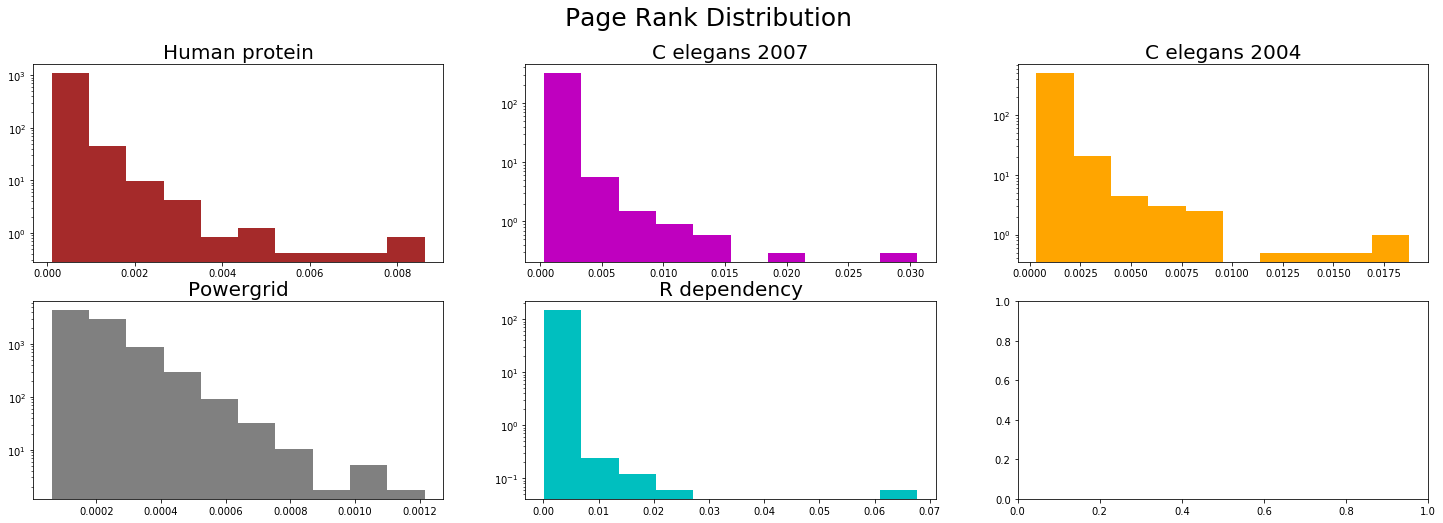

In [627]:
fig, axs = plt.subplots(2, 3,figsize=(25, 8))

fig.suptitle('Page Rank Distribution', fontsize=25)

axs[0,0].hist(PR_humanprotein,color="brown",density=True)
axs[0,0].set_yscale('log')
axs[0,0].set_title('Human protein', fontsize=20)


axs[0,1].hist(PR_celegans2007,color="m",density=True)
axs[0,1].set_yscale('log')
axs[0,1].set_title('C elegans 2007', fontsize=20)

axs[0,2].hist(PR_celegans2004, color="orange", density=True)
axs[0,2].set_yscale('log')
axs[0,2].set_title('C elegans 2004', fontsize=20)

axs[1,0].hist(PR_powergrid, color="gray", density=True)
axs[1,0].set_yscale('log')
axs[1,0].set_title('Powergrid', fontsize=20)

axs[1,1].hist(PR_rdependency, color="c", density=True)
axs[1,1].set_yscale('log')
axs[1,1].set_title('R dependency', fontsize=20)

The same think to PageRank Distribution the distributions of Human protein, c elegans 2007 and C elegans 2004 are very similar

**Closeness Centrality**

Text(0.5, 1.0, 'R dependency')

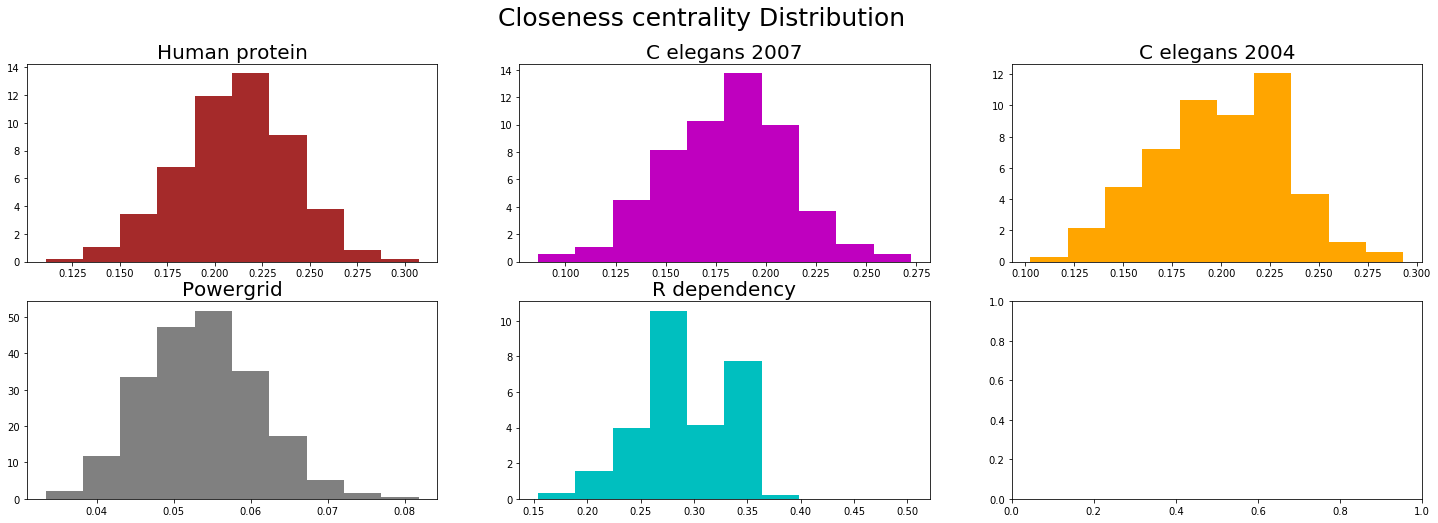

In [628]:
fig, axs = plt.subplots(2, 3,figsize=(25, 8))
fig.suptitle('Closeness centrality Distribution', fontsize=25)

axs[0,0].hist(CLC_humanprotein,color="brown",density=True)
##axs[0,0].set_yscale('log')
axs[0,0].set_title('Human protein', fontsize=20)


axs[0,1].hist(CLC_celegans2007,color="m",density=True)
##axs[0,1].set_yscale('log')
axs[0,1].set_title('C elegans 2007', fontsize=20)

axs[0,2].hist(CLC_celegans2004, color="orange", density=True)
##axs[0,2].set_yscale('log')
axs[0,2].set_title('C elegans 2004', fontsize=20)

axs[1,0].hist(CLC_powergrid, color="gray", density=True)
##axs[1,0].set_yscale('log')
axs[1,0].set_title('Powergrid', fontsize=20)

axs[1,1].hist(CLC_rdependency, color="c", density=True)
##axs[1,1].set_yscale('log')
axs[1,1].set_title('R dependency', fontsize=20)

And the distribution of closeness centrality for the biological networks are very similar too.

## Question 4

Consider the networks in the last exercise.

For each network, consider the measures:

(i) degree, (ii) k-core, (iii) closeness centrality, (iv) betweenness centrality, (v) eigenvector centrality, (vi) pagerank, (vii) random walk accessibility, (viii) communicability centrality.

And for each measure, calculate:

(i) average, (ii) standard deviation, (iii) second moment, (iv) Shannon entropy.

Thus, each network will be represented by a feature vector with 8*4 = 32 elements. Project the networks into a two dimensional space by using Principal Component Analysis (PCA). Discuss the similarities of the networks in terms of their features

_First lets create a function to return the average, standard deviation, second moment and Shannon entropy given a measure:_

In [437]:
import statistics as st
from scipy.stats import entropy

In [438]:
# Function for Shannon entropy for continuous values
def shannon_entropy(measure):
  unique,counts = np.unique(measure, return_counts=True)
  P_measure = counts/sum(counts)  
  H = entropy(P_measure,base=2)
  return H

In [439]:
def stat_things(measure):
    mean = st.mean(measure)
    sd = st.stdev(measure)
    second_moment = st.pvariance(measure, mu=0)
    se = shannon_entropy(measure)
    return mean, sd, second_moment, se

Now lets create a function to create a dataframe with the features of a network

In [855]:
def df_features(network):
    degree = dict(network.degree())
    degree = list(degree.values())
    
    KC = dict(nx.core_number(network))
    KC = list(KC.values())
    
    
    CCL = dict(nx.closeness_centrality(network))
    CCL = list(CCL.values())
    
    BC = dict(nx.betweenness_centrality(network))
    BC = list(BC.values())
    
    EC = dict(nx.eigenvector_centrality(network))
    EC = list(EC.values())
    
    PR = dict(nx.pagerank(network, alpha=0.85))
    PR = list(PR.values())
    
    RWA = acc(network).tolist()
    
    CC = communicability_centrality(network).tolist()
    
    measures = [degree,KC,CCL, BC, EC, PR, RWA, CC]
    
    mean = np.zeros(8)
    sd = np.zeros(8)
    second_moment = np.zeros(8)
    se = np.zeros(8)
    
    for i in range(8):
        aux1=measures[i]
        mean[i], sd[i], second_moment[i], se[i] = stat_things(aux1)
    
    
    df = pd.DataFrame({'Mean':mean,'sd':sd,'Second moment':second_moment, 'Shannon Entropy':se})
    vetor = np.concatenate((mean,sd,second_moment,se),axis=None)
    return(df,vetor)

## Human protein

In [856]:
df_humanprotein, vetor_humanprotein = df_features(humanprotein)

In [857]:
df_humanprotein.style

## C elegans 2007

In [860]:
df_celegans2007,vetor_celegans2007 = df_features(celegans2007)

In [488]:
df_celegans2007.style

## C elegans 2004

In [861]:
df_celegans2004, vetor_celegans2004 = df_features(celegans2004)

In [454]:
df_celegans2004.style

## Power Grid

In [862]:
df_powergrid, vetor_powergrid = df_features(powergrid)

In [459]:
df_powergrid.style

## R dependency

In [863]:
df_rdependency, vetor_rdependency = df_features(Rdependency)

In [464]:
df_rdependency.style

In [865]:
matrix_data = np.array([vetor_humanprotein, vetor_celegans2007,vetor_celegans2004,vetor_powergrid, vetor_rdependency])
df_total = pd.DataFrame(matrix_data, index = ["Human Protein","C elegans 2007", "C elegans 2004", "Power Grid","R dependency"])

In [866]:
df_total.style

Now let's standartize the dataset

In [872]:
from sklearn.preprocessing import StandardScaler
data_stand = StandardScaler().fit_transform(df_total)
df_stand = pd.DataFrame(StandardScaler().fit_transform(df_total),index = ["Human Protein","C elegans 2007", "C elegans 2004", "Power Grid","R dependency"])

In [873]:
df_stand.style

In [876]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_stand)
principalDf = pd.DataFrame(data = principalComponents,index = ["Human Protein","C elegans 2007", "C elegans 2004", "Power Grid","R dependency"],columns = ['principal component 1', 'principal component 2'])

In [877]:
principalDf.style

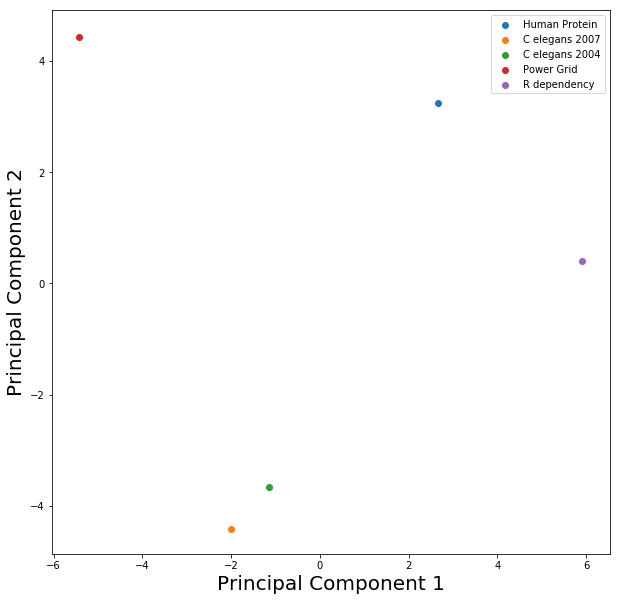

In [881]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))


plt.scatter(np.asarray(principalDf['principal component 1'][0]),np.asarray(principalDf['principal component 2'][0]), label='Human Protein')
plt.scatter(np.asarray(principalDf['principal component 1'][1]),np.asarray(principalDf['principal component 2'][1]), label='C elegans 2007')
plt.scatter(np.asarray(principalDf['principal component 1'][2]),np.asarray(principalDf['principal component 2'][2]), label='C elegans 2004')
plt.scatter(np.asarray(principalDf['principal component 1'][3]),np.asarray(principalDf['principal component 2'][3]), label='Power Grid')
plt.scatter(np.asarray(principalDf['principal component 1'][4]),np.asarray(principalDf['principal component 2'][4]), label='R dependency')


plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
                       
plt.legend()
plt.show()

Here we can see the networks of C elegans 2007 and C elegans 2004 are very close, because are the same type of network. The network of human is close to Celegans2004 and Celegans2007 in relation to the principal component 1, so they have some similarity. 
The two others networks dont have much similarity

## Question 5
For the following networks:

a) E-road network (http://konect.cc/networks/subelj_euroroad),

b) C. elegans neural network (http://www-personal.umich.edu/~mejn/netdata/celegansneural.zip)

c) US airport network (http://toreopsahl.com/datasets/#usairports)

d) Human protein network (http://konect.cc/networks/maayan-vidal)

Obtain the scatterplot of knn(k) X k and calculate the Pearson correlation coefficient between these two measures. Compare it with the assortativity coefficient. Comment the results.

## E-road Network

Lets calculate the assortativity coefficient for this network

In [1275]:
r=nx.degree_assortativity_coefficient(Euroroad)
print("Assortativity = ","%3.4f"%r)

Assortativity =  0.0900


The degree of each node:

In [1276]:
vk = dict(Euroroad.degree())
vk = list(vk.values())

In [1277]:
knn = []
for i in Euroroad.nodes():
    aux =  nx.average_neighbor_degree(Euroroad, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)
print("Average degree of the neighborhood of the network:", "%3.2f"%mean(knn))

Average degree of the neighborhood of the network: 3.03


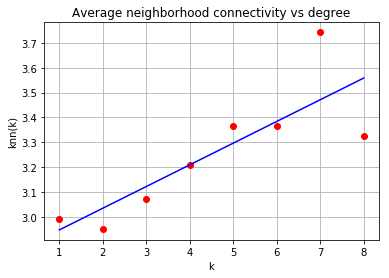

In [1278]:
knnk = list()
ks = list()
for k in arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
plt.plot(ks, knnk, 'ro')
#plt.loglog(ks,knnk,'bo',basex=10,basey=10)
plt.title("Average neighborhood connectivity vs degree")
plt.ylabel("knn(k)")
plt.xlabel("k")
plt.grid(True)


# determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '-b')
plt.show(True)

In [1279]:
from scipy.stats.stats import pearsonr

In [1280]:
print('The pearson correlation between knn and k is:', pearsonr(ks,knnk)[0])
r=nx.degree_assortativity_coefficient(Euroroad)
print("Assortativity = ","%3.4f"%r)

The pearson correlation between knn and k is: 0.8296047846722234
Assortativity =  0.0900


We have the asssortativity coeffiecient positive this case and the knn function is inscreasing. So nodes tend to be connected with other nodes with similar degree values.

## C elegans network

In [1281]:
r=nx.degree_assortativity_coefficient(neuralnet)
print("Assortativity = ","%3.4f"%r)

Assortativity =  -0.1632


In [1282]:
vk = dict(neuralnet.degree())
vk = list(vk.values())

In [1283]:
knn = []
for i in neuralnet.nodes():
    aux =  nx.average_neighbor_degree(neuralnet, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)
print("Average degree of the neighborhood of the network:", "%3.2f"%mean(knn))

Average degree of the neighborhood of the network: 32.00


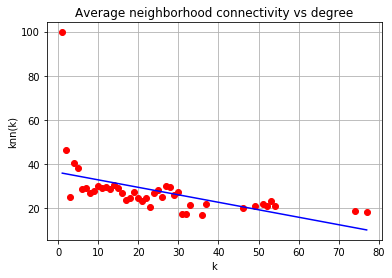

In [1284]:
knnk = list()
ks = list()
for k in arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
plt.plot(ks, knnk, 'ro')
#plt.loglog(ks,knnk,'bo',basex=10,basey=10)
plt.title("Average neighborhood connectivity vs degree")
plt.ylabel("knn(k)")
plt.xlabel("k")
plt.grid(True)


# determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '-b')
plt.show(True)

In [1287]:
print('The pearson correlation between knn and k is:', pearsonr(ks,knnk)[0])
r=nx.degree_assortativity_coefficient(neuralnet)
print("Assortativity = ","%3.4f"%r)

The pearson correlation between knn and k is: -0.49478113193240253
Assortativity =  -0.1632


We have the asssortativity coeffiecient negative in this case and the knn function is decreasing. So high degree nodes tend to attach to low degree nodes. This make sense because of this network is a biological one.

## Us Airport Network

In [1288]:
r=nx.degree_assortativity_coefficient(usair)
print("Assortativity = ","%3.4f"%r)

Assortativity =  -0.2679


In [1289]:
vk = dict(usair.degree())
vk = list(vk.values())

In [1290]:
knn = []
for i in usair.nodes():
    aux =  nx.average_neighbor_degree(usair, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)
print("Average degree of the neighborhood of the network:", "%3.2f"%mean(knn))

Average degree of the neighborhood of the network: 59.50


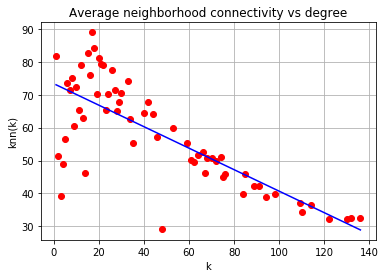

In [1291]:
knnk = list()
ks = list()
for k in arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
plt.plot(ks, knnk, 'ro')
#plt.loglog(ks,knnk,'bo',basex=10,basey=10)
plt.title("Average neighborhood connectivity vs degree")
plt.ylabel("knn(k)")
plt.xlabel("k")
plt.grid(True)


# determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '-b')
plt.show(True)

In [1292]:
print('The pearson correlation between knn and k is:', pearsonr(ks,knnk)[0])
r=nx.degree_assortativity_coefficient(usair)
print("Assortativity = ","%3.4f"%r)

The pearson correlation between knn and k is: -0.7756491513624388
Assortativity =  -0.2679


We have the asssortativity coeffiecient negative in this case and the knn function is decreasing. So high degree nodes tend to attach to low degree nodes.


## Human Protein Network

In [1293]:
r=nx.degree_assortativity_coefficient(humanprotein)
print("Assortativity = ","%3.4f"%r)

Assortativity =  -0.1366


In [1294]:
vk = dict(humanprotein.degree())
vk = list(vk.values())

In [1295]:
knn = []
for i in humanprotein.nodes():
    aux =  nx.average_neighbor_degree(humanprotein, nodes = [i])
    knn.append(float(aux[i]))
knn = np.array(knn)
print("Average degree of the neighborhood of the network:", "%3.2f"%mean(knn))

Average degree of the neighborhood of the network: 19.61


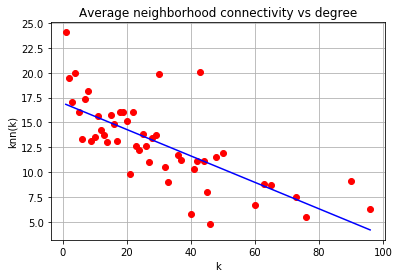

In [1296]:
knnk = list()
ks = list()
for k in arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(knn[aux]) > 0):
        av_knn = mean(knn[aux]) #average clustering among all the nodes with degree k
        knnk.append(av_knn)
        ks.append(k)
plt.plot(ks, knnk, 'ro')
#plt.loglog(ks,knnk,'bo',basex=10,basey=10)
plt.title("Average neighborhood connectivity vs degree")
plt.ylabel("knn(k)")
plt.xlabel("k")
plt.grid(True)


# determine best fit line
par = np.polyfit(ks, knnk, 1, full=True)
slope=par[0][0]
intercept=par[0][1]
xl = [min(ks), max(ks)]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, '-b')
plt.show(True)

In [1297]:
print('The pearson correlation between knn and k is:', pearsonr(ks,knnk)[0])
r=nx.degree_assortativity_coefficient(humanprotein)
print("Assortativity = ","%3.4f"%r)

The pearson correlation between knn and k is: -0.7264791351157314
Assortativity =  -0.1366


We have the asssortativity coeffiecient negative in this case and the knn function is decreasing. So high degree nodes tend to attach to low degree nodes. This make sense because of this network is a biological one.

## Question 6 

Construct the Givan-Newman benchmark ($N=128$, $k_{in}+k_{out} = 16$ and $4$ communities).

You can use: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.community_generators.LFR_benchmark_graph.html


Compare the following methods:

- Fastgreedy: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities 

- Label propagation: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.label_propagation.label_propagation_communities.html#networkx.algorithms.community.label_propagation.label_propagation_communities 

- Givan Newman: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman

- Louvain: https://github.com/taynaud/python-louvain


Use the normalized mutual information as a measure of accuracy.

Constructing a random network with the Givan-Newman approach:

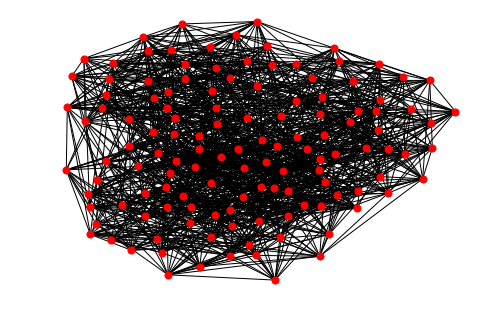

In [523]:
from networkx.algorithms.community import LFR_benchmark_graph
N = 128
tau1 = 3
tau2 = 1.5
mu = 0.23
k =16
minc = 32
maxc = 32
G = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, 
                        max_degree = k, min_community=minc, max_community = maxc, seed = 10)
pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, nodecolor='red', edge_color='black', 
        node_size=50, font_size=16,  width=1,pos = pos)

plt.show(True)

Let's see and save the real communities of the nodes

In [524]:
real_communities = {frozenset(G.nodes[v]['community']) for v in G}

In [525]:
print(real_communities)

{frozenset({5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126}), frozenset({2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127}), frozenset({1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123}), frozenset({0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124})}


In [526]:
real_comunnities_list = [list(x) for x in real_communities]

In [527]:
print(real_comunnities_list)

[[5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 104, 105, 109, 114, 116, 125, 126], [2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127], [1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123], [0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 106, 117, 119, 120, 121, 122, 124]]


Converting for a array

In [528]:
real_comunnities_array = np.asarray(real_comunnities_list)

Now a function to putting labels to nodes according to the communities classes

In [529]:
def make_labels(G,comunnities_array):
    N = len(G.nodes())
    classes = np.zeros(N)
    for g in G.nodes():
        for i in range(len(comunnities_array)):
            if(g in comunnities_array[i]):
                classes[g] = i
    return(classes)

In [530]:
real = make_labels(G,real_comunnities_array)
print(real)

[3. 2. 1. 3. 1. 0. 2. 2. 0. 0. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 0.
 1. 2. 3. 3. 3. 1. 0. 2. 2. 1. 0. 3. 1. 2. 3. 2. 3. 1. 1. 3. 2. 2. 2. 0.
 2. 3. 3. 3. 2. 1. 0. 3. 3. 2. 0. 1. 2. 1. 2. 1. 2. 0. 2. 1. 0. 1. 3. 0.
 0. 2. 0. 0. 2. 0. 1. 3. 3. 0. 1. 3. 3. 2. 3. 3. 0. 0. 0. 0. 3. 0. 2. 3.
 1. 0. 0. 1. 1. 2. 3. 3. 0. 0. 3. 2. 1. 0. 2. 1. 1. 2. 0. 2. 0. 3. 2. 3.
 3. 3. 3. 2. 3. 0. 0. 1.]


## Finding the communities

## Fastgreedy

In [553]:
 from networkx.algorithms.community import greedy_modularity_communities

In [560]:
fast_greedy_com = list(greedy_modularity_communities(G))

In [561]:
print(fast_greedy_com)

[frozenset({0, 3, 26, 27, 28, 35, 38, 40, 43, 49, 50, 51, 55, 56, 70, 79, 80, 83, 84, 86, 87, 92, 95, 102, 103, 104, 106, 117, 119, 120, 121, 122, 124}), frozenset({1, 6, 7, 10, 21, 22, 25, 31, 32, 37, 39, 44, 45, 46, 48, 52, 57, 60, 62, 64, 66, 73, 76, 85, 94, 101, 107, 110, 113, 115, 118, 123}), frozenset({2, 4, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 29, 33, 36, 41, 42, 53, 59, 61, 63, 67, 69, 78, 82, 96, 99, 100, 108, 111, 112, 127}), frozenset({5, 8, 9, 11, 23, 30, 34, 47, 54, 58, 65, 68, 71, 72, 74, 75, 77, 81, 88, 89, 90, 91, 93, 97, 98, 105, 109, 114, 116, 125, 126})]


In [562]:
fastgreedy_comunnities_list = [list(x) for x in fast_greedy_com]

In [567]:
fastgreedy_class = make_labels(G,fastgreedy_comunnities_list)
print(fastgreedy_class)

[0. 1. 2. 0. 2. 3. 1. 1. 3. 3. 1. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 3.
 2. 1. 0. 0. 0. 2. 3. 1. 1. 2. 3. 0. 2. 1. 0. 1. 0. 2. 2. 0. 1. 1. 1. 3.
 1. 0. 0. 0. 1. 2. 3. 0. 0. 1. 3. 2. 1. 2. 1. 2. 1. 3. 1. 2. 3. 2. 0. 3.
 3. 1. 3. 3. 1. 3. 2. 0. 0. 3. 2. 0. 0. 1. 0. 0. 3. 3. 3. 3. 0. 3. 1. 0.
 2. 3. 3. 2. 2. 1. 0. 0. 0. 3. 0. 1. 2. 3. 1. 2. 2. 1. 3. 1. 3. 0. 1. 0.
 0. 0. 0. 1. 0. 3. 3. 2.]


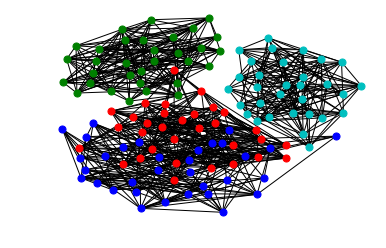

In [570]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for pm in fastgreedy_comunnities_list:
    nx.draw_networkx(G.subgraph(pm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.axis("off")
plt.show(True)

In [571]:
from sklearn.metrics.cluster import normalized_mutual_info_score


In [572]:

NMI_fastgreedy = normalized_mutual_info_score(real,fastgreedy_class,average_method='arithmetic')

print(NMI_fastgreedy)

0.9748319234674032


## Givan-Newman

The Givan-Newman algorithm is hierarchical method to find communities in a complex network.


"The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. The connected components of the remaining network are the communities. Instead of trying to construct a measure that tells us which edges are the most central to communities, the Girvan–Newman algorithm focuses on edges that are most likely "between" communities."[3]



In [573]:
communities = community.girvan_newman(G)
k = 4
for i in arange(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)

community: [0, 2, 3, 4, 5, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 45, 47, 49, 50, 51, 53, 54, 55, 56, 58, 59, 61, 63, 65, 67, 68, 69, 70, 71, 72, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127]
community: [1, 6, 7, 10, 22, 31, 32, 37, 44, 46, 52, 57, 60, 62, 64, 66, 73, 85, 94, 101, 107, 115, 123]
community: [48]
community: [76]


In [574]:
gir_new_comunnities = np.asarray(c)

In [575]:
gir_new_labels = make_labels(G, gir_new_comunnities)

In [576]:
print(gir_new_labels)

[0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 2. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0.]


Let's a plot of the communities given by girvan-newman

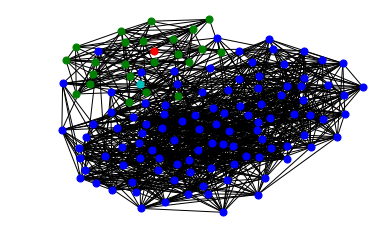

In [577]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for cm in c:
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.axis("off")
plt.show(True)

Now let's calculate the normalized mutual information for this method:


In [578]:
NMI_newman = normalized_mutual_info_score(real,gir_new_labels,average_method='arithmetic')

In [579]:
print(NMI_newman)

0.3726775549253692


## Lovain

In [580]:
from community import community_louvain

In [581]:
partition = community_louvain.best_partition(G)

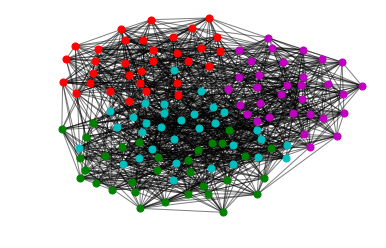

In [582]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis("off")
plt.show()

In [584]:
lovain_labels = dict(partition)
lovain_labels = list(lovain_labels.values())

In [585]:
print(lovain_labels)

[0, 1, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 2, 1, 0, 0, 0, 2, 3, 1, 1, 2, 3, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 1, 1, 3, 1, 0, 0, 0, 1, 2, 3, 0, 0, 1, 3, 2, 1, 2, 1, 2, 1, 3, 1, 2, 3, 2, 0, 3, 3, 1, 3, 3, 1, 3, 2, 0, 0, 3, 2, 0, 0, 1, 0, 0, 3, 3, 3, 3, 0, 3, 1, 0, 2, 3, 3, 2, 2, 1, 0, 0, 3, 3, 0, 1, 2, 3, 1, 2, 2, 1, 3, 1, 3, 0, 1, 0, 0, 0, 0, 1, 0, 3, 3, 2]


Lets calculate the NMI in this case

In [586]:
NMI_lovain = normalized_mutual_info_score(real,lovain_labels,average_method='arithmetic')

In [587]:
print(NMI_lovain)

1.0


## Label Propagation

In [588]:
p = list(community.label_propagation_communities(G))

In [589]:
print(p)

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127}]


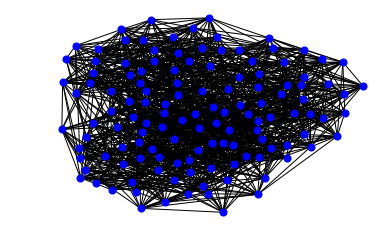

In [591]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for pm in p:
    nx.draw_networkx(G.subgraph(pm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.axis("off")
plt.show(True)

Now let's calculate the NMI for this case:

In [592]:
label_prop = make_labels(G,p)

In [593]:
print(label_prop)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [594]:
NMI_label_prob = normalized_mutual_info_score(real,label_prop,average_method='arithmetic')

In [595]:
print(NMI_label_prob)

6.406853007629836e-16


In [596]:
print('The Normalized mutual information for Fastgreedy is:', NMI_fastgreedy)
print('The Normalized mutual information for Girvan-Newman is:', NMI_newman)
print('The Normalized mutual information for Lovain is:', NMI_lovain)
print('The Normalized mutual information for Label Propagation is:', NMI_label_prob)

The Normalized mutual information for Fastgreedy is: 0.9748319234674032
The Normalized mutual information for Girvan-Newman is: 0.3726775549253692
The Normalized mutual information for Lovain is: 1.0
The Normalized mutual information for Label Propagation is: 6.406853007629836e-16


**Conclusion**

In this case we consider $\mu = 0.23$. Here the Lovain method give us the best NMI measure, followed by Fastgreedy and Girvan-Newman, and the worse is Label propagation who find only one communitie.

## Question 7

Consider the methods for community identification:

- Netcarto: https://amaral.northwestern.edu/resources/software/netcarto

- Informap: https://www.mapequation.org/code.html

- Fastgreedy: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities

- Label propagation: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.label_propagation.label_propagation_communities.html#networkx.algorithms.community.label_propagation.label_propagation_communities


- Givan Newman: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman

- Louvain: https://github.com/taynaud/python-louvain

Show the partition of the Zachary karate club for these networks.

First let's see a plot of Zachary karate club network

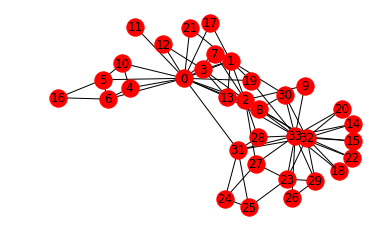

In [598]:
karate =nx.karate_club_graph()
pos=nx.fruchterman_reingold_layout(karate)
nx.draw_networkx(karate, pos=pos, node_color = 'r')
plt.axis("off")
plt.show(True)

## Fast Greedy

In [599]:
fast_karate = list(greedy_modularity_communities(karate))

In [600]:
fastgreedy_comunnities_list_kar = [list(x) for x in fast_karate]

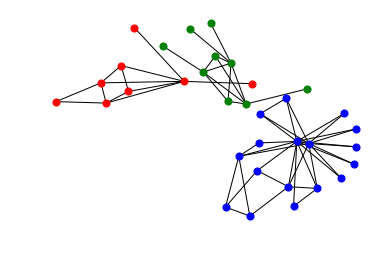

In [604]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for pm in fastgreedy_comunnities_list_kar:
    nx.draw_networkx(karate.subgraph(pm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.axis("off")
plt.show(True)

## Givan-Newman

In [1234]:
communities = community.centrality.girvan_newman(karate)
k = 2
for i in arange(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)

community: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
community: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


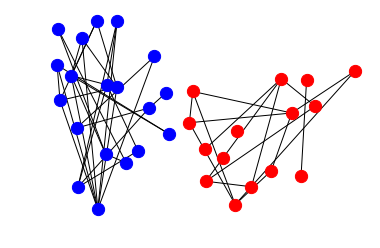

In [114]:
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for cm in c:
    nx.draw_networkx(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = False, node_size=150)
    aux = aux + 1
plt.axis("off")
plt.show(True)

## Lovain

In [1222]:
partition = community_louvain.best_partition(karate)

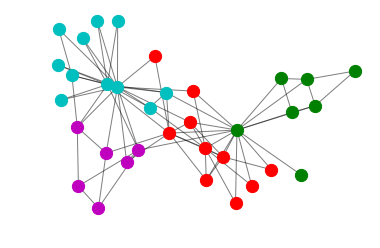

In [120]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(karate, pos, list_nodes, node_size = 150, node_color = colors[int(count)])
nx.draw_networkx_edges(karate, pos, alpha=0.5)
plt.axis("off")
plt.show()

## Label Propagation

In [1164]:
p = list(community.label_propagation_communities(karate))

In [1166]:
type(p)

list

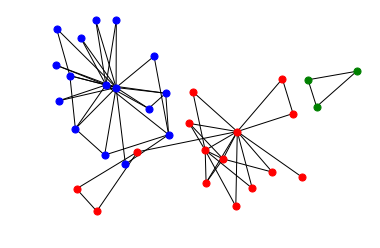

In [123]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for pm in p:
    nx.draw_networkx(karate.subgraph(pm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.axis("off")
plt.show(True)

## Question 8

Consider the Fortunato benchmark:https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.community_generators.LFR_benchmark_graph.html

Compare the following methods. Consider the Normalized Mutual Information (NMI) measure.

- Netcarto: https://amaral.northwestern.edu/resources/software/netcarto 

- Informap: https://www.mapequation.org/code.html

- Fastgreedy: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities

- Label propagation: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.label_propagation.label_propagation_communities.html#networkx.algorithms.community.label_propagation.label_propagation_communities

- Givan Newman: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman

- Louvain: https://github.com/taynaud/python-louvain

Let's make a function to generate networks with LFR_benchmark_graph and differents values of $\mu$

In [819]:
def generate_networks(Number,mu_n):
    N = 100
    tau1 = 3
    tau2 = 1.5
    k =16
    minc = 25
    maxc = 25
    networks = [None]*Number
    for i in range(Number):
        networks[i] = LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu_n, min_degree = k, max_degree = k, min_community=minc, max_community = maxc, seed = 10)
        
    return networks

Ok, now let's generante 10 networks for $\mu$ varying between 0.1 to 0.8, by step of 0.1.

In [939]:
mu_array = np.arange(0.1, 0.9, 0.05)

In [940]:
networks = [[None]]*len(mu_array)
for i in range(len(mu_array)):
    networks[i] = generate_networks(10,mu_array[i])   

In [941]:
len(networks)

16

Let's see a plot of 16 networks generated varying $\mu$

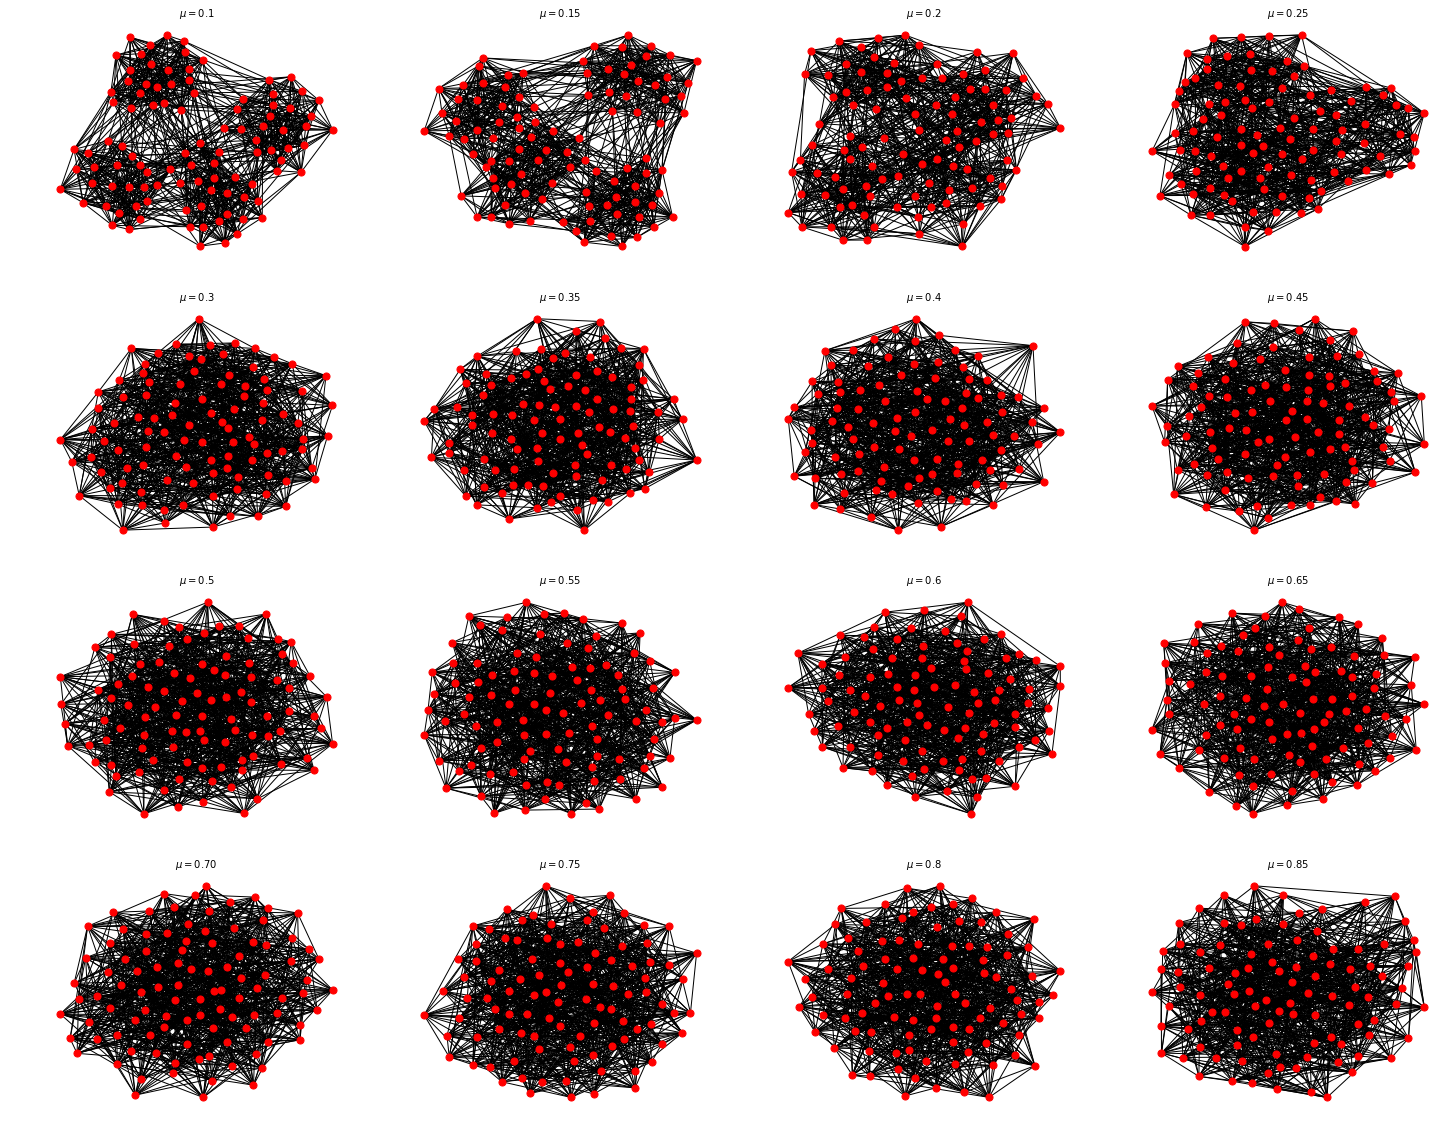

In [966]:
fig, axs = plt.subplots(4, 4,figsize=(25, 20))
ax = axs.flatten()

titles = [ '$\mu=0.1$', '$\mu=0.15$', '$\mu=0.2$', '$\mu=0.25$', '$\mu=0.3$', '$\mu=0.35$', '$\mu=0.4$', '$\mu=0.45$', '$\mu=0.5$', '$\mu=0.55$', 
         '$\mu=0.6$', '$\mu=0.65$', '$\mu=0.70$', '$\mu=0.75$', '$\mu=0.8$', '$\mu=0.85$', ]

for i in range(len(networks)):
    pos=nx.spring_layout(networks[i][0])
    nx.draw_networkx(networks[i][0], with_labels = False, nodecolor='red', edge_color='black', 
        node_size=50, font_size=16,  width=1,pos = pos, ax=ax[i])
    ax[i].set_axis_off()
    ax[i].set_title(titles[i], fontsize=10)

If we look at the plots, when $\mu$ increases the networks presents less modularity structure!

Now let's save the real communities generate by LFR_benchmark_graph algorithm.

In [822]:
real_communities = [[None]]*len(mu_array)
for j in range(len(networks)):
    for i in range(len(networks[j])):
        real_communities[j] = {frozenset(networks[j][i].nodes[v]['community']) for v in networks[j][i]}
        real_communities[j] = [list(x) for x in real_communities[j]]
        real_communities[j] = np.asarray(real_communities[j])
        real_communities[j] = make_labels(networks[j][i],real_communities[j])

## Fastgreedy

In [823]:
NMI_fastgreedy = np.zeros(len(mu_array))
NMI_aux = np.zeros(len(networks[0]))

for i in range(len(mu_array)):
    for j in range(10):
        comunnities_fast = list(greedy_modularity_communities(networks[i][j]))
        comunnities_fast = [list(x) for x in comunnities_fast]
        fast = make_labels(networks[i][j],comunnities_fast)
        NMI_aux[j] = normalized_mutual_info_score(real_communities[i],fast,average_method='arithmetic')           
    NMI_fastgreedy[i] = st.mean(NMI_aux)

In [780]:
print(NMI_fastgreedy)

[0.99159149 0.99159149 0.97183733 0.83575654 0.20568494 0.11183219
 0.11183219 0.01154244 0.01235703 0.00405366 0.00884238 0.00884238
 0.00448073 0.00234809 0.00103278 0.00109105]


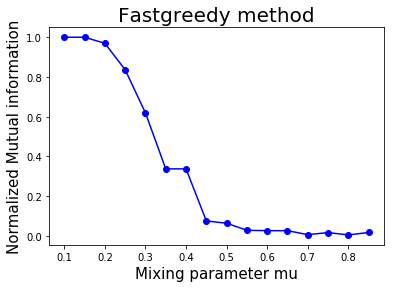

In [833]:
plt.title('Fastgreedy method',fontsize=20)
plt.ylabel('Normalized Mutual information',fontsize=15)
plt.xlabel('Mixing parameter mu',fontsize=15)
plt.plot(mu_array,NMI_fastgreedy, '-bo',)
plt.show()

## Lovain method

In [794]:
NMI_lovain = np.zeros(len(mu_array))
NMI_aux = np.zeros(len(networks[0]))

for i in range(len(mu_array)):
    for j in range(10):
        partition = community_louvain.best_partition(networks[i][j])
        lovain_labels = dict(partition)
        lovain_labels = list(lovain_labels.values())
        NMI_aux[j] = normalized_mutual_info_score(real_communities[i],lovain_labels,average_method='arithmetic')           
    NMI_lovain[i] = st.mean(NMI_aux)

In [795]:
print(NMI_lovain)

[1.         1.         1.         0.94548027 0.40959775 0.07169895
 0.05916163 0.01877925 0.00899308 0.00601172 0.0046502  0.00352113
 0.00292881 0.00334767 0.00214662 0.00272112]


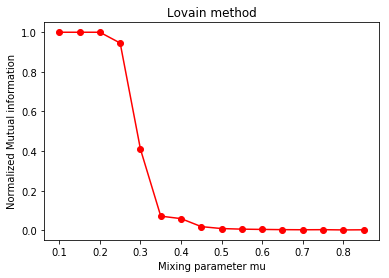

In [796]:
plt.title('Lovain method')
plt.ylabel('Normalized Mutual information')
plt.xlabel('Mixing parameter mu')
plt.plot(mu_array,NMI_lovain, '-ro',)
plt.show()

## Givan-Newman

In [828]:
NMI_newman = np.zeros(len(mu_array))
NMI_aux = np.zeros(len(networks[0]))

In [829]:
for i in range(len(mu_array)):
    for j in range(10):
        communities = community.girvan_newman(networks[i][j])
        k = 4
        for l in arange(0, k-1):
            next_level_communities = next(communities)
            c = sorted(map(sorted, next_level_communities))
            gir_new_comunnities = np.asarray(c)
        gir_new_labels = make_labels(networks[i][j], gir_new_comunnities)
        NMI_aux[j] = normalized_mutual_info_score(real_communities[i],gir_new_labels,average_method='arithmetic')           
    NMI_newman[i] = st.mean(NMI_aux)

In [830]:
print(NMI_newman)

[1.         1.         1.         0.9057857  0.05535529 0.05535529
 0.05535529 0.05535529 0.05425914 0.05535529 0.05425914 0.05425914
 0.05372273 0.05372273 0.05372273 0.05372273]


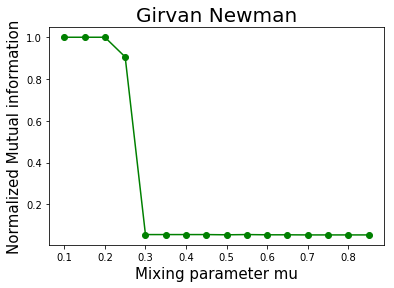

In [831]:
plt.title('Girvan Newman',fontsize=20)
plt.ylabel('Normalized Mutual information',fontsize=15)
plt.xlabel('Mixing parameter mu', fontsize=15)
plt.plot(mu_array,NMI_newman, '-go',)
plt.show()

## Label Propagation

In [824]:
NMI_label = np.zeros(len(mu_array))
NMI_aux = np.zeros(len(networks[0]))

In [825]:
for i in range(len(mu_array)):
    for j in range(10):
        comunnities = list(community.label_propagation_communities(networks[i][j]))
        labels = make_labels(networks[i][j],comunnities)
        NMI_aux[j] = normalized_mutual_info_score(real_communities[i],labels,average_method='arithmetic')           
    NMI_label[i] = st.mean(NMI_aux)

In [826]:
print(NMI_label)

[8.57142857e-01 8.57142857e-01 1.00000000e+00 4.25248237e-01
 6.40685301e-16 6.40685301e-16 6.40685301e-16 6.40685301e-16
 6.40685301e-16 6.40685301e-16 6.40685301e-16 6.40685301e-16
 6.40685301e-16 6.40685301e-16 6.40685301e-16 6.40685301e-16]


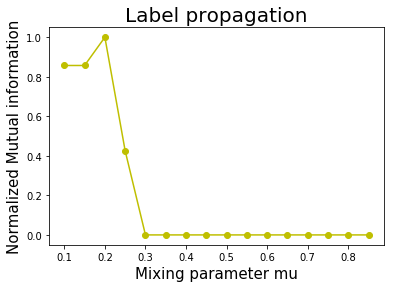

In [827]:
plt.title('Label propagation',fontsize=20)
plt.ylabel('Normalized Mutual information',fontsize=15)
plt.xlabel('Mixing parameter mu',fontsize=15)
plt.plot(mu_array,NMI_label, '-yo',)
plt.show()

**Lets see all the methods used in this exercicise in the same plot**

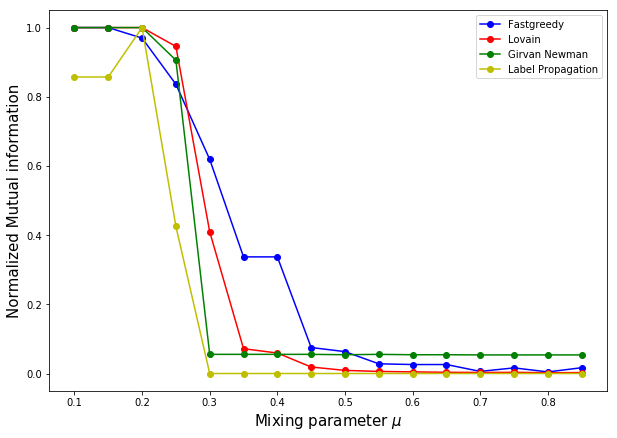

In [1274]:
plt.figure(figsize=(10,7))
plt.ylabel('Normalized Mutual information',fontsize=15)
plt.xlabel('Mixing parameter $\mu$',fontsize=15)
plt.plot(mu_array,NMI_fastgreedy, '-bo',label='Fastgreedy')
plt.plot(mu_array,NMI_lovain,'-ro',label='Lovain',)
plt.plot(mu_array,NMI_newman, '-go', label = 'Girvan Newman',)
plt.plot(mu_array,NMI_label, '-yo', label = 'Label Propagation',)
plt.legend()
plt.show()

If we look at the graph it's possible to say the method label propagation decrease very fast from some value of $\mu$. The fastgreedy looks like more stable to variation of $\mu$ and performs better for some high values.

## Question 9

Consider the following networks:

a) E-road network (http://konect.cc/networks/subelj_euroroad),

b) C. elegans neural network (http://www-personal.umich.edu/~mejn/netdata/celegansneural.zip)

c) US airport network (http://toreopsahl.com/datasets/#usairports)

d) Human protein network (http://konect.cc/networks/maayan-vidal)

Construct a table showing the following properties of these networks:N, Average degree, assortativity coefficient, average shortest path length, modularity.  

In the case of modularity, show the values for the following methods: 
- (i) Fastgreedy
- (ii) Label propagation
- (iii) Givan Newman
- (iv)Louvain.

(a) Compare the results in terms of the modularity. 


(b) Are there some relation between assortativity and other network measures?

In [906]:
names = ['Euroroad', 'Neuralnet', 'USAir', 'Humanprotein']

In [903]:
Nets = [Euroroad,neuralnet,usair,humanprotein]

## Function to construct a table for networks properties

In [920]:
def table_func(Nets,names):
    N = np.zeros(len(Nets))
    Av_degree = np.zeros(len(Nets))
    asso_coef = np.zeros(len(Nets))
    av_shor_path = np.zeros(len(Nets))
    modularity = np.zeros(len(Nets))
    for i in range(len(Nets)):
        N[i] = len(Nets[i].nodes())
        Av_degree[i] = st.mean(list(dict(Nets[i].degree()).values()))
        asso_coef[i] = nx.degree_assortativity_coefficient(Nets[i])
        av_shor_path[i] = nx.average_shortest_path_length(Nets[i])
    df = pd.DataFrame({'Names':names,'Number of nodes':N, 'Average degree':Av_degree, 'Assort. coefficient': asso_coef,'Average Shortest Path':av_shor_path})
    return df

In [921]:
df_nets = table_func(Nets,names)

In [922]:
df_nets.style

Now, calculating the modularity for some type of algorithms to communinity identification:

## Modularity for the networks using Fast Greedy, Label Propagation, Girvan-Newman and Lovain methods.

## Fast Greedy

A function to receive a list of the communities and returns a dict with every node and the classe of  that node.

In [1133]:
def partition_dict_func(list):
    partition_dict = dict()
    for i in range(len(list)):
        for j in range(len(list[i])):
            partition_dict.update({list[i][j]:i})
    return partition_dict

Now a function to receive a list of networks and returns the modularity of each network.

In [1157]:
import community as comu

In [1158]:
def modularity_fastgreedy(Networks):
    modularity_fast = np.zeros(len(Networks))
    fast_Nets = [[None]]*len(Networks)
    fastgreedy_comunnities_list = [[None]]*len(Networks)
    partition_dict = [dict()]*len(Networks)
    
    for i in range(len(Networks)):
        fast_Nets[i] = list(greedy_modularity_communities(Networks[i]))
        fastgreedy_comunnities_list[i] = [list(x) for x in fast_Nets[i]]
        partition_dict[i] = partition_dict_func(fastgreedy_comunnities_list[i])
        modularity_fast[i] = comu.modularity(partition_dict[i],Networks[i])
        
    return(modularity_fast)


In [1159]:
modularity_fast = modularity_fastgreedy(Nets)

In [1160]:
print(modularity_fast)

[0.86401756 0.36920111 0.35367906 0.61532838]


## Label Propagation

In [1217]:
def modularity_label(Networks):
    modularity_label = np.zeros(len(Networks))
    label_Nets_com = [[None]]*len(Networks)
    label_comunnities_list = [[None]]*len(Networks)
    partition_dict = [dict()]*len(Networks)

    for i in range(len(Networks)):
        label_Nets_com[i] = list(community.label_propagation_communities(Networks[i]))
        label_comunnities_list[i] = [list(x) for x in label_Nets_com[i]]
        
        partition_dict[i] = partition_dict_func(label_comunnities_list[i])
        modularity_label[i] = comu.modularity(partition_dict[i],Networks[i])
        
    return(modularity_label)

In [1220]:
modularity_label_net = modularity_label(Nets)

In [1221]:
print(modularity_label_net)

[0.54469694 0.         0.11372601 0.49470702]


## Girvan Newman

In [1254]:
def modularity_newman(Networks):
    modularity_newman = np.zeros(len(Networks))
    newman_Nets_com = [[None]]*len(Networks)
    newman_communities_list = [[None]]*len(Networks)
    partition_dict = [dict()]*len(Networks)

    for i in range(len(Networks)):
        
        communities_generator = community.girvan_newman(Networks[i])
        top_level_communities = next(communities_generator)
        next_level_communities = next(communities_generator)
        newman_communities_list[i] = sorted(map(sorted, next_level_communities))
        
        partition_dict[i] = partition_dict_func(newman_communities_list[i])
        modularity_newman[i] = comu.modularity(partition_dict[i],Networks[i])
        
    return(modularity_newman)

In [1255]:
modularity_newman_net = modularity_newman(Nets)

In [1256]:
print(modularity_newman_net)

[ 5.66503428e-01 -3.25104293e-07  7.10814265e-02  7.95300162e-03]


## Lovain

In [1231]:
def modularity_lovain(Networks):
    modularity_lovain = np.zeros(len(Networks))
    partition_dict = [dict()]*len(Networks)
    
    
    for i in range(len(Networks)):
        partition_dict[i] = community_louvain.best_partition(Networks[i])
        modularity_lovain[i] = comu.modularity(partition_dict[i],Networks[i])
        
    return(modularity_lovain)

In [1232]:
modularity_lovain_net = modularity_lovain(Nets)

In [1233]:
print(modularity_lovain_net)

[0.86710412 0.38853149 0.36239375 0.63833511]


In [1257]:
df_nets['Modularity - FastGreedy'] = modularity_fast
df_nets['Modularity - Label Prop'] = modularity_label_net
df_nets['Modularity - Girvan-Newman'] = modularity_newman_net
df_nets['Modularity - Lovain'] = modularity_lovain_net

In [1258]:
df_nets.style

## Comparing the results in terms of modularity

- Euroroad : All the methods for community identication for this network are greater then 0.3, so here we can say that network have modular structure.

- Neuralnet: For this network two methods(Label prop and Girvan-Newman) of community identification have approximatily 0 modularity, and for the lovain and label propagation some value near to 0.3. 

- USAir: For this network the same thing happens in comparison with neuralnet, values are near to 0 for the label prop and Girvan-Newman and for the lovain and fastgreedy near to 0.3

- HumanProtein: This network have high values of modularity for all the methods except the Girvan-Newman.

## Relation of assortativity and the other measures:

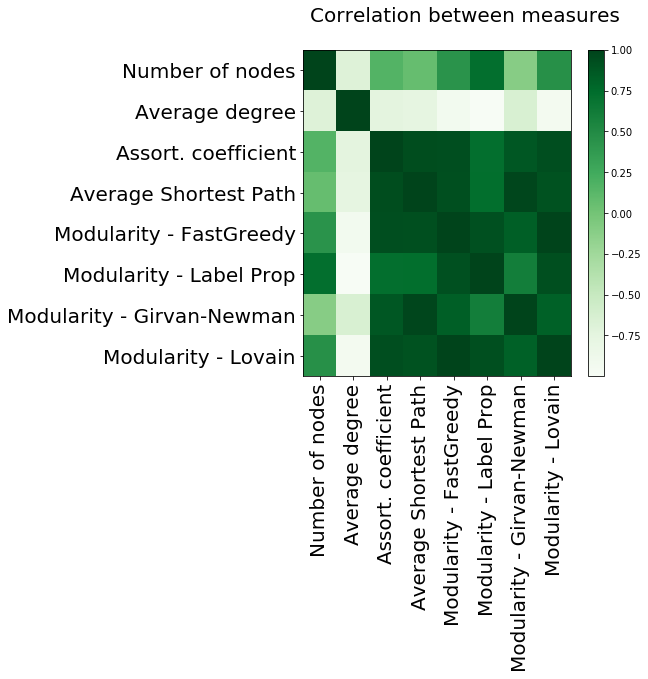

In [1263]:
nets_corr = df_nets.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(6,6))
plt.imshow(nets_corr, cmap='Greens', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(nets_corr)), nets_corr.columns, rotation='vertical', fontsize=20)
plt.yticks(range(len(nets_corr)), nets_corr.columns, fontsize=20);
plt.suptitle('Correlation between measures', fontsize=20)
plt.grid(False)
plt.show()

In [1267]:
df_nets_corr_paint = nets_corr.style.apply(highlight_greater)

In [1268]:
df_nets_corr_paint

Let's paint the highest negative correlations with the color red

In [1271]:
def highlight_greater_red(s):
    var = s <= -0.7
    return ['background-color: red' if v else '' for v in var]

In [1272]:
df_nets_corr_paint.apply(highlight_greater_red)

Here we can see:
- Assortatitive coefficient is negativily high correlated to average degree 
- Assortatitive coefficient is positivily high correlated to Average shortest path and all the modularities.

## Question 10

Elaborate a question and solve it!

## Question 10.1

- For the facebook network visualize the network using the degree and the betweenness centrality.

- Use a algorithm for community identification and draw the network

## Question 10.2

- Perform a data clustering using complex networks on the iris dataset 
- Use K-nn for construct a network based on iris dataset and perform the algorithms for community identification

**Solution 10.1**

In [521]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

C:\Users\Gulherme\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


(-0.8736681920796615,
 1.0973519069462996,
 -1.017256370949329,
 0.6237956203694949)

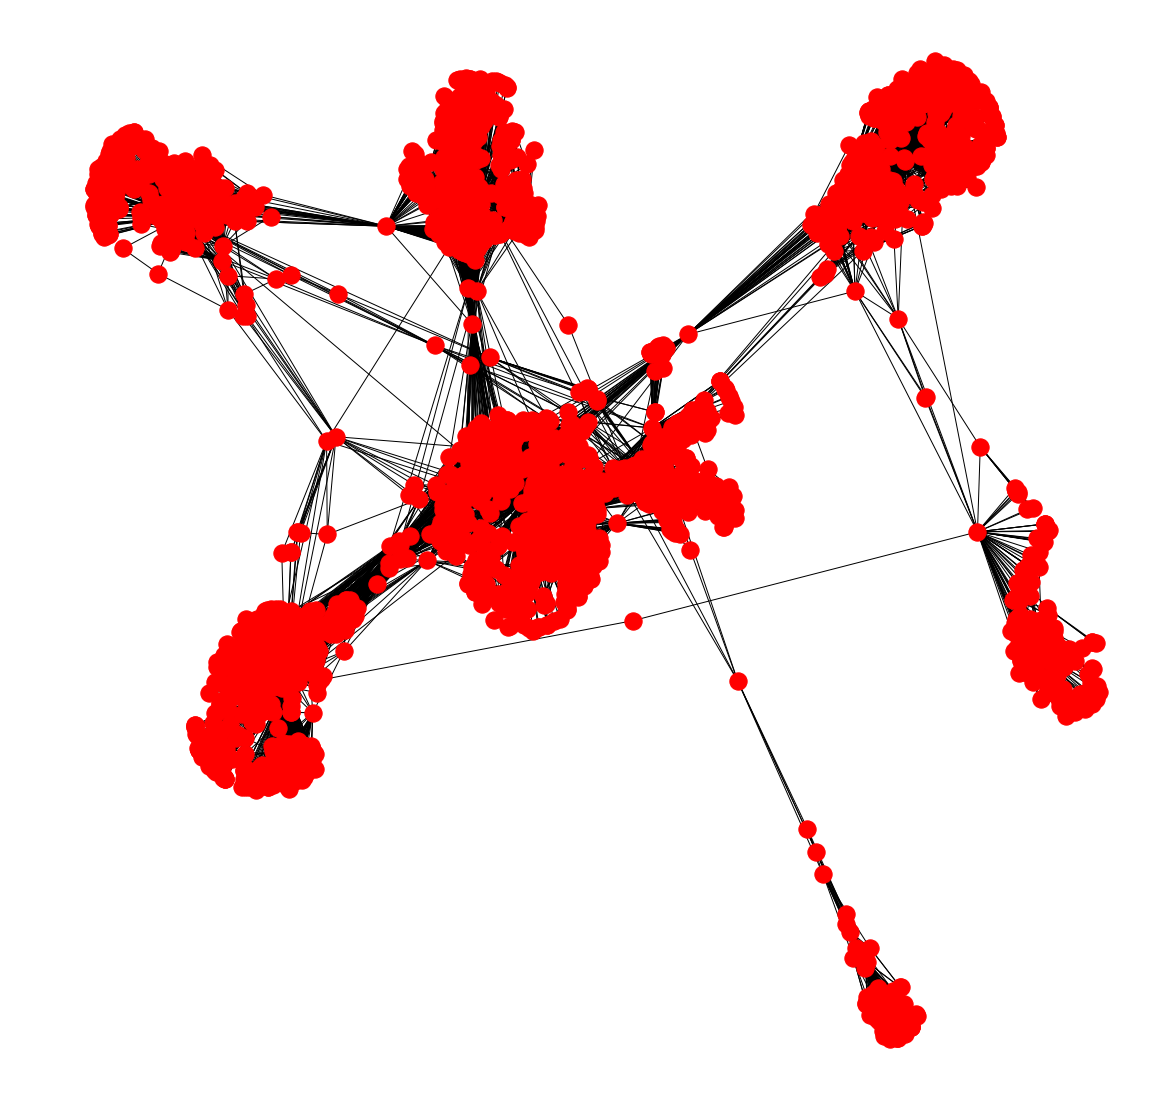

In [522]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb,with_labels=False)
plt.axis('off')

Drawing using the degree and betweeeness

C:\Users\Gulherme\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


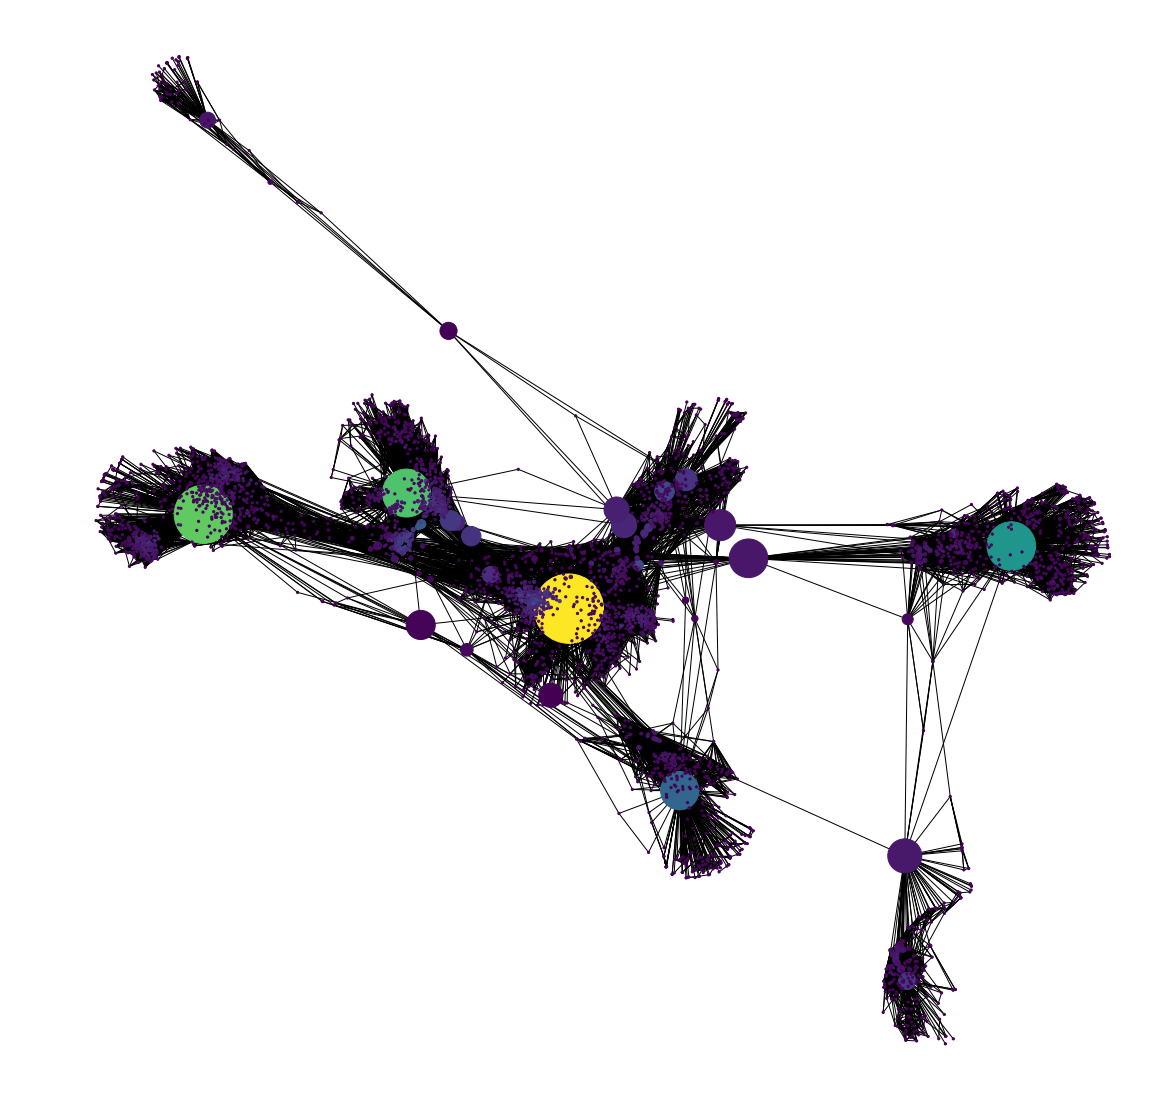

In [1237]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

And now finding the communities

In [31]:
partition_fb = community_louvain.best_partition(G_fb)

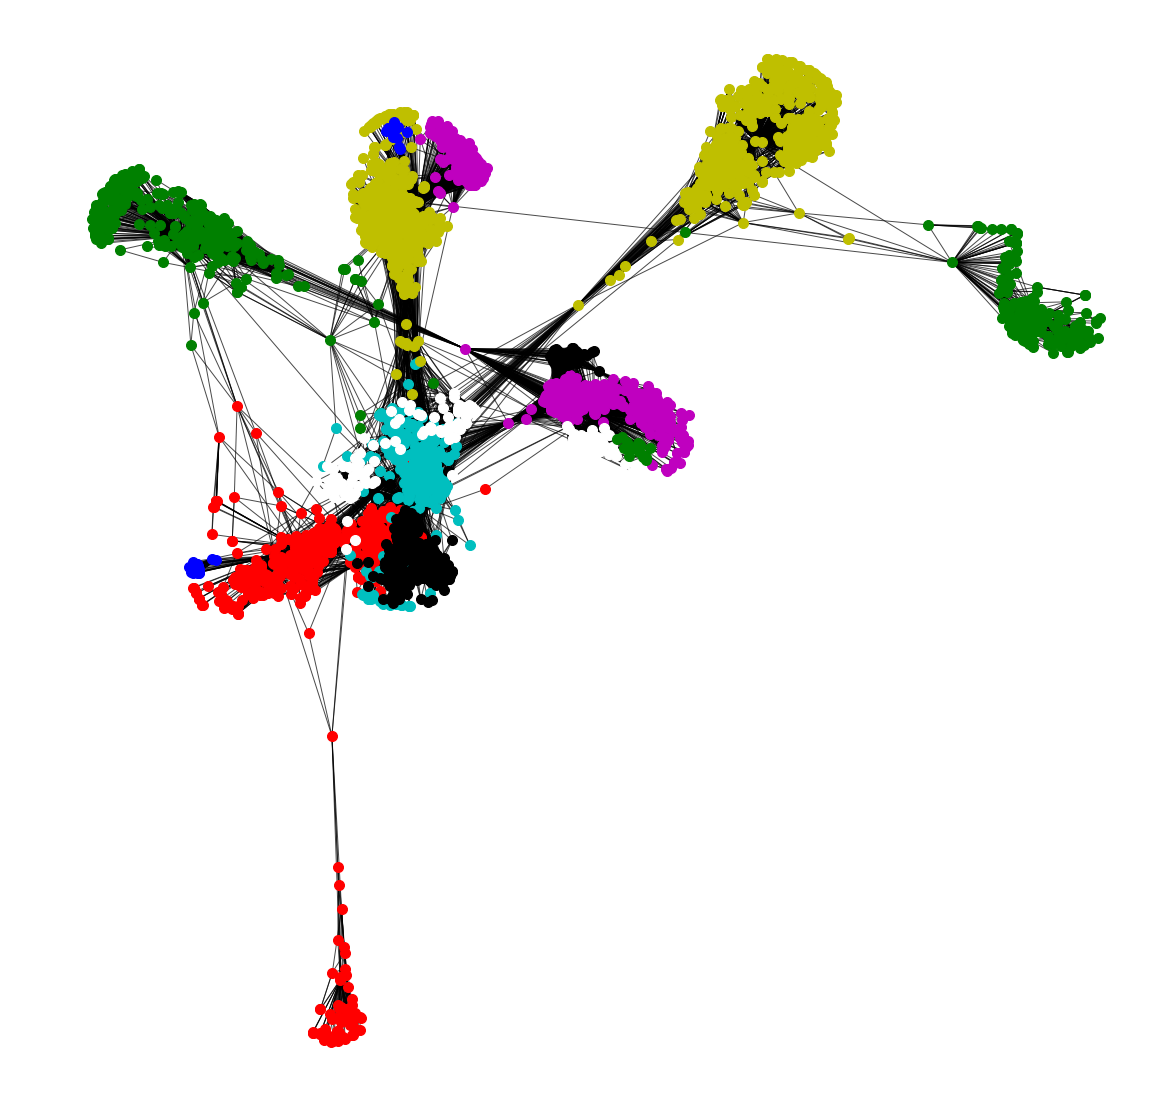

In [35]:
pos = nx.spring_layout(G_fb)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'y', 'k', 'w','b','r','g','m','b','g']
size = float(len(set(partition_fb.values())))
count = 0.
plt.figure(figsize=(20,20))
for com in set(partition_fb.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition_fb.keys() if partition_fb[nodes] == com]
    nx.draw_networkx_nodes(G_fb, pos, list_nodes, node_size = 100, node_color = colors[int(count)])
nx.draw_networkx_edges(G_fb, pos, alpha=0.7)
plt.axis("off")
plt.show()

This kind of visualition can be usefull for social network data analysis! If we can see the attributes of each node, i.e, what are the characteristics of each people, we can divide the communities founded by similarity of the nodes attributes. Because, peoples have connections with peoples who frequents the same places, or pertence to the same sport club, etc.

**Solution 10.2**

In [882]:
from sklearn import datasets
from scipy.spatial import distance

Loading the dataset

In [883]:
iris = datasets.load_iris()

In [884]:
X = iris.data[:, :4] 
y = iris.target

For compute the similarity between the observations we will use the inverse minkowski measure

$$ M_{p}^{-1}(\mathbf{x},\mathbf{y})= \frac{1}{M_{p}(\mathbf{x},\mathbf{y})} $$

here:

$$ M_{p}(\mathbf{x},\mathbf{y}) = \left( \sum_{i=1}^{n}|x_{i} - y_{i}|^{p}\right)^{1/p}$$

In [886]:
M_p_inv = np.zeros((150,150))

In [887]:
def dist_func(X):
    M_p_inv = np.zeros((len(X),len(X)))
    for i in range(len(M_p_inv)):
        for j in range(len(M_p_inv)):
            if(distance.minkowski(X[i],X[j]) != 0):
                M_p_inv[i][j] = 1/distance.minkowski(X[i],X[j],2)
    return M_p_inv

In [888]:
M_p_inv = dist_func(X)

Dado isso, montarei um grafo sem peso, levando em consideração um corte para estabelecer a conexão entre dois nós.

In [889]:
Grafo = nx.Graph()


Criando 150 nós, correspondentes a cada observação que pertence ao dataset iris

Função para criar um grafo usando a matriz de distâncias:

In [890]:
def cria_grafo(matrix):
    ## Creating nodes
    for i in range(len(matrix)):
        Grafo.add_node(i)
        
    ## Creating the edges
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if(matrix[i][j] > st.mean(matrix[i])):##Dá pra usar st.median(M_p_inv[i]):
               Grafo.add_edge(i,j)
    return Grafo

In [891]:
Grafo = cria_grafo(M_p_inv)

Let's see a plot of the network

C:\Users\Gulherme\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


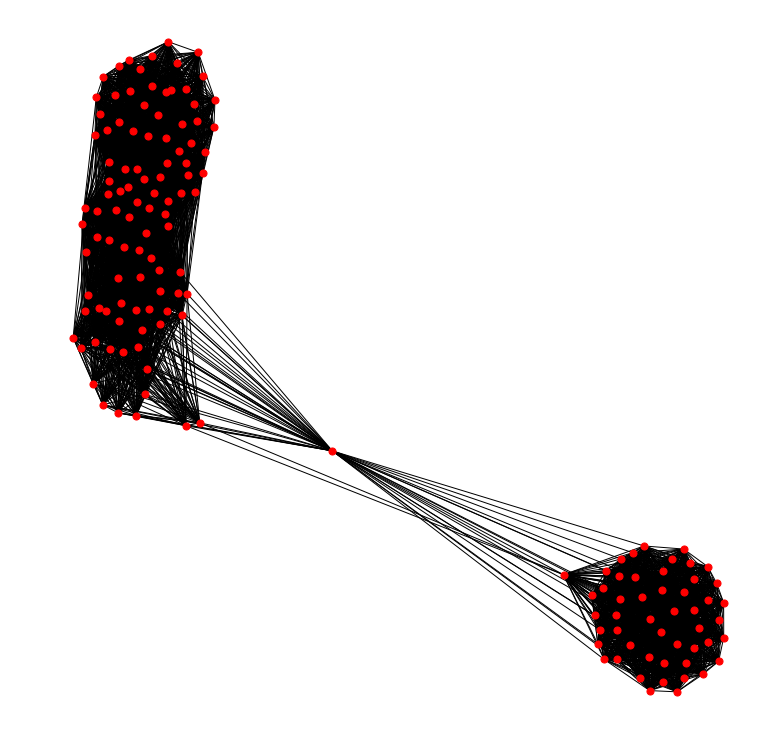

In [892]:
pos = nx.spring_layout(Grafo) 
plt.figure(figsize=(10,10))
nx.draw(Grafo,with_labels = False, pos = pos,node_size=50,node_color = 'red', edge_color='black')
plt.show(True)

**Finding the communities using Fastgreedy**

In [893]:
from networkx.algorithms.community import greedy_modularity_communities

In [894]:
fast_Grafo = list(greedy_modularity_communities(Grafo))

fastgreedy_comunnities_list_Grafo = [list(x) for x in fast_Grafo]

Now a plot based on the communities

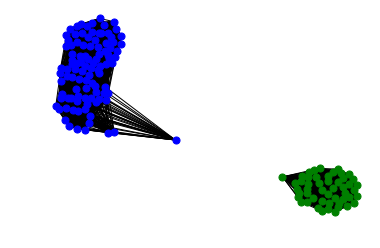

In [895]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for pm in fastgreedy_comunnities_list_Grafo:
    nx.draw_networkx(Grafo.subgraph(pm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.axis("off")
plt.show(True)


Calculating the NMI:

In [896]:
def make_labels(G,comunnities_array):
    N = len(G.nodes())
    classes = np.zeros(N)
    for g in G.nodes():
        for i in range(len(comunnities_array)):
            if(g in comunnities_array[i]):
                classes[g] = i
    return(classes)

In [897]:
labels_fast = make_labels(Grafo,fastgreedy_comunnities_list_Grafo)

In [898]:
from sklearn.metrics.cluster import normalized_mutual_info_score

In [900]:
NMI_Fast_iris =  normalized_mutual_info_score(y,labels_fast,average_method='arithmetic')

print("The normalized Mutual information is:",NMI_Fast_iris)

The normalized Mutual information is: 0.7336804366512104


In this case the algorithm Fastgreedy fing two communities, but we know the iris dataset have three type of flowers.



##  Using the knn to make the network

**Criterion**:Two nodes are connected if $v_i$ is one of k-nearest-neighbohrs of $v_j$. 
Note, we have to choose k to do this.


In [946]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [947]:
nbrs = NearestNeighbors(n_neighbors=40, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)


Função para criar a rede baseada nos vizinhos mais próximos

In [948]:
def criar_grafo2(indices):
    Grafo = nx.Graph()
    aux = np.zeros(len(indices))
    ## Criando os nós
    for i in range(len(indices[0])):
        Grafo.add_node(i)
    
    ## Criando arestas baseado nos vizinhos mais próximos de cada nó
    aux2 = len(indices[0])-1
    for j in range(len(indices)):
        aux = indices[j].tolist()
        for k in range(aux2):
            Grafo.add_edge(j,aux[k+1])
    return Grafo

In [949]:
Grafo2 = criar_grafo2(indices)

C:\Users\Gulherme\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


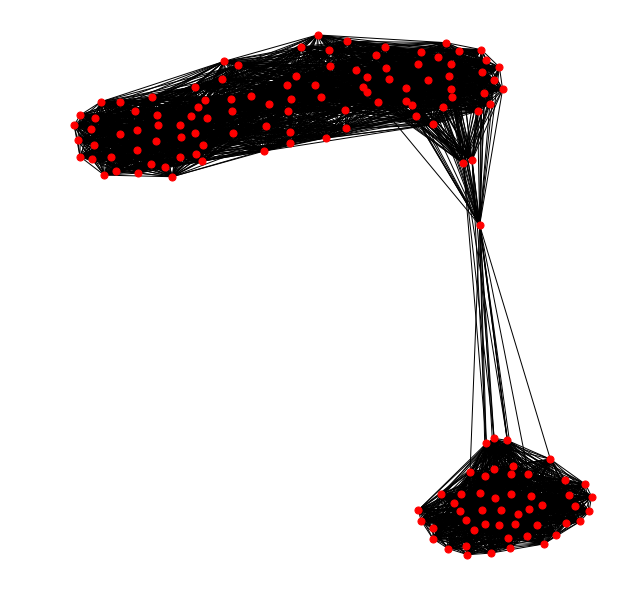

In [950]:
pos = nx.spring_layout(Grafo2) 
plt.figure(figsize=(8,8))
nx.draw(Grafo2,with_labels = False, pos = pos,node_size=50,node_color = 'red', edge_color='black')
plt.show(True)

## Finding the communities

## Fastgreedy

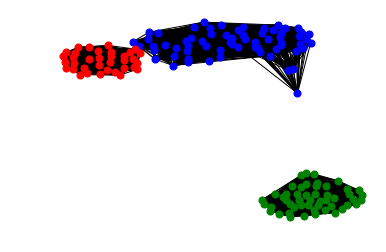

In [951]:
fast_Grafo2 = list(greedy_modularity_communities(Grafo2))

fastgreedy_comunnities_list_Grafo2 = [list(x) for x in fast_Grafo2]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for pm in fastgreedy_comunnities_list_Grafo2:
    nx.draw_networkx(Grafo.subgraph(pm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.axis("off")
plt.show(True)

In [952]:

labels_fast2 = make_labels(Grafo2,fastgreedy_comunnities_list_Grafo2)

NMI_Fast_iris2 =  normalized_mutual_info_score(y,labels_fast2,average_method='arithmetic')

print(NMI_Fast_iris2)


0.7979885217013319


We see here NMI perform better using the KNN and the algorithm fastgreedy to found the communities

## Using  Lovain to find the communities

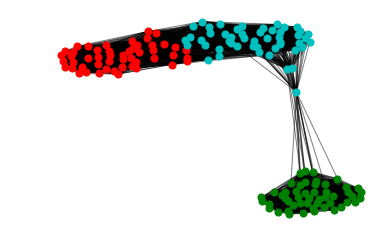

In [953]:
partition2 = community_louvain.best_partition(Grafo2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition2.values())))
count = 0.
for com in set(partition2.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition2.keys() if partition2[nodes] == com]
    nx.draw_networkx_nodes(Grafo2, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(Grafo2, pos, alpha=0.5)
plt.axis("off")
plt.show()

Vejamos a acurácia do lovain usando NMI

In [954]:
lovain_labels2 = dict(partition2)
lovain_labels2 = list(lovain_labels2.values())

NMI_lovain2 = normalized_mutual_info_score(y,lovain_labels2,average_method='arithmetic')
print(NMI_lovain2)


0.5813240845898754



##  Girvan Newman

In [955]:
communities2 = community.girvan_newman(Grafo2)
k = 3
for i in arange(0, k-1):
    next_level_communities2 = next(communities2)
c = sorted(map(sorted, next_level_communities2))
for cl in c:
    print('community:', cl)

community: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
community: [50, 52, 56, 70, 72, 76, 77, 83, 86, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
community: [51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 73, 74, 75, 78, 79, 80, 81, 82, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 106]


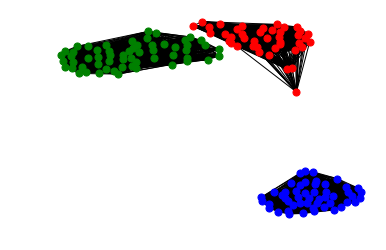

In [956]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for cm in c:
    nx.draw_networkx(Grafo2.subgraph(cm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.axis("off")
plt.show(True)

In [957]:
gir_new_comunnities2 = np.asarray(c)

gir_new_labels2 = make_labels(Grafo2, gir_new_comunnities2)

NMI_newman2 = normalized_mutual_info_score(y,gir_new_labels2,average_method='arithmetic')
print(NMI_newman2)


0.8226344718871869


Here we note the accuracy are better than the other cases.

## Using  label propagation

In [958]:


label_prop = list(community.label_propagation_communities(Grafo2))



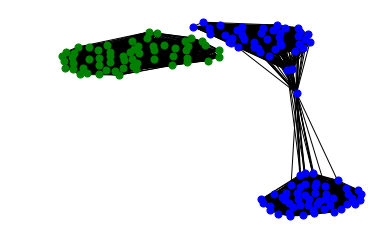

In [959]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for pm in label_prop:
    nx.draw_networkx(Grafo2.subgraph(pm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.axis("off")
plt.show(True)

In [960]:
label_prop_index = make_labels(Grafo2,label_prop)

NMI_label_prop2 = normalized_mutual_info_score(y,label_prop_index,average_method='arithmetic')
print(NMI_label_prop2)

0.5407298417425979


## Using k-clique percolation

In [962]:
kcliq = list(community.k_clique_communities(Grafo2, 18))
print(kcliq)


[frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49}), frozenset({50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149}), frozenset({138, 142, 149, 55, 56, 61, 63, 66, 70, 73, 78, 83, 84, 85, 91, 101, 106, 113, 119, 121, 126, 127})]


In [963]:

kclique_grafo2 = [list(x) for x in kcliq]

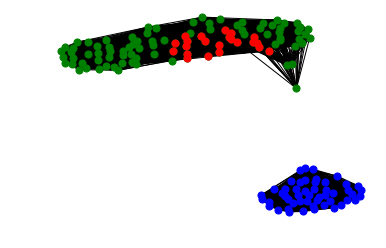

In [964]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
plt.figure()
aux = 0
for pm in kclique_grafo2:
    nx.draw_networkx(Grafo2.subgraph(pm), pos=pos, node_color = colors[aux], with_labels = False, node_size=50)
    aux = aux + 1
plt.axis("off")
plt.show(True)

In [965]:
labels_kcliq = make_labels(Grafo2,kclique_grafo2)

NMI_kcliq =  normalized_mutual_info_score(y,labels_kcliq,average_method='arithmetic')

print(NMI_kcliq)

0.6109015572754662


**Conclusion:** The best method here is to use the knn with the girvan-newman algorithm to find the communities. This method provides a accuracy of 0.8226344718871869
based on NMI measure. 

## References

[1] Lecture notes: Dynamical Processes on Complex Networks.

[2] Girvan M. and Newman M. E. J., Community structure in social and biological networks, Proc. Natl. Acad. Sci. USA 99, 7821–7826 (2002)

[3] Girvan–Newman algorithm, link: https://en.wikipedia.org/wiki/Girvan%E2%80%93Newman_algorithm

[4] Cordasco, G., & Gargano, L. (2010, December). Community detection via semi-synchronous label propagation algorithms. In Business Applications of Social Network Analysis (BASNA), 2010 IEEE International Workshop on (pp. 1-8). IEEE.

[5] Introduction to Label Propagation with NetworkX, link:https://medium.com/@graphml/introduction-to-label-propagation-with-networkx-part-1-abcbe954a2e8

[6] OSMnx: Python for Street Networks, link: https://geoffboeing.com/2016/11/osmnx-python-street-networks/

[7] OSMnx features demo, https://github.com/gboeing/osmnx-examples/blob/master/notebooks/00-osmnx-features-demo.ipynb

[8] Social Network Analysis, https://www.kirenz.com/post/2019-08-13-network_analysis/

[9] Assortatitivty, https://en.wikipedia.org/wiki/Assortativity

[10] A complex netowrks approach for data clustering, Guilherme F. de Arruda, Luciano da Fountoura Costa, Francisco A. Rodrigues.

[11] Page Rank - https://www.sci.unich.it/~francesc/teaching/network/pagerank